<a href="https://colab.research.google.com/github/Jay-mishra04/Capstone-Project/blob/main/Copy_of_Main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Mritunjay Mishra


# **Project Summary -**

Write the summary here within 500-600 words.

#### Predicting Sales for Rossman Stores

The project focuses on analyzing historical sales data from the Rossman chain of stores with the goal of developing predictive models to predict sales accurately. The dataset provides a comprehensive set of features including store information, promotions, holidays, and weather conditions, which are crucial for understanding the factors influencing sales in retail stores.

The dataset includes several key features such as store ID, date, day of the week, promotions, holidays, number of customers, and sales. Additionally, it contains information about store types, assortment levels, competition distance, and participation in promotional activities. Understanding how these features interact and influence sales is essential for building effective predictive models.

#### Features:

- Id - an Id that represents a (Store, Date) duple within the set
- Store - a unique Id for each store
- Sales - the turnover for any given day (Dependent Variable)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

The project aims to develop accurate predictive models that can provide insights into the factors driving sales for Rossman stores. By leveraging the rich information available in the dataset and applying advanced analytical techniques, the project aims to help Rossman optimize its sales strategies, improve inventory management, and enhance overall business performance.

#### Approach
- Data Collection and Preprocessing - Importing important libraries and modules - Data Cleaning - Missing Data Handling - Merging the Datasets
- Exploratory Data Analysis - Hypotheses - Categorical Features - Continuous Features - EDA Conclusion and Validating Hypotheses
- Feature Selection and Outlier Detection - Feature Engineering - Outlier Detection and Treatment
- Modeling - Train Test Split - Baseline Model - Decision Tree - Random Forest Model - Random Forest Hyperparameter Tuning Random Forest Feature Importance
- Model Performance and Evaluation - Visualizing Model Performances - Random Forest vs Baseline Model - Random Forest Tuned vs Baseline and Random Forest Models
- Store wise Sales Predictions
- Conclusion and Recommendations

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

### Predicting Sales for Rossman Stores

The problem at hand is to develop predictive models that accurately forecast future sales for the Rossman chain of stores. The dataset provided contains historical sales data along with various features such as store information, promotions, holidays, and weather conditions. By leveraging historical sales data and incorporating relevant features, the models aim to provide valuable insights into sales trends, patterns, and drivers, enabling the company to optimize its sales strategies, improve inventory management, and enhance overall business performance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing basic libraries for data processing
import numpy as np
import pandas as pd
import math
from datetime import datetime

# Importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chisquare
from scipy.stats import shapiro, levene, ttest_ind

# Importing libraries for model implimentation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing regression metrics to check the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing module to see execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

# Importing SHAP for model explainability
!pip install SHAP
! pip install xgboost

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.3 s (started: 2024-03-01 02:25:47 +00:00)


# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4.37 s (started: 2024-03-01 02:26:00 +00:00)


In [ ]:
# Loading both the dataset (sales_df and store_df)
sales_df = pd.read_csv("/content/drive/MyDrive/projects/Rossmann Stores Data.csv", low_memory=False)
store_df = pd.read_csv("/content/drive/MyDrive/projects/store.csv")

time: 543 ms (started: 2024-03-01 02:26:04 +00:00)


### Dataset First View

In [ ]:
# Sales Dataset First Look
sales_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

time: 7.79 ms (started: 2024-03-01 02:26:05 +00:00)


In [ ]:
# Store Dataset first look
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

time: 23.6 ms (started: 2024-03-01 02:26:05 +00:00)


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
sales_row, sales_column = sales_df.shape
store_row, store_column = store_df.shape

print("*"*32+" Rows and Columns in  Sales Dataset "+"*"*33)
print("-"*101)
print("Total rows in Sales Dataset are:",sales_row)
print("Total columns in the Sales Dataset are:", sales_column)

print("\n")

print("*"*32+" Rows and Columns in  Store Dataset "+"*"*33)
print("-"*101)
print("Total rows in Store Dataset are:",store_row)
print("Total columns in the Store Dataset are:", store_column)

******************************** Rows and Columns in  Sales Dataset *********************************
-----------------------------------------------------------------------------------------------------
Total rows in Sales Dataset are: 1017209
Total columns in the Sales Dataset are: 9


******************************** Rows and Columns in  Store Dataset *********************************
-----------------------------------------------------------------------------------------------------
Total rows in Store Dataset are: 1115
Total columns in the Store Dataset are: 10
time: 2.21 ms (started: 2024-03-01 02:26:05 +00:00)


### Dataset Information

In [ ]:
# Dataset Info
print("*"*24+"The information about Sales Dataset is given below:-"+"*"*24)
print("-"*101)
sales_df.info()
print()
print("*"*24+"The information about Store Dataset is given below:-"+"*"*24)
print("-"*101)
store_df.info()

************************The information about Sales Dataset is given below:-************************
-----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

************************The information about Store Dataset is given below:-************************
-------------------------------------

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("The number of duplicate rows in sales dataset:",sales_df.duplicated().sum())
print("The number of duplicate rows in store dataset:", store_df.duplicated().sum())

The number of duplicate rows in sales dataset: 0
The number of duplicate rows in store dataset: 0
time: 140 ms (started: 2024-03-01 02:26:05 +00:00)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("*"*24+"The number of Null values in the sales dataset are:-"+"*"*24)
print("-"*101)
print(sales_df.isnull().sum())
print()
print("*"*24+"The number of Null values in the store dataset are:-"+"*"*24)
print("-"*101)
store_df.isnull().sum()

************************The number of Null values in the sales dataset are:-************************
-----------------------------------------------------------------------------------------------------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

************************The number of Null values in the store dataset are:-************************
-----------------------------------------------------------------------------------------------------


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

time: 194 ms (started: 2024-03-01 02:26:05 +00:00)


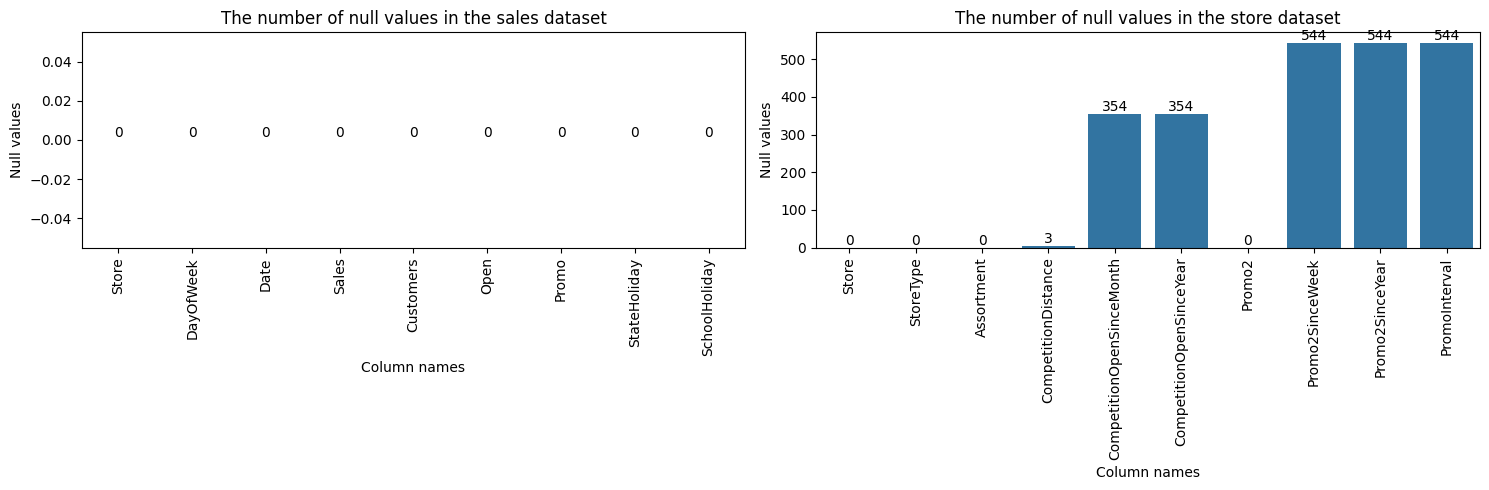

time: 844 ms (started: 2024-03-01 02:26:05 +00:00)


In [ ]:
# Calculate the number of null values in each DataFrame
sales_null = sales_df.isnull().sum()
store_null = store_df.isnull().sum()

# Plotting the null values in the sales dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sales_null_plot = sns.barplot(x=sales_null.index, y=sales_null.values)
for index, value in enumerate(sales_null.values):
    sales_null_plot.text(index, value, str(value), ha='center', va='bottom')
plt.title("The number of null values in the sales dataset")
plt.ylabel("Null values")
plt.xlabel("Column names")
plt.xticks(rotation="vertical")

# Plotting the null values in the store dataset
plt.subplot(1, 2, 2)
store_null_plot = sns.barplot(x=store_null.index, y=store_null.values)
for index, value in enumerate(store_null.values):
    store_null_plot.text(index, value, str(value), ha='center', va='bottom')
plt.title("The number of null values in the store dataset")
plt.ylabel("Null values")
plt.xlabel("Column names")
plt.xticks(rotation="vertical")

# Show the plots
plt.tight_layout()
plt.show()


### What did you know about your dataset?

### Sales Dataset Information:-


##### There are no null values in the entire dataset
##### There are 1017209  rows and 9 columns
##### There are no duplicate values in the entire dataset
#### Explanation of each of the features in the Rossman Sales dataset:

- Store: This feature represents a unique identifier for each store in the dataset. Each store is assigned a specific store ID, which allows the dataset to distinguish between different stores.

- DayOfWeek: This feature indicates the day of the week corresponding to the sales data. It is represented as an integer ranging from 1 to 7, where 1 represents Monday and 7 represents Sunday.

- Date: This feature represents the date of the sales data. It is represented in a date format and provides information on when the sales occurred.

- Sales: This feature represents the target variable that the predictive models aim to forecast. It indicates the total sales revenue generated by each store on a particular date.

- Customers: This feature represents the number of customers who visited each store on a particular date. It provides additional information about customer traffic and behavior.

- Open: This feature indicates whether each store was open or closed on a particular date. It is represented as a binary variable, where 1 indicates that the store was open, and 0 indicates that the store was closed.

- Promo: This feature indicates whether each store was running a promotional campaign on a particular date. It is represented as a binary variable, where 1 indicates that the store was running a promotion, and 0 indicates that the store was not running a promotion.

- StateHoliday: This feature indicates whether a particular date was a state holiday in the region where the store is located. It is represented as a categorical variable with different levels (e.g., "0" for no holiday, "a" for a public holiday, "b" for Easter holiday, "c" for Christmas).

- SchoolHoliday: This feature indicates whether a particular date was a school holiday in the region where the store is located. It is represented as a binary variable, where 1 indicates that it was a school holiday, and 0 indicates that it was not a school holiday.


### Store Dataset Information:-

##### There are 1115 rows and 10 column in the dataset.
##### There are no duplicate values
##### There are null values in 5 columns
#### Explanation of each of the features in the Rossman Sales dataset:
- Store - a unique Id for each store
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Columns in Sales Dataset:-")
print("-"*100)
print(list(sales_df.columns))
print("\n" + "*"*100 + "\n")
print("Columns in Store Dataset:-")
print("-"*100)
print(list(store_df.columns))


Columns in Sales Dataset:-
----------------------------------------------------------------------------------------------------
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

****************************************************************************************************

Columns in Store Dataset:-
----------------------------------------------------------------------------------------------------
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
time: 3.29 ms (started: 2024-03-01 02:26:06 +00:00)


In [ ]:
# Dataset Describe
print("*"*50+" Description about Sales Dataset "+"*"*50)
print("-"*140)
sales_df.describe(include="all")


************************************************** Description about Sales Dataset **************************************************
--------------------------------------------------------------------------------------------------------------------------------------------


Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            4            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       986159            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

time: 257 ms (started: 2024-03-01 02:26:06 +00:00)


In [ ]:
print("*"*50+" Description about Sales Dataset "+"*"*50)
print("-"*140)
store_df.describe(include="all")

************************************************** Description about Sales Dataset **************************************************
--------------------------------------------------------------------------------------------------------------------------------------------


Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

time: 37.7 ms (started: 2024-03-01 02:26:07 +00:00)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("*"*34+" Unique values in  Sales Dataset "+"*"*34)
print("-"*101)
for i in sales_df.columns:
    print(f"The number of unique values in {i} column is:", sales_df[i].nunique())
print("\n"+"\n")
print("*"*34+" Unique values in  Store Dataset "+"*"*34)
print("-"*101)
for i in store_df.columns:
    print(f"The number of unique values in {i} column is:", store_df[i].nunique())

********************************** Unique values in  Sales Dataset **********************************
-----------------------------------------------------------------------------------------------------
The number of unique values in Store column is: 1115
The number of unique values in DayOfWeek column is: 7
The number of unique values in Date column is: 942
The number of unique values in Sales column is: 21734
The number of unique values in Customers column is: 4086
The number of unique values in Open column is: 2
The number of unique values in Promo column is: 2
The number of unique values in StateHoliday column is: 4
The number of unique values in SchoolHoliday column is: 2



********************************** Unique values in  Store Dataset **********************************
-----------------------------------------------------------------------------------------------------
The number of unique values in Store column is: 1115
The number of unique values in StoreType column is: 4

## 3. ***Data Wrangling***

### Data Wrangling Code (For Sales Dataset)

In [ ]:
# Converting the Datatypes
sales_df["Date"]= pd.to_datetime(sales_df["Date"])

time: 81.1 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# assigning the names of holidays
def stateholiday(row):
    if row == "a":
        return "public holiday"
    elif row == "b":
        return "Easter holiday"
    elif row == "c":
        return "Christmas"
    else:
        return row

sales_df["StateHoliday"] = sales_df["StateHoliday"].apply(stateholiday)

time: 119 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# making a new column to know only about if there was a stateholiday on a particular date or not
sales_df["StateHolidayBinary"] = sales_df["StateHoliday"].apply(lambda x: 1 if x!="0" else 0)

time: 208 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# separating year, month and date
sales_df["year"] = sales_df["Date"].dt.year
sales_df["month"] = sales_df["Date"].dt.month
sales_df["date"] = sales_df["Date"].dt.day

time: 79.1 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# Viweing the changes
sales_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  StateHolidayBinary  year  month  date  
0              1                   0  2015      7    31  
1              1                   0  2015      7    31  
2              1                   0  2015      7    31  
3              1                   0  2015      7    31  
4              1                   0  2015      7    31

time: 9.74 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# checking the changes
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Store               1017209 non-null  int64         
 1   DayOfWeek           1017209 non-null  int64         
 2   Date                1017209 non-null  datetime64[ns]
 3   Sales               1017209 non-null  int64         
 4   Customers           1017209 non-null  int64         
 5   Open                1017209 non-null  int64         
 6   Promo               1017209 non-null  int64         
 7   StateHoliday        1017209 non-null  object        
 8   SchoolHoliday       1017209 non-null  int64         
 9   StateHolidayBinary  1017209 non-null  int64         
 10  year                1017209 non-null  int64         
 11  month               1017209 non-null  int64         
 12  date                1017209 non-null  int64         
dtypes: datetime6

### What all manipulations have you done and insights you found?

- Assign "0" for no holiday, "a" for a public holiday, "b" for Easter holiday, "c" for Christmas in the StateHoliday Column.
- Created separate columns for year, month and date from Date column.
- Created "StateHolidayBinary" column which will tell if there was state holiday on a particular date or not.


### Data Wrangling Code (For Store Dataset)

###### Null values treatment

In [ ]:
print("The percentage of null values in the each columns:-")
store_df.isnull().sum()/store_df.shape[0]*100

The percentage of null values in the each columns:-


Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

time: 9.64 ms (started: 2024-03-01 02:26:07 +00:00)


- CompetitionDistance has only null values of less than 1%, so we can remove those rows from the dataset.
- CompetitionOpenSinceMonth and CompetitionOpenSinceYear have almost 32% null values. As this constitutes a major chunk of the entire dataset, we can't remove them. Instead, we need to find an imputation technique to fill them.
- We can fill 0 in place of null values in columns like Promo2SinceWeek, Promo2SinceYear, and PromoInterval because either there will be a promo or there won't be.

In [ ]:
# dropping the rows which have null values present in CompetitionDistance column
store_df.dropna(subset="CompetitionDistance", inplace =True)

time: 3.22 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# Using mode imputation to fill null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store_df["CompetitionOpenSinceMonth"].fillna(store_df["CompetitionOpenSinceMonth"].mode()[0], inplace=True)
store_df["CompetitionOpenSinceYear"].fillna(store_df["CompetitionOpenSinceYear"].mode()[0], inplace=True)

time: 2.53 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0.
store_df["Promo2SinceWeek"].fillna(0, inplace=True)
store_df["Promo2SinceYear"].fillna(0, inplace=True)
store_df["PromoInterval"].fillna(0, inplace=True)

time: 2 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# rechecking if our features contains more null values
print("The percentage of null values in the each columns:-")
store_df.isnull().sum()/store_df.shape[0]*100

The percentage of null values in the each columns:-


Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

time: 6.51 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1112 non-null   int64  
 1   StoreType                  1112 non-null   object 
 2   Assortment                 1112 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  1112 non-null   float64
 5   CompetitionOpenSinceYear   1112 non-null   float64
 6   Promo2                     1112 non-null   int64  
 7   Promo2SinceWeek            1112 non-null   float64
 8   Promo2SinceYear            1112 non-null   float64
 9   PromoInterval              1112 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 95.6+ KB
time: 6.21 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# Converting the datatypes
store_df["CompetitionDistance"]= store_df["CompetitionDistance"].astype(int)
store_df["CompetitionOpenSinceMonth"]= store_df["CompetitionOpenSinceMonth"].astype(int)
store_df["CompetitionOpenSinceYear"]= store_df["CompetitionOpenSinceYear"].astype(int)
store_df["Promo2SinceWeek"]= store_df["Promo2SinceWeek"].astype(int)
store_df["Promo2SinceYear"]= store_df["Promo2SinceYear"].astype(int)

time: 5.39 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# viewing the changes
store_df.head(5)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                         12   
3      4         c          c                  620                          9   
4      5         a          a                29910                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

     PromoInterval  
0                0  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3                0  
4                0

time: 21.7 ms (started: 2024-03-01 02:26:07 +00:00)


#### Merging both the dataset (Sales dataset and Store dataset)

In [ ]:
# using inner join for our further analysis
df= pd.merge(sales_df, store_df, on="Store", how= "inner")
print(df.shape)

(1014567, 22)
time: 145 ms (started: 2024-03-01 02:26:07 +00:00)


In [ ]:
# Viewing the merged dataset
df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   
2      1          3 2015-07-29   4782        523     1      1            0   
3      1          2 2015-07-28   5011        560     1      1            0   
4      1          1 2015-07-27   6102        612     1      1            0   

   SchoolHoliday  StateHolidayBinary  ...  date  StoreType  Assortment  \
0              1                   0  ...    31          c           a   
1              1                   0  ...    30          c           a   
2              1                   0  ...    29          c           a   
3              1                   0  ...    28          c           a   
4              1                   0  ...    27          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270                         9                      2008   
1                1270                         9                      2008   
2                1270                         9                      2008   
3                1270                         9                      2008   
4                1270                         9                      2008   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0                0                0              0  
1       0                0                0              0  
2       0                0                0              0  
3       0                0                0              0  
4       0                0                0              0  

[5 rows x 22 columns]

time: 14.9 ms (started: 2024-03-01 02:26:08 +00:00)


In [ ]:
# viweing the info about merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014567 entries, 0 to 1014566
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1014567 non-null  int64         
 1   DayOfWeek                  1014567 non-null  int64         
 2   Date                       1014567 non-null  datetime64[ns]
 3   Sales                      1014567 non-null  int64         
 4   Customers                  1014567 non-null  int64         
 5   Open                       1014567 non-null  int64         
 6   Promo                      1014567 non-null  int64         
 7   StateHoliday               1014567 non-null  object        
 8   SchoolHoliday              1014567 non-null  int64         
 9   StateHolidayBinary         1014567 non-null  int64         
 10  year                       1014567 non-null  int64         
 11  month                      1014567 no

### What all manipulations have you done and insights you found?

In data wrangling we have divided it into three sections:


1.   **Null values treatment**:

> a. Removed rows which contained null values in the CompetitonDistance column.

> b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

> c. Replaced null values of CompetitionOpenSinceYear and with MODE.

> d. Replaced null values of Promo2SinceWeek and with 0.

> e. Replaced null values of Promo2SinceYear and with 0.

> f. Replaced null values of PromoInterval and with 0.


2.   **Merging datasets**: Merged the Sales and Store Dataset using inner join so that it will be easy to perform data analysis on the entire data available to us.

3.   **Typecasting**: In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:


> a. Typecasted the Date feature to Datetime format.

> b. Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature to Integer.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### **Chart-1: Checking frequency distribution of continous features-Sales, CompetitionDistance, Customers:**

Text(0.5, 1.0, 'Density distribution of Customers')

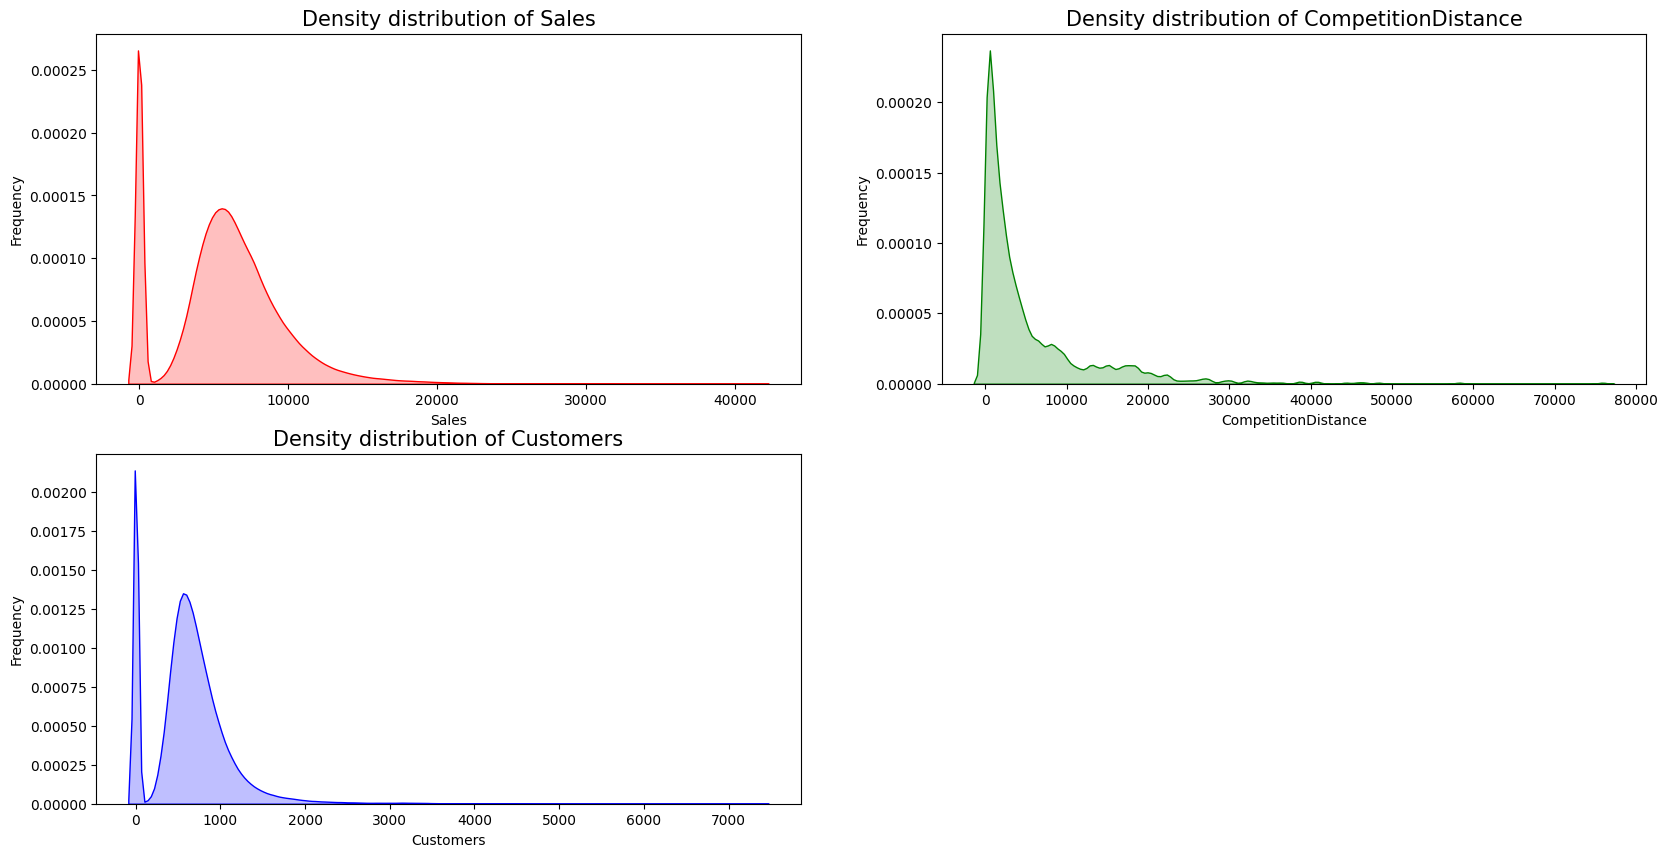

time: 22.4 s (started: 2024-03-01 02:26:08 +00:00)


In [ ]:
# Chart - 1 visualization code
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Red", fill = True)
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Green", fill = True)
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Blue", fill = True)
plt.title('Density distribution of Customers',size = 15)

##### 1. Why did you pick the specific chart?
I have plotted KDE plots to observe the distribution of Sales, CompetitionDistance, and Customers. I chose KDE plots because they effectively display the distribution across all ranges.

##### 2. What is/are the insight(s) found from the chart?
I observed a sharp peak at 0 in the sales and customers plots, indicating numerous instances of no sales. Upon further investigation, I discovered that a significant portion of the data corresponds to days when stores were closed, possibly due to public holidays and state holidays. Additionally, all three plots exhibit right skewness, suggesting that most purchases involve lower amounts, with fewer transactions involving larger amounts. It's important to note that outliers have not been addressed, so the KDE plots may not accurately represent the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###### Positive Business Impact:

The insights gained from the analysis can indeed have a positive business impact. By understanding the distribution of sales and customer numbers, businesses can better plan staffing and inventory management, particularly during holiday periods.
###### Negative Business Impact:
The presence of numerous days with no sales could indicate missed opportunities for revenue generation, which may negatively impact overall growth if not addressed.

#### **Chart-2: Checking  distribution in Remaining columns**

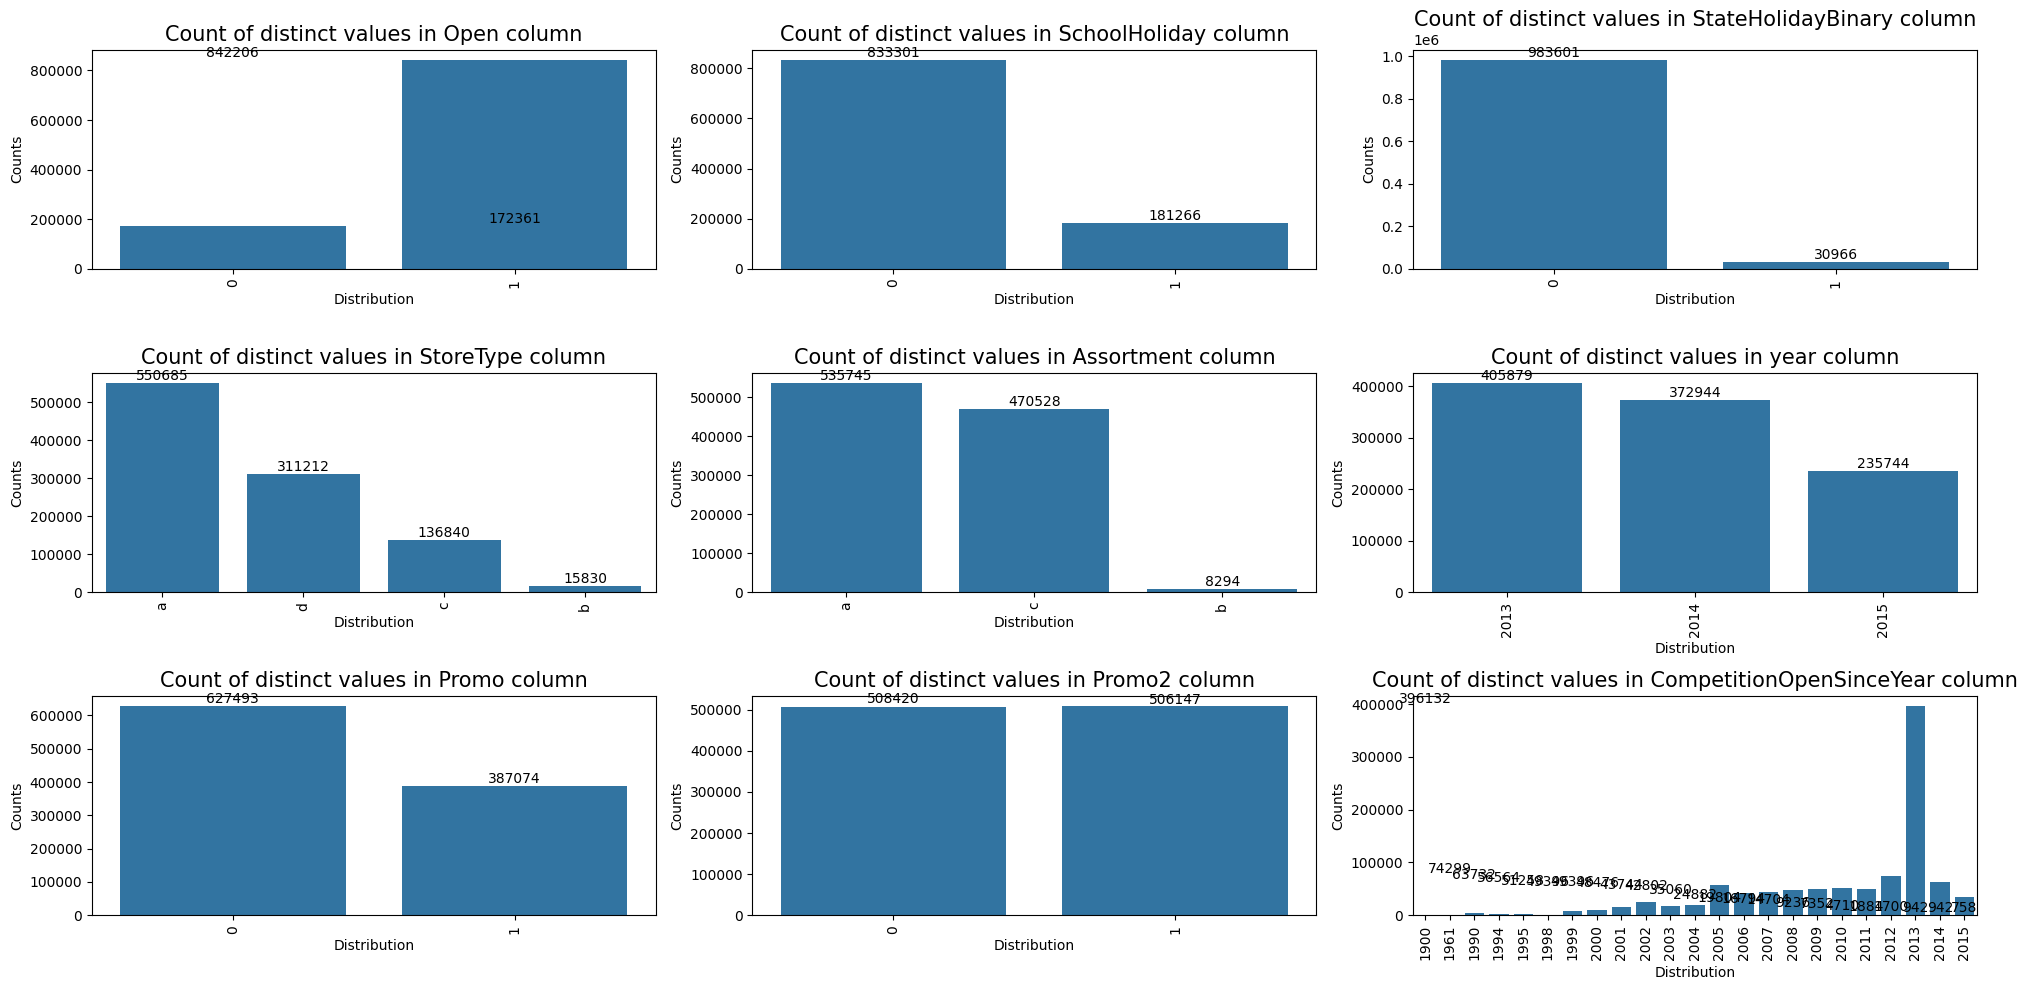

time: 3.6 s (started: 2024-03-01 02:26:31 +00:00)


In [ ]:
# Separating the columns for which i want to see the distribution
col = ["Open", "SchoolHoliday", "StateHolidayBinary", "StoreType", "Assortment", "year","Promo","Promo2",
       "CompetitionOpenSinceYear"]


plt.figure(figsize=(20, 10))


# creating a foor loop which will loop through the list and make a bar chart automatically
for index, column in enumerate(col):
    plt.subplot(3, 3, index + 1)
    distribution = df[column].value_counts()
    plot = sns.barplot(x=distribution.index, y=distribution.values)

    for index, value in enumerate(distribution.values):
        plot.text(index, value, str(value), ha='center', va='bottom')

    plt.xlabel("Distribution")
    plt.ylabel("Counts")
    plt.xticks(rotation="vertical")
    plt.title(f"Count of distinct values in {column} column", size=15)

plt.tight_layout()
plt.show()


************************************** Percentage of distinct values in different columns *************************************


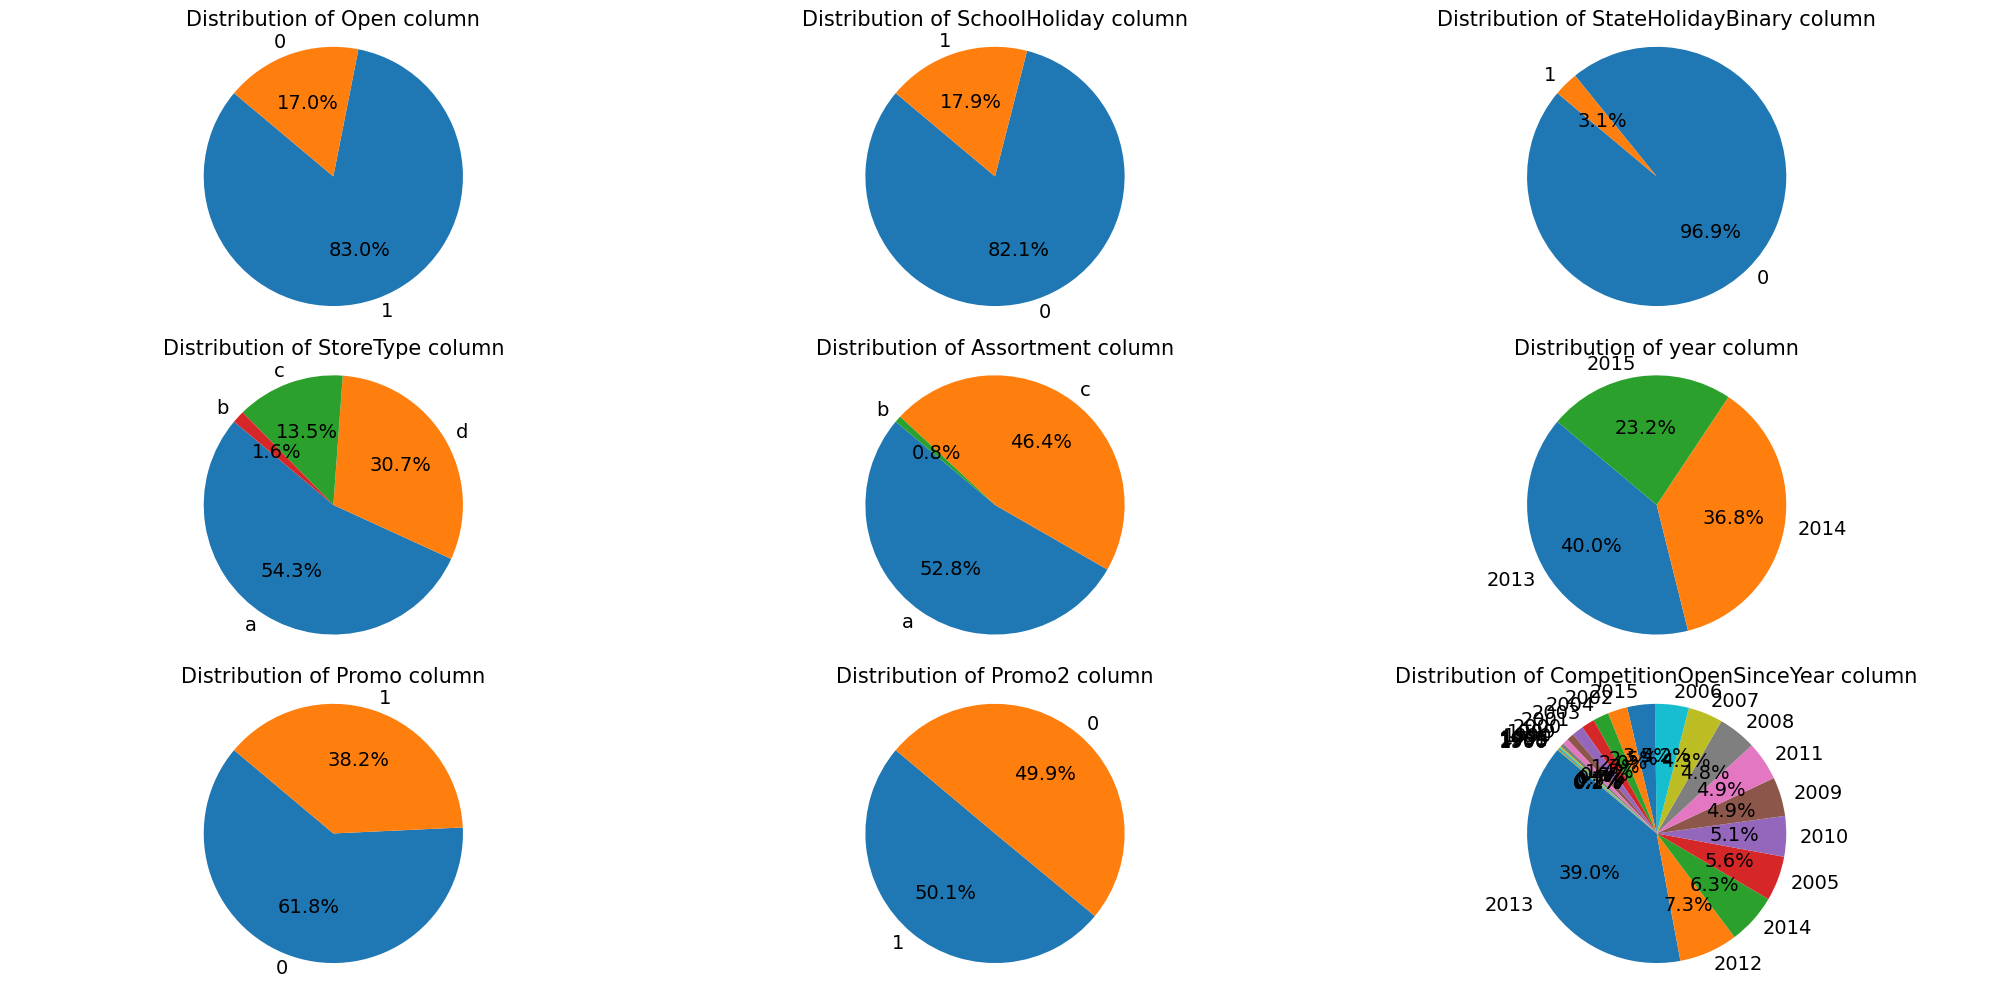

time: 2.16 s (started: 2024-03-01 02:26:34 +00:00)


In [ ]:
# Separating the columns for which i want to see the distribution
col = ["Open", "SchoolHoliday", "StateHolidayBinary", "StoreType", "Assortment", "year","Promo","Promo2",
       "CompetitionOpenSinceYear"]

print("*"*38 + " Percentage of distinct values in different columns "+"*"*37)
plt.figure(figsize=(20, 10))

# creating a foor loop which will loop through the list and make a pie chart automatically
for index, column in enumerate(col):
    plt.subplot(3, 3, index + 1)
    distribution = df[column].value_counts()

    # Plotting the pie chart
    plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.title(f"Distribution of {column} column", size=15)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?
I opted for a combination of bar plot and pie plots to illustrate the distribution of data across different columns. Bar plot easily show the counts where as Pie charts effectively convey the percentage composition of each category within a column.

##### 2. What is/are the insight(s) found from the chart?
- Store Operations: About 17% of the time, stores were closed, likely indicating days off or non-operational hours. Similarly, school holidays occurred roughly 17.9% of the time, this would also includes the sundays. State holidays accounted for only 3.1% of the time.
- Store Characteristics: The majority of stores belong to type "a" (54.3%), followed by type "d" (30.7%), while types "b" and "c" make up smaller percentages (1.6% and 13.5%, respectively). Regarding assortment, basic assortments ("a") are the most common (52.8%), followed by extended assortments ("c") at 46.4%, with extra assortments ("b") being the least prevalent (0.8%).
- Promotional Activities: Approximately 38.2% of stores participated in Promo1, while a higher percentage (49.9%) engaged in Promo2. This indicates a notable emphasis on promotional activities, with Promo2 being more popular among the stores.
- Competition Open Years: The distribution of competition opening years reveals that a significant number of stores' competitors opened in 2013, suggesting heightened competition in that year compared to others.

##### 3. Will the gained insights help in creating a positive business impact?
The insights derived from the analysis can indeed contribute to positive business outcomes:

###### Positive Business Impact:
- Understanding store operations and holiday trends allows for optimized staffing and inventory management, potentially leading to improved customer satisfaction and operational efficiency.
- Tailoring marketing and promotional strategies based on store characteristics and promotional activity participation rates can enhance customer engagement and drive sales.
- Awareness of competition opening years facilitates informed decision-making in terms of market positioning and competitive strategies.

###### Negative Business Impact:
- The concentration of competition openings in specific years, particularly 2013, may indicate heightened market saturation and intensified competition.
- Stored closed 17% of times can effect the sales over the long run.

## Bivariate Analysis

#### Chart 3 - Sales amount per day of the week

In [ ]:
# sales per day of the week
df.groupby(["DayOfWeek"])["Sales"].sum()

DayOfWeek
1    1127746810
2    1018285550
3     952991954
4     909217885
5     978484734
6     844918428
7      29551433
Name: Sales, dtype: int64

time: 42.4 ms (started: 2024-03-01 02:26:36 +00:00)


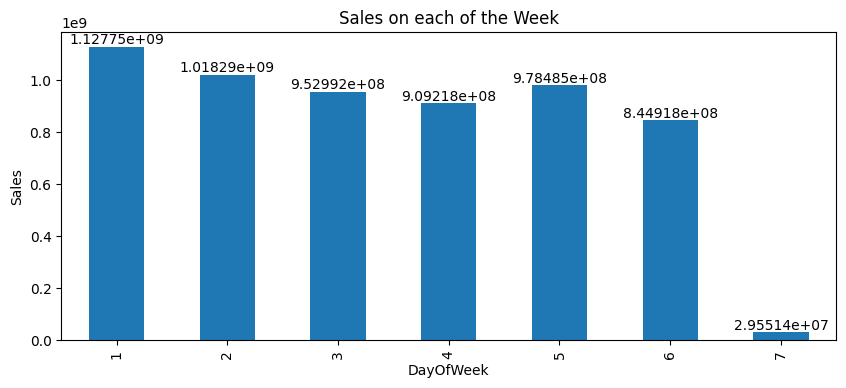

time: 598 ms (started: 2024-03-01 02:26:36 +00:00)


In [ ]:
# plotting the sales on the bar graph
sales_per_day = df.groupby(["DayOfWeek"])["Sales"].sum().plot(kind="bar", figsize=(10,4))
for num in sales_per_day.containers:
    sales_per_day.bar_label(num)

plt.ylabel("Sales")
plt.title("Sales on each of the Week")
plt.show()


##### 1. Why did you pick the specific chart?

I chose to use a bar chart for visualizing the total sales on each day of the week because it effectively displays categorical data (days of the week) along with their corresponding numerical values (total sales).

Bar charts are suitable for comparing values across different categories, making them ideal for visualizing sales data across different days of the week in this case. The length of each bar directly corresponds to the total sales value for that particular day, allowing for easy comparison and interpretation of the data.

##### 2. What is/are the insight(s) found from the chart?

- Most of the sales occur on the first day of the week, i.e., Monday. This suggests that there may be specific factors or events driving higher sales at the beginning of the week.
- After that, sales gradually decline. This could be due to various factors such as consumer fatigue or a decrease in promotional activities.
- Sales are lowest on the last day of the week, i.e., Sunday. It's possible that store were closed on sundays, resulting in lower sales.
- As customers don't purchase much on Sunday, sales may be higher on Mondays. This suggests a potential correlation between low Sunday sales and increased Monday sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###### Positive Business Impact:

- Identifying Peak Sales Days: Understanding that Mondays experience the highest sales can inform businesses to allocate resources and promotional efforts strategically to capitalize on this peak in customer demand. Implementing targeted marketing campaigns or offering special promotions on Mondays can potentially drive higher sales and revenue.


###### Negative Growth Implications:

- Decreasing Sales Trend Throughout the Week: The observation of a gradual decline in sales throughout the week may indicate a concerning trend if not addressed. This decline could be attributed to factors such as consumer fatigue, decreasing foot traffic, or waning interest in products or services. If left unaddressed, this trend could lead to stagnating or declining sales over time, negatively impacting business growth.


#### Chart - 4 Sales amount per month of each year

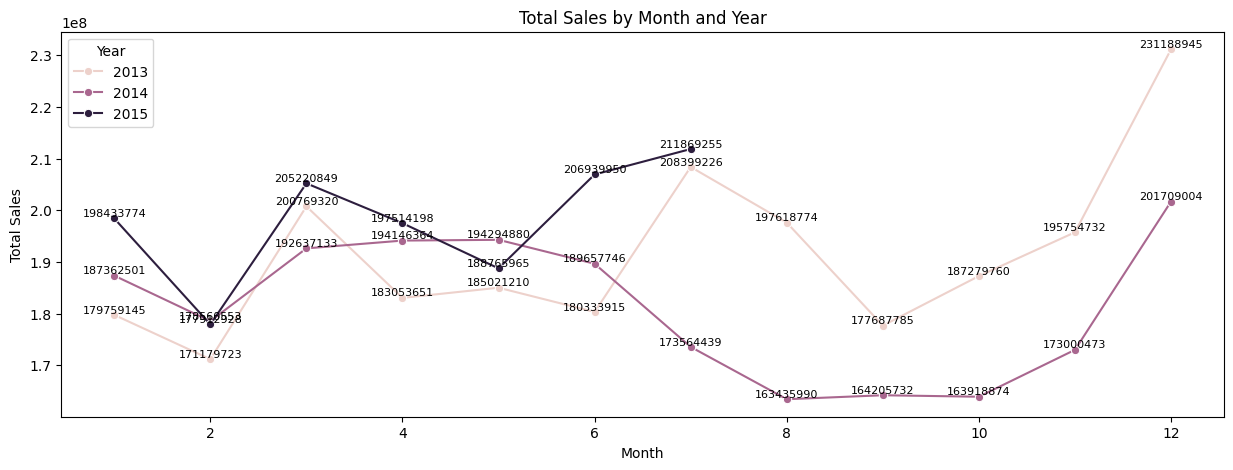

time: 731 ms (started: 2024-03-01 02:26:37 +00:00)


In [ ]:
sales_by_month_year = df.groupby(["month", "year"])["Sales"].sum().reset_index()

# plotting the line plot to show the variation in sales each year
plt.figure(figsize=(15, 5))
sns.lineplot(data=sales_by_month_year, x="month", y="Sales", hue="year", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month and Year")
plt.legend(title="Year")

for index, row in sales_by_month_year.iterrows():
    plt.text(row['month'], row['Sales'], str(int(row['Sales'])), ha='center', va='bottom', fontsize=8)

plt.show()


##### 1. Why did you pick the specific chart?

I chose to use a line plot because it's great for showing how sales change over different months and years. In this type of plot, each point represents the total sales for a specific month, and the lines connect these points to show the overall trend. It's helpful for comparing sales between different years because each year gets its own line on the graph. With a line plot, it's easy to see if sales are going up, down, or staying the same over time. Plus, if there are any big changes in sales, like a sudden increase or decrease, the line plot makes it easy to spot them. Overall, it's a simple and effective way to understand how sales are doing over time.

##### 2. What is/are the insight(s) found from the chart?

- Positive Sales Growth Over Years: The data indicates a positive trend in sales growth over the years, with sales being lowest in 2013, followed by 2014, and highest in 2015. This suggests an overall improvement in sales performance over time, which is a positive indication for the business.

- Seasonal Sales Patterns: There is a noticeable pattern in sales over the months, with a gradual increase in sales from the beginning of the year (first month) until around the seventh month for each year. This gradual increase may be influenced by factors such as seasonal demand, marketing initiatives, or consumer behavior patterns.

- Drop in Sales Mid-Year: Between the seventh and tenth months of the year, there is a significant drop in sales for the years 2013 and 2014. This dip in sales could be attributed to various factors such as seasonal fluctuations, economic conditions, or changes in consumer preferences during that time period.

- Spike in Sales Towards Year End: Towards the end of the year, particularly in the last month, there is a sudden jump in sales. This spike in sales may be attributed to increased consumer spending during the holiday season, including events like Christmas and New Year's.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Positive Business Impact:

Insights on sales growth trends and seasonal patterns can inform targeted marketing strategies and resource allocation, leading to increased revenue and profitability.

##### Negative Growth Implications:

Mid-year sales drops and overdependence on seasonal sales may result in revenue fluctuations and vulnerability to economic downturns

#### Chart - 5 Correlation between sales amount and number of customers in the store

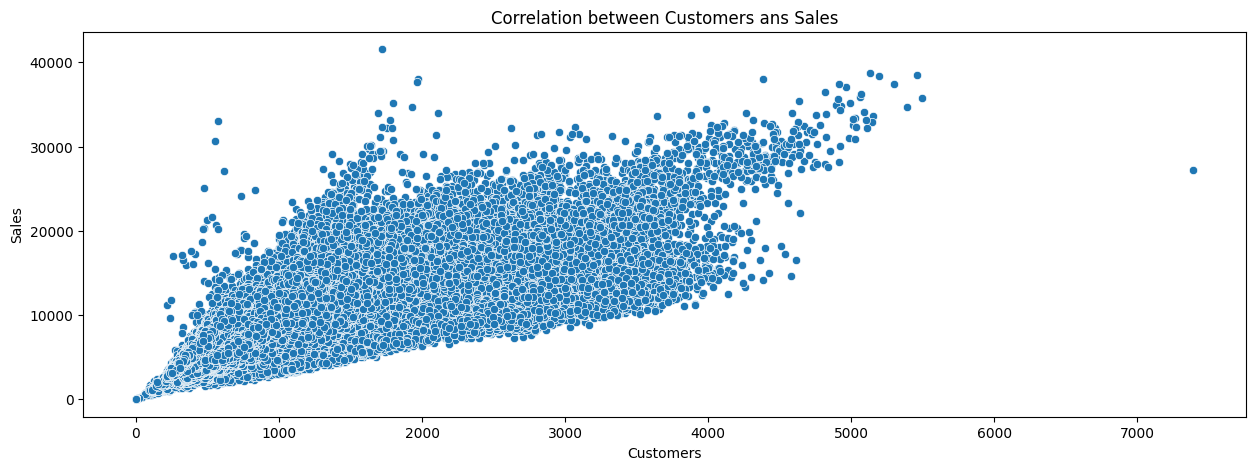

time: 4.1 s (started: 2024-03-01 02:26:38 +00:00)


In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
sns.scatterplot(x="Customers", y="Sales", data = df)
plt.title("Correlation between Customers ans Sales")
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a scatter plot, was chosen to visualize the relationship between the number of customers and sales. Scatter plots are particularly effective for showing the relationship between two continuous variables, making them ideal for exploring correlations or patterns in the data. In this case, by plotting "Customers" on the x-axis and "Sales" on the y-axis, we can visually assess if there is any correlation between the two variables.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that there is a strong positive correlation between the number of customers and sales. This implies that as the number of customers increases, the sales also tend to increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact: Understanding the strong positive correlation between customers and sales enables businesses to tailor marketing efforts to attract more customers, leading to increased sales and revenue.
- Negative Impact: While a strong positive correlation between customers and sales is generally positive, it can also indicate potential challenges. For instance, if a business has reached a point of customer saturation in its market, further increases in the number of customers may not result in proportional sales growth. This could lead to diminishing returns on marketing investments and stagnant revenue growth.

#### Chart - 6 Variation in sales on different types of holidays

In [ ]:
# Chart - 6 visualization code
holidays = df.groupby(["StateHoliday","Open"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales","mean"),
                                                   OpenClosed=("Store","count")).reset_index()
holidays["MeanSales"] = holidays["MeanSales"].astype(int)
holidays


StateHoliday  Open  TotalSales  MeanSales  OpenClosed
0               0     0           0          0      142302
1               0     1  5853208605       6957      841299
2       Christmas     0           0          0        4019
3       Christmas     1      691806       9743          71
4  Easter holiday     0           0          0        6527
5  Easter holiday     1     1433744       9887         145
6  public holiday     0           0          0       19513
7  public holiday     1     5862639       8484         691

time: 166 ms (started: 2024-03-01 02:26:42 +00:00)


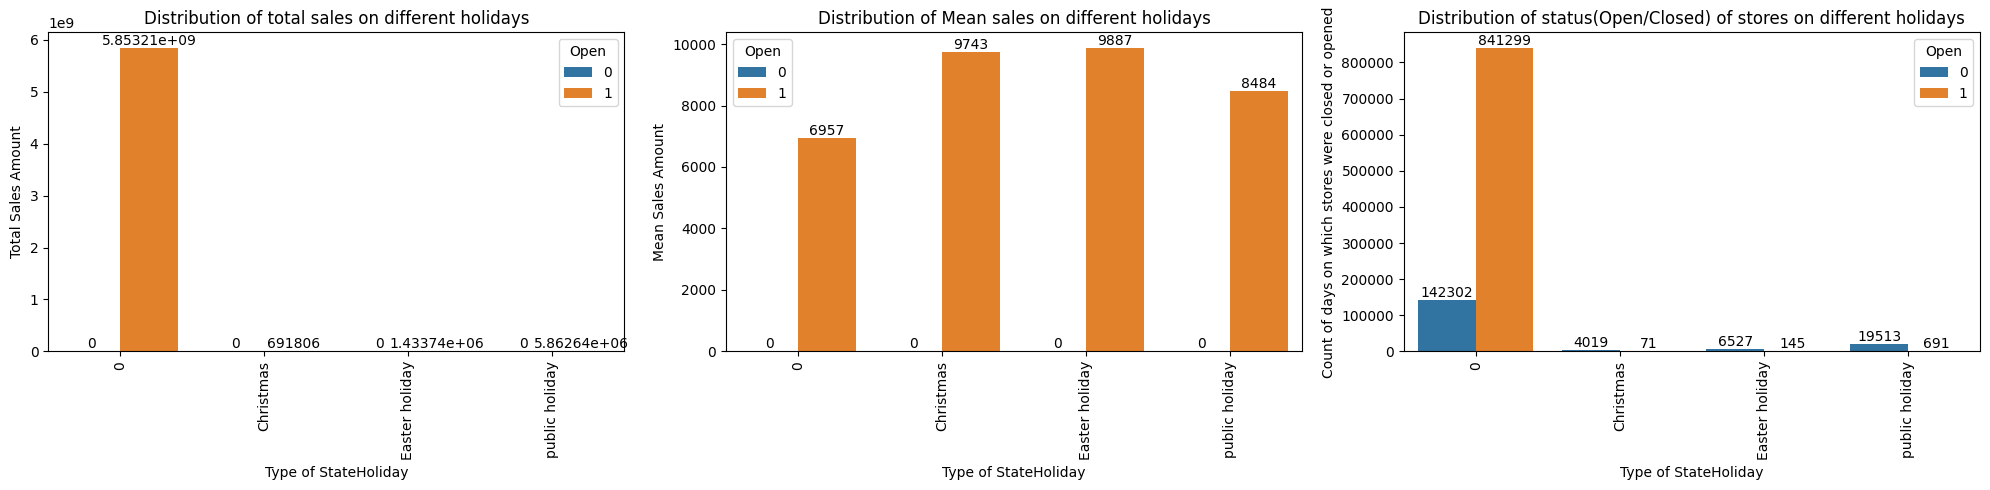

time: 1.67 s (started: 2024-03-01 02:26:42 +00:00)


In [ ]:
# visualizing above tabular data with the help of bar chart
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)

# code to display the bar plot for total sales
total_sales = sns.barplot(x="StateHoliday", y="TotalSales", hue="Open", data=holidays)
for num in total_sales.containers:
    total_sales.bar_label(num)
plt.xlabel("Type of StateHoliday")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation="vertical")
plt.title("Distribution of total sales on different holidays")

# code to display the bar plot for Mean sales
plt.subplot(1,3,2)
mean_sales = sns.barplot(x="StateHoliday", y="MeanSales", hue="Open", data=holidays)
for num in mean_sales.containers:
    mean_sales.bar_label(num)
plt.xlabel("Type of StateHoliday")
plt.ylabel("Mean Sales Amount")
plt.xticks(rotation="vertical")
plt.title("Distribution of Mean sales on different holidays")

# code to display the bar plot for status of store
plt.subplot(1,3,3)
store_open_closed = sns.barplot(x="StateHoliday", y="OpenClosed", hue="Open", data=holidays)
for num in store_open_closed.containers:
    store_open_closed.bar_label(num)
plt.xlabel("Type of StateHoliday")
plt.ylabel("Count of days on which stores were closed or opened")
plt.xticks(rotation="vertical")
plt.title("Distribution of status(Open/Closed) of stores on different holidays")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I used a tabular format and bar chart here because it seems that the data may not be well-suited for graphical representation due to the disparity in sales between open and closed days. Tabular presentation allows for a clear and concise display of the data, facilitating easy comparison and analysis of the state holiday, open status, total sales, and store counts without the limitations of graphical representation

##### 2. What is/are the insight(s) found from the chart?

- There were 1955 instances when stores were closed, possibly due to public holidays.
- Stores were closed 6545 times for Easter holidays and 4029 times for Christmas.
- There were holidays for about 4029 days due to Christmas, out of which the stores were open for only 71 days, resulting in higher average sales compared to normal days. A similar pattern is observed for Easter Holiday days and public holidays.
- Interestingly, there were 142677 instances when stores were closed despite no holidays being observed. Some of these closures may include Sundays.
- Mean sales during holidays were greater than on non-holiday days. This suggests that despite the stores being closed on holidays, there is a notable increase in sales on those days compared to regular days without holidays

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:

Higher mean sales on holidays indicate potential revenue-generating opportunities, even with store closures. Businesses can leverage this insight to plan for targeted promotions or marketing strategies aimed at maximizing sales during holiday periods, contributing to positive business impact.

- Negative Growth Implications:

The substantial number of store closures despite no observed holidays may indicate missed revenue opportunities and operational inefficiencies. Businesses should investigate the reasons for these closures and take corrective measures to minimize revenue loss and optimize operational performance.

#### Chart - 7 Variation is Total sales, Average Sales on Promo and Promo2 Stores

In [ ]:
# Grouping by "Promo" column
sales_promo = df.groupby(["Promo"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales", "mean"), StoreCount=("Store", "count"))
print("Sales Summary by Promo:")
print(sales_promo)

print("\n"+"*" * 120+"\n")  # Printing separator line

# Grouping by "Promo2" column
sales_promo2 = df.groupby(["Promo2"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales", "mean"), StoreCount=("Store", "count"))
print("Sales Summary by Promo2:")
print(sales_promo2)


Sales Summary by Promo:
       TotalSales    MeanSales  StoreCount
Promo                                     
0      2766592351  4408.961297      627493
1      3094604443  7994.865176      387074

************************************************************************************************************************

Sales Summary by Promo2:
        TotalSales    MeanSales  StoreCount
Promo2                                     
0       3101899375  6128.455518      506147
1       2759297419  5427.200777      508420
time: 91.1 ms (started: 2024-03-01 02:26:44 +00:00)


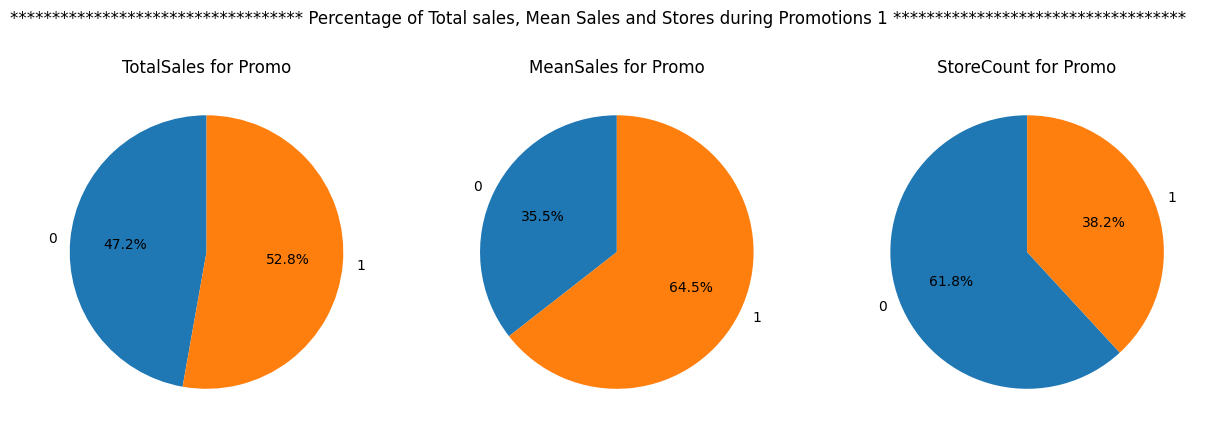

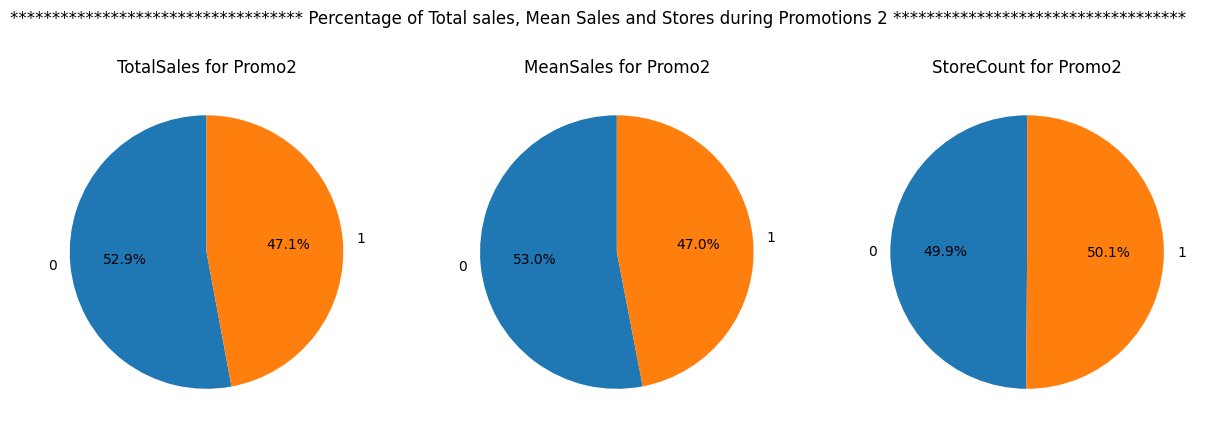

time: 713 ms (started: 2024-03-01 02:26:44 +00:00)


In [ ]:
# Pie chart for promo
col1 = list(sales_promo.columns)
plt.figure(figsize=(15, 5))
plt.suptitle("*" * 35 + " Percentage of Total sales, Mean Sales and Stores during Promotions 1 " + "*" * 35)
for i, j in enumerate(col1):
    plt.subplot(1, 3, i + 1)
    plt.pie(sales_promo[j], labels=sales_promo.index, autopct='%1.1f%%', startangle=90)
    plt.title(j + " for Promo")


# Pie chart for promo2
col2 = list(sales_promo2.columns)
plt.figure(figsize=(15, 5))
plt.suptitle("*" * 35 + " Percentage of Total sales, Mean Sales and Stores during Promotions 2 " + "*" * 35)
for i, j in enumerate(col2):
    plt.subplot(1, 3, i + 1)
    plt.pie(sales_promo2[j], labels=sales_promo.index, autopct='%1.1f%%', startangle=90)
    plt.title(j + " for Promo2")

plt.show()


##### 1. Why did you pick the specific chart?

I am using pie charts to visualize the distribution of TotalSales, MeanSales, StoreCount for promo and non-promo days because pie charts effectively show the proportion of each category within a dataset. This allows for a clear understanding of how promotional activities impact total sales, mean sales, and store count. Additionally, pie charts are visually appealing and intuitive, making them suitable for conveying proportions and percentages in a concise and straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

- Promotional Stores and Revenue Generation:

Promotional stores, comprising 38.2% of total stores, contribute 52.8% of total revenue. This highlights the significant positive impact of promotional activities on revenue, despite their lower representation compared to non-promo stores.
Promo2 stores represent nearly 50% of total stores but contribute only 47% of total sales, which is less than promo1 sales. This suggests a potential decline in customer interest in promo2, possibly due to less appealing offers compared to promo1.

- Mean Sales Comparison:

The mean sales of promotional stores are 64.5% higher than non-promotional stores. This notable difference underscores how promotional activities drive higher sales volumes per store, leading to increased revenue and potentially greater profitability.
However, the mean sales of promo2 stores are only 47%, significantly lower than promo1. This discrepancy implies that promo2 may not be as well-received by customers as promo1, indicating a need for reassessment or improvement in promo2 strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:

Maximizing Revenue: Promotional stores contribute a significant portion (52.8%) of total revenue despite being a smaller proportion (38.2%) of total stores, indicating the effectiveness of promotional activities in driving revenue.

Enhanced Sales Performance: Mean sales on promotional stores are 64.5% higher than non-promotional stores, indicating that promotional activities stimulate consumer spending and drive higher sales volumes.

- Negative Growth Implications:

One potential negative implication is the observed decline in customer interest in promo2 compared to promo1. If not addressed, this could lead to decreased sales and revenue from promo2 stores over time. Businesses may need to allocate resources to revitalize promo2 offers or reconsider their promotional strategies to prevent further declines.

Additionally, if businesses fail to adapt to changing consumer preferences or overlook the significance of promotional activities, they may miss out on opportunities to maximize revenue and profitability. This could result in stagnant growth or even a decline in market share over time.

#### Chart - 8 Variation in sales on School days and School Holidays

In [ ]:
school_holiday = sales_df.groupby(["SchoolHoliday"]).agg(TotalSales = ("Sales", "sum"), MeanSales = ("Sales","mean"), StoreCount=("Store", "count"))
school_holiday

TotalSales    MeanSales  StoreCount
SchoolHoliday                                     
0              4696260531  5620.979034      835488
1              1176920092  6476.522207      181721

time: 55.1 ms (started: 2024-03-01 02:26:45 +00:00)


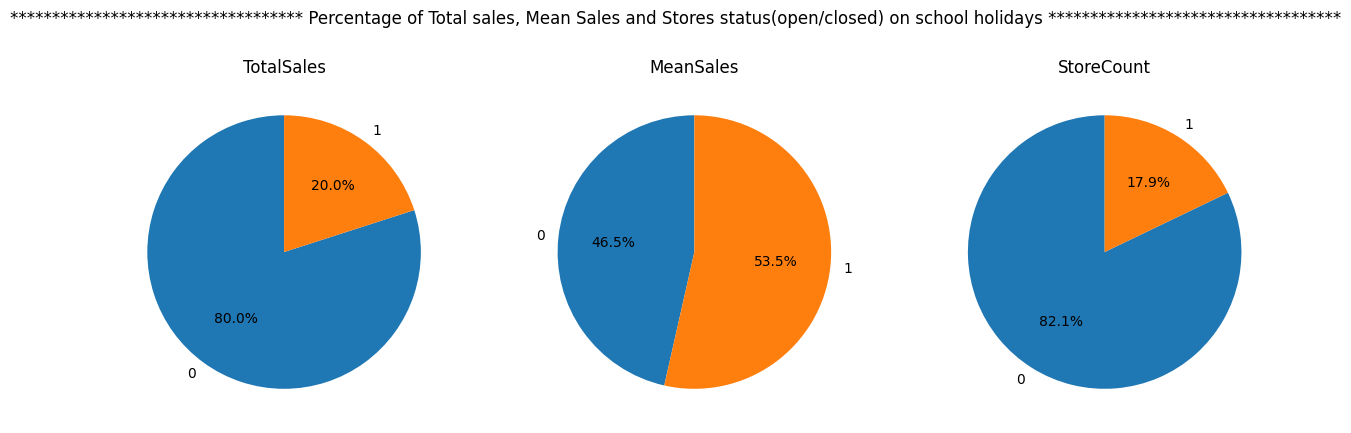

time: 231 ms (started: 2024-03-01 02:26:45 +00:00)


In [ ]:
# Chart - 8 visualization code
col = list(school_holiday.columns)

plt.figure(figsize=(15,5))
plt.suptitle("*" * 35 + " Percentage of Total sales, Mean Sales and Stores status(open/closed) on school holidays " + "*" * 35)
for i, j in enumerate(col):
    plt.subplot(1, 3, i+1)
    plt.pie(school_holiday[j], labels=school_holiday.index, autopct='%1.1f%%', startangle=90)
    plt.title(j)

plt.show()

##### 1. Why did you pick the specific chart?

I am using pie charts to visualize the distribution of TotalSales, MeanSales, StoreCount for schooldays and shool holidays days because pie charts effectively show the proportion of each category within a dataset. This allows for a clear understanding of how promotional activities impact total sales, mean sales, and store count. Additionally, pie charts are visually appealing and intuitive, making them suitable for conveying proportions and percentages in a concise and straightforward manner.

##### 2. What is/are the insight(s) found from the chart?

School Holidays and Sales Contribution: School holidays constitute 17.9% of the dataset, contributing to 20% of the total sales. This indicates that school holidays have a notable impact on overall sales performance.

Average Sales Comparison: The average sale on school holidays is 53.5%, while on school days it is 46.5%. This suggests that customers tend to spend more per transaction during school holidays compared to regular school days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the mean sales on school holidays are higher than regular days suggests a potential correlation between school holidays and state holidays, as we previously observed that average sales on holidays are higher.

- Positive Impact:

Increased Revenue: Higher mean sales on school holidays suggest revenue opportunities, enabling businesses to tailor strategies for higher sales during these periods.

- Negative Growth:

Dependency Risk: Over-reliance on holiday periods for revenue growth poses a risk if consumer behavior shifts, emphasizing the need for diversified revenue streams.

##### chart 9 - Effect of month and year on sales during the promo2 peroid.

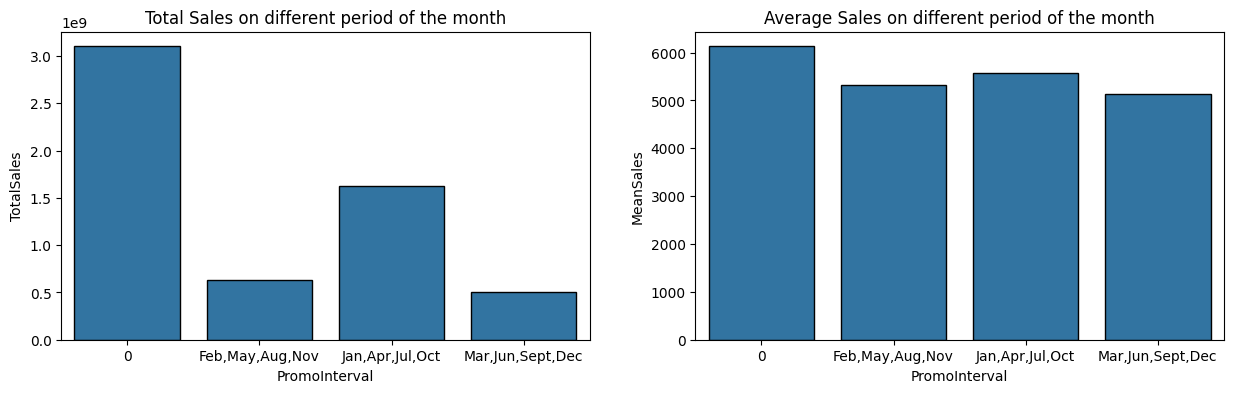

time: 414 ms (started: 2024-03-01 02:26:45 +00:00)


In [ ]:
# Sales vs PromoInterval
sales_promointerval = df.groupby(["PromoInterval"]).agg(TotalSales = ("Sales","sum"), MeanSales = ("Sales", "mean")).reset_index()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plots=sns.barplot(x='PromoInterval', y='TotalSales',data= sales_promointerval, edgecolor='black')
plt.title("Total Sales on different period of the month")

plt.subplot(1,2,2)
plots=sns.barplot(x='PromoInterval', y='MeanSales',data= sales_promointerval, edgecolor='black')
plt.title("Average Sales on different period of the month")

plt.show()

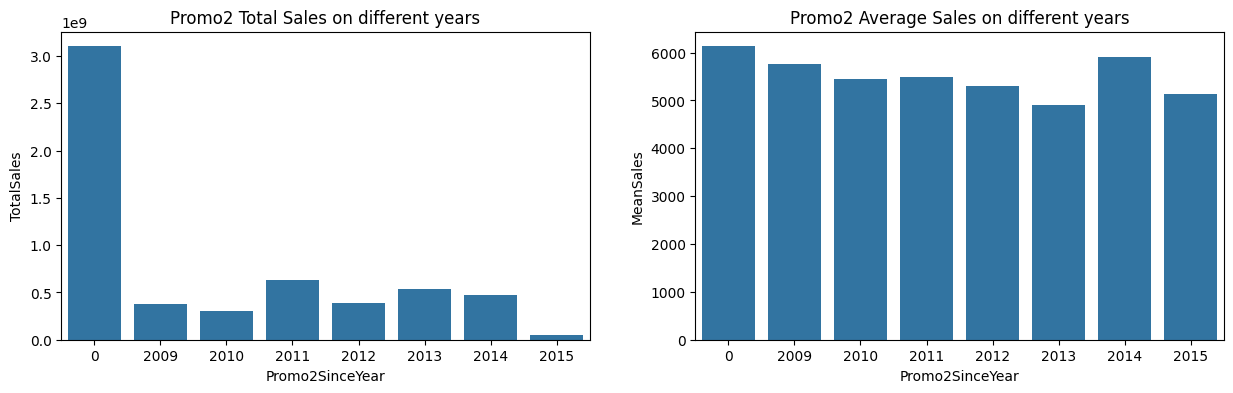

time: 418 ms (started: 2024-03-01 02:26:45 +00:00)


In [ ]:
sales_promoyear = df.groupby(["Promo2SinceYear"]).agg(TotalSales = ("Sales","sum"), MeanSales = ("Sales", "mean")).reset_index()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plots=sns.barplot(x='Promo2SinceYear', y='TotalSales',data=sales_promoyear)
plt.title("Promo2 Total Sales on different years")

plt.subplot(1,2,2)
plots=sns.barplot(x='Promo2SinceYear', y='MeanSales',data=sales_promoyear)
plt.title("Promo2 Average Sales on different years")

plt.show()

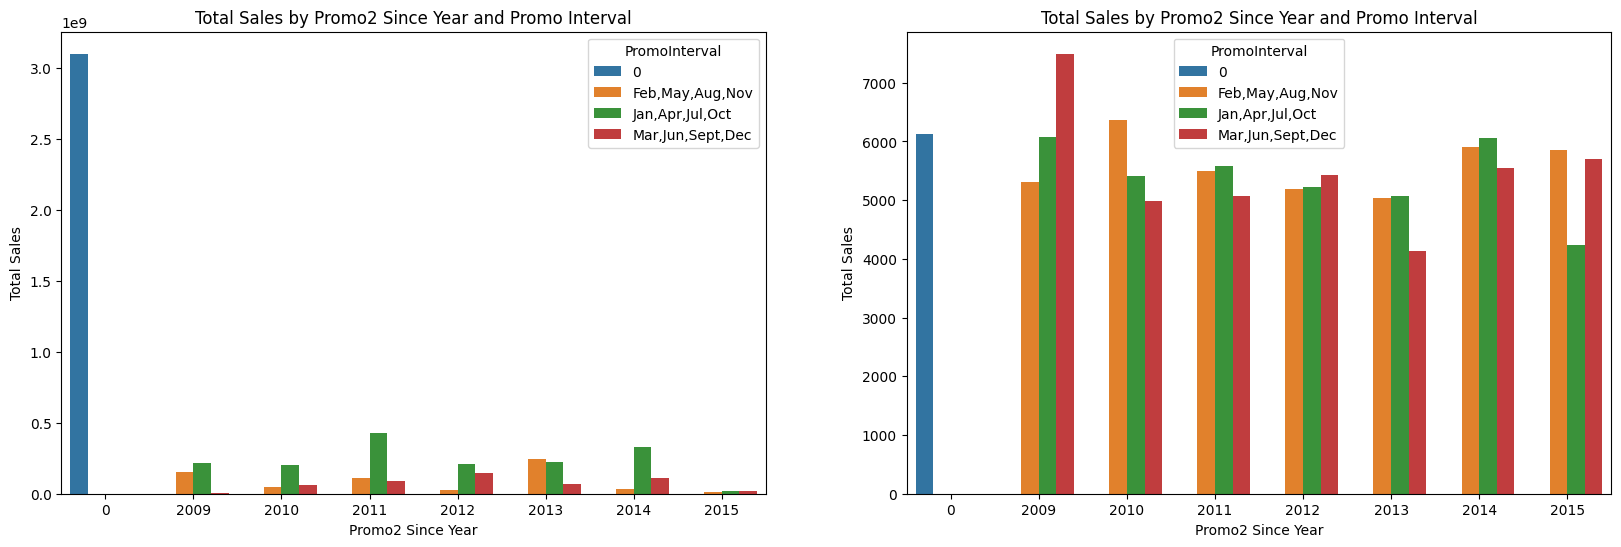

time: 700 ms (started: 2024-03-01 02:26:46 +00:00)


In [ ]:
# Create the DataFrame
sales_promo2 = df.groupby(["Promo2SinceYear", "PromoInterval"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales", "mean")).reset_index()
sales_promo2["MeanSales"] = sales_promo2["MeanSales"].astype("int")

# # Plotting
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(x="Promo2SinceYear", y="TotalSales", hue="PromoInterval", data=sales_promo2)
plt.title("Total Sales by Promo2 Since Year and Promo Interval")
plt.xlabel("Promo2 Since Year")
plt.ylabel("Total Sales")

plt.subplot(1,2,2)
sns.barplot(x="Promo2SinceYear", y="MeanSales", hue="PromoInterval", data=sales_promo2)
plt.title("Total Sales by Promo2 Since Year and Promo Interval")
plt.xlabel("Promo2 Since Year")
plt.ylabel("Total Sales")

plt.show()


##### 1. Why did you pick the specific chart?
- I selected a group of  bar plots to visualize the distribution of sales during Promo2 intervals across different years. This choice was made because the bar plot effectively displays the sales counts within each category, allowing for easy comparison across multiple categories.

##### 2. What is/are the insight(s) found from the chart?
- Total Sales Comparison: The total sales during non-Promo2 days are notably higher compared to Promo2 days. Additionally, the average sales during non-Promo2 days are slightly greater than during Promo2 days, indicating that the impact of Promo2 on sales may not be as significant as anticipated.
- Promo2 Interval Analysis: Among the various Promo2 intervals, the combination of Jan, Apr, Jul, and Oct intervals stands out with higher total sales compared to other intervals. Similarly, the average sales during these intervals are greater than during other intervals. It's noteworthy that even though these intervals show higher sales, they still fall short compared to non-Promo months.
- Yearly Comparison: The average sales in 2014 are higher compared to other years during Promo2. However, the total sales for the year 2011 surpass those of other years, indicating that while certain years may have higher average sales during Promo2, others may perform better in terms of total sales.

##### 3. Will the gained insights help in creating a positive business impact?
###### Positive Business Impact:
- Positive Impact: The analysis reveals that stores are not solely reliant on Promo2 for generating sales, as non-Promo2 days exhibit comparable or even higher average sales. This suggests that while Promo2 may not be driving significant sales increases, it still serves as a complementary strategy to engage new customers or retain existing ones.

###### Negative Business Impact:
- Negative Impact: Despite the resources allocated to Promo2, the analysis suggests that its impact on sales and average sales is not substantial. This could imply inefficiencies in the Promo2 strategy or missed opportunities for effective promotional campaigns. Additionally, the variability in sales across Promo2 intervals and years indicates the need for a more targeted and optimized approach to promotional activities.

##### chart 10 - Effect on Sales with CompetitionOpenSinceYear

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

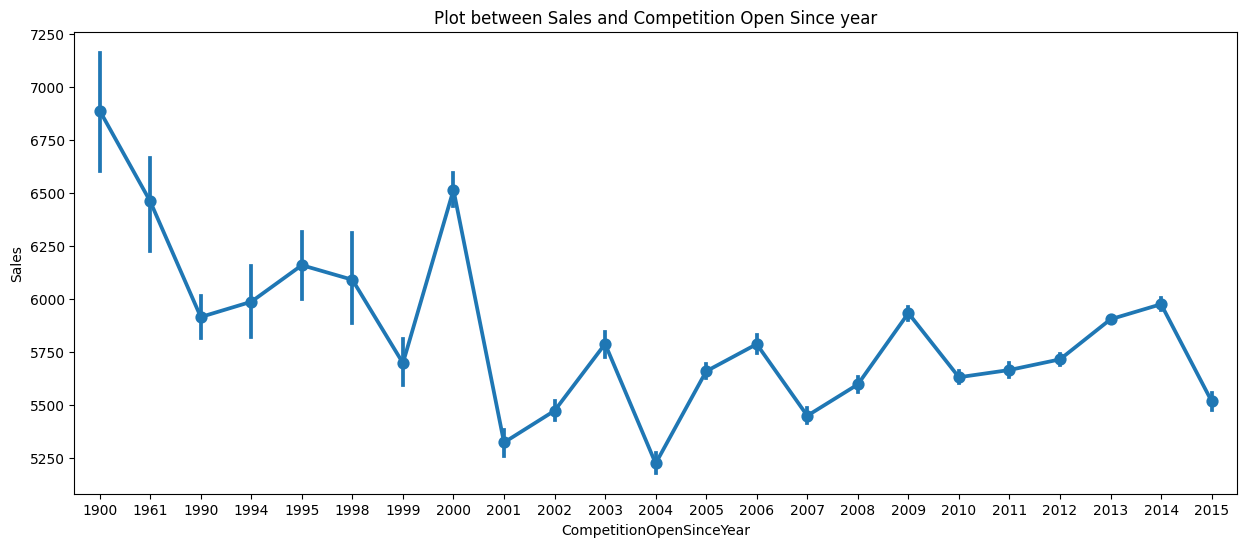

time: 9.85 s (started: 2024-03-01 02:26:46 +00:00)


In [ ]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')


##### 1. Why did you pick the specific chart?
- To know the average sales for each year since a competitor opened near the store .

##### 2. What is/are the insight(s) found from the chart?
- From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
- Since almost every subsequent year reports sudden drop/rise in the sales, owners need to work on their stockings and marketing tactics. The basic reason for this sudden change could be explored more deeply and a plausible solution to it can be reached.

##### chart - 11 Sales per store type and assortment type

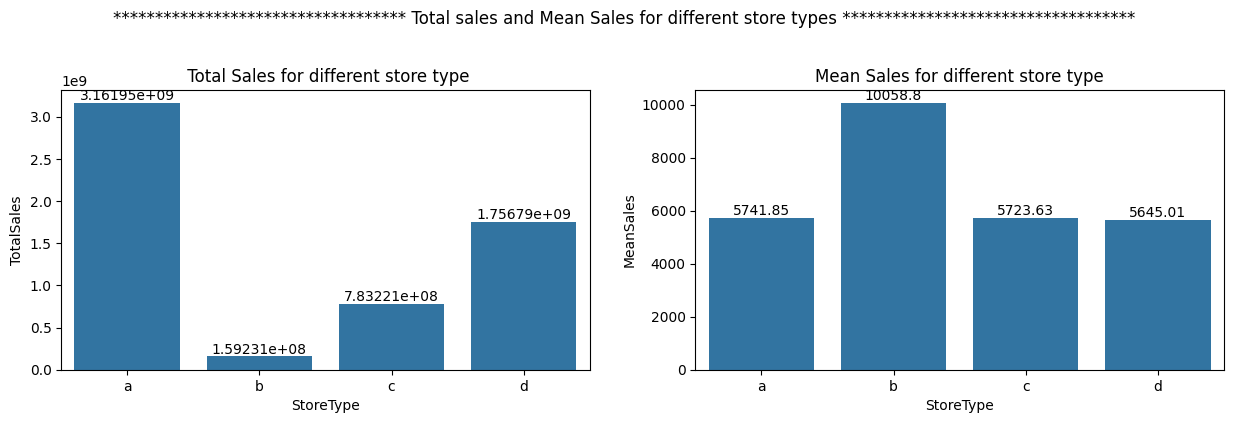

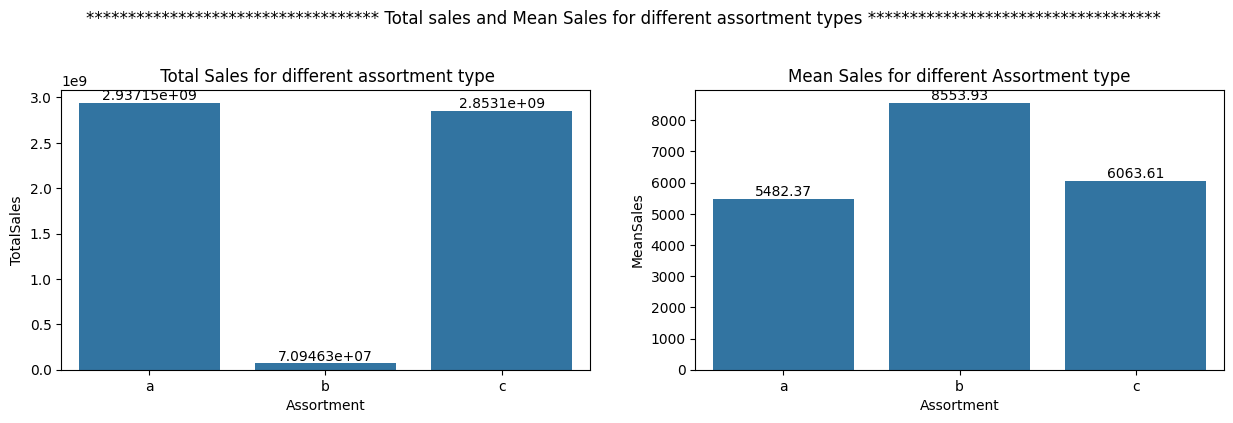

time: 801 ms (started: 2024-03-01 02:26:56 +00:00)


In [ ]:
sales_storetype = df.groupby(["StoreType"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales", "mean")).reset_index()
sales_assortment = df.groupby(["Assortment"]).agg(TotalSales=("Sales", "sum"), MeanSales=("Sales", "mean")).reset_index()

plt.figure(figsize=(15,8))
plt.suptitle("*" * 35 + " Total sales and Mean Sales for different store types " + "*" * 35)
plt.subplot(2,2,1)
plot1=sns.barplot(x='StoreType', y='TotalSales',data=sales_storetype)
plt.title(" Total Sales for different store type")
for num in plot1.containers:
    plot1.bar_label(num)

plt.subplot(2,2,2)
plot2=sns.barplot(x='StoreType', y='MeanSales',data=sales_storetype)
plt.title("Mean Sales for different store type")
for num in plot2.containers:
    plot2.bar_label(num)

plt.figure(figsize=(15,8))
plt.suptitle("*" * 35 + " Total sales and Mean Sales for different assortment types " + "*" * 35)
plt.subplot(2,2,1)
plot3=sns.barplot(x='Assortment', y='TotalSales',data=sales_assortment)
plt.title(" Total Sales for different assortment type")
for num in plot3.containers:
    plot3.bar_label(num)

plt.subplot(2,2,2)
plot4=sns.barplot(x='Assortment', y='MeanSales',data=sales_assortment)
plt.title("Mean Sales for different Assortment type")
for num in plot4.containers:
    plot4.bar_label(num)

plt.show()


##### 1. Why did you pick the specific chart?

- I selected a group of  bar plots to visualize the distribution of sales during Promo2 intervals across different years. This choice was made because the bar plot effectively displays the sales counts within each category, allowing for easy comparison across multiple categories.

##### 2. What is/are the insight(s) found from the chart?

- Store Type Comparison:

Total sales are highest for store type A, followed by store type D, and lowest for store type B. However, the average sales for store type B are significantly higher compared to the other store types. This suggests that although store type B may have fewer transactions, the value of each transaction is much higher. This could be due to the presence of high-value items or luxury products in store type B, attracting customers willing to spend more.

- Assortment Comparison:

Total sales are relatively similar for assortments A and C, while assortment B has the lowest total sales. Interestingly, similar to store types, the average sales for assortment B are notably higher compared to the other assortments. This indicates that although assortment B may have lower transaction volume, the value per transaction is significantly higher. This could be attributed to the presence of premium or niche products in assortment B, appealing to a specific segment of customers willing to pay premium prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:

The analysis reveals that although store type B and assortment B may have lower transaction volumes, they contribute significantly to overall revenue due to higher average sales per transaction. This suggests that catering to a niche market or offering premium products can be lucrative for the business, as it allows for maximizing revenue without solely relying on high transaction volumes.

- Negative Impact:

While store type B and assortment B may generate higher revenue per transaction, the lower transaction volumes compared to other store types and assortments could potentially limit overall sales growth. Additionally, relying too heavily on premium or niche products may narrow the customer base, leading to decreased market reach and potential loss of customers who prefer more affordable options. Thus, there is a need to strike a balance between offering premium products and maintaining a diverse product range to cater to different customer segments and sustain long-term growth.

### Multivariate Analysis

##### Chart - 12 Correlation between sales and competition distance

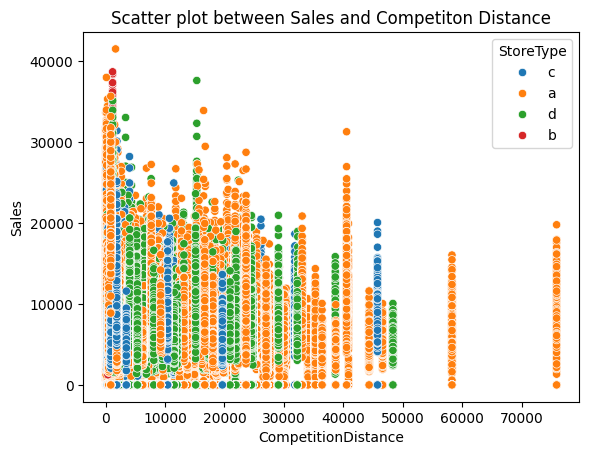

Correlation coefficient between CompetitionDistance and Sales: -0.019229200503111072
time: 20.2 s (started: 2024-03-01 02:26:57 +00:00)


In [ ]:
# scatter plot between sales and competiton distance
sns.scatterplot(x = "CompetitionDistance", y="Sales", data =df, hue = "StoreType")
plt.title("Scatter plot between Sales and Competiton Distance")
plt.show()

# correlation between sales and Competiton distance
correlation = df["CompetitionDistance"].corr(df["Sales"])
print("Correlation coefficient between CompetitionDistance and Sales:", correlation)

##### 1. Why did you pick the specific chart?
I chose to plot a scatter plot because it's an effective way to visualize the relationship between two continuous variables, such as CompetitionDistance and Sales.

##### 2. What is/are the insight(s) found from the chart?
The scatter plot reveals that there is almost no correlation between sales and competition distance. The data points are scattered randomly without any clear trend or pattern, indicating that changes in competition distance do not significantly impact sales.

##### 3. Will the gained insights help in creating a positive business impact?
###### Positive Business Impact:
The insights derived from the scatter plot may not directly contribute to creating a positive business impact. However, understanding the lack of correlation between competition distance and sales can help businesses focus their resources on other factors that may have a more significant influence on sales performance.

###### Negative Business Impact:
The absence of a correlation between competition distance and sales suggests that businesses cannot rely solely on adjusting competition distance to drive sales growth. This could be viewed as a limitation in terms of strategic planning, as businesses may need to explore other avenues for increasing sales, such as marketing strategies, product innovation, or customer engagement initiatives.


#### Chart - 13 - Correlation Heatmap

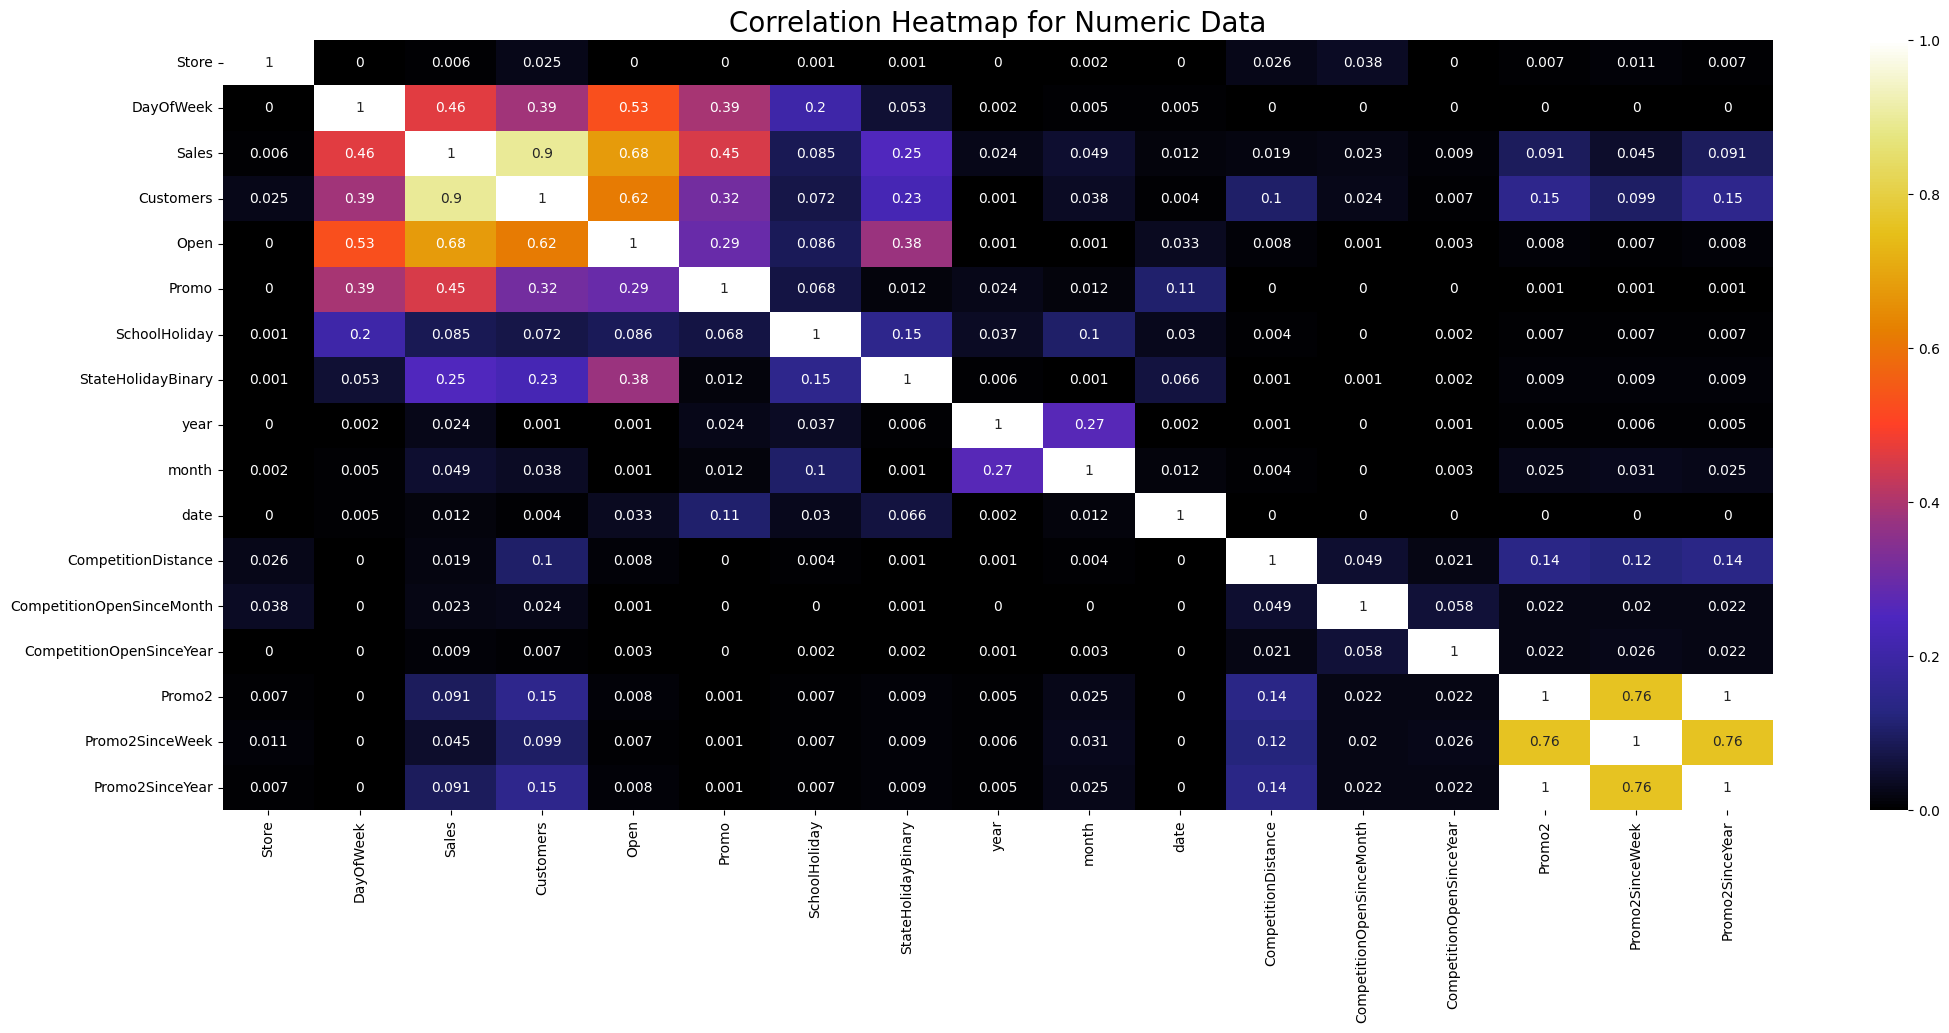

time: 1.45 s (started: 2024-03-01 02:27:17 +00:00)


In [ ]:
# Filter out object columns from DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot correlation heatmap for numeric columns only
plt.figure(figsize=(25, 10))
sns.heatmap(abs(round(numeric_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)
plt.title('Correlation Heatmap for Numeric Data', size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are chosen for correlation analysis because they provide a visual representation of the correlation matrix, making it easy to identify patterns and relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

- There is a strong positive correlation between the number of customers and sales, indicating that higher customer traffic tends to result in increased sales.
- Open stores also show a strong positive correlation with sales and customers, suggesting that open stores attract more customers and generate higher sales.
- Promotional activities exhibit a moderate positive correlation with sales and customers, indicating that promotions may have a positive impact on sales and customer traffic.
- Day of the week shows a moderate negative correlation with sales, customers, and promotions. This suggests that certain days of the week may experience lower sales and customer traffic, which could potentially be targeted for promotional activities to boost sales.
- State holidays show a negative correlation with sales, implying that sales may decrease during state holidays, possibly due to reduced consumer activity or store closures.
- Promo2 have sligtly negative correlation with sales.

#### Chart - 15 - Pair Plot

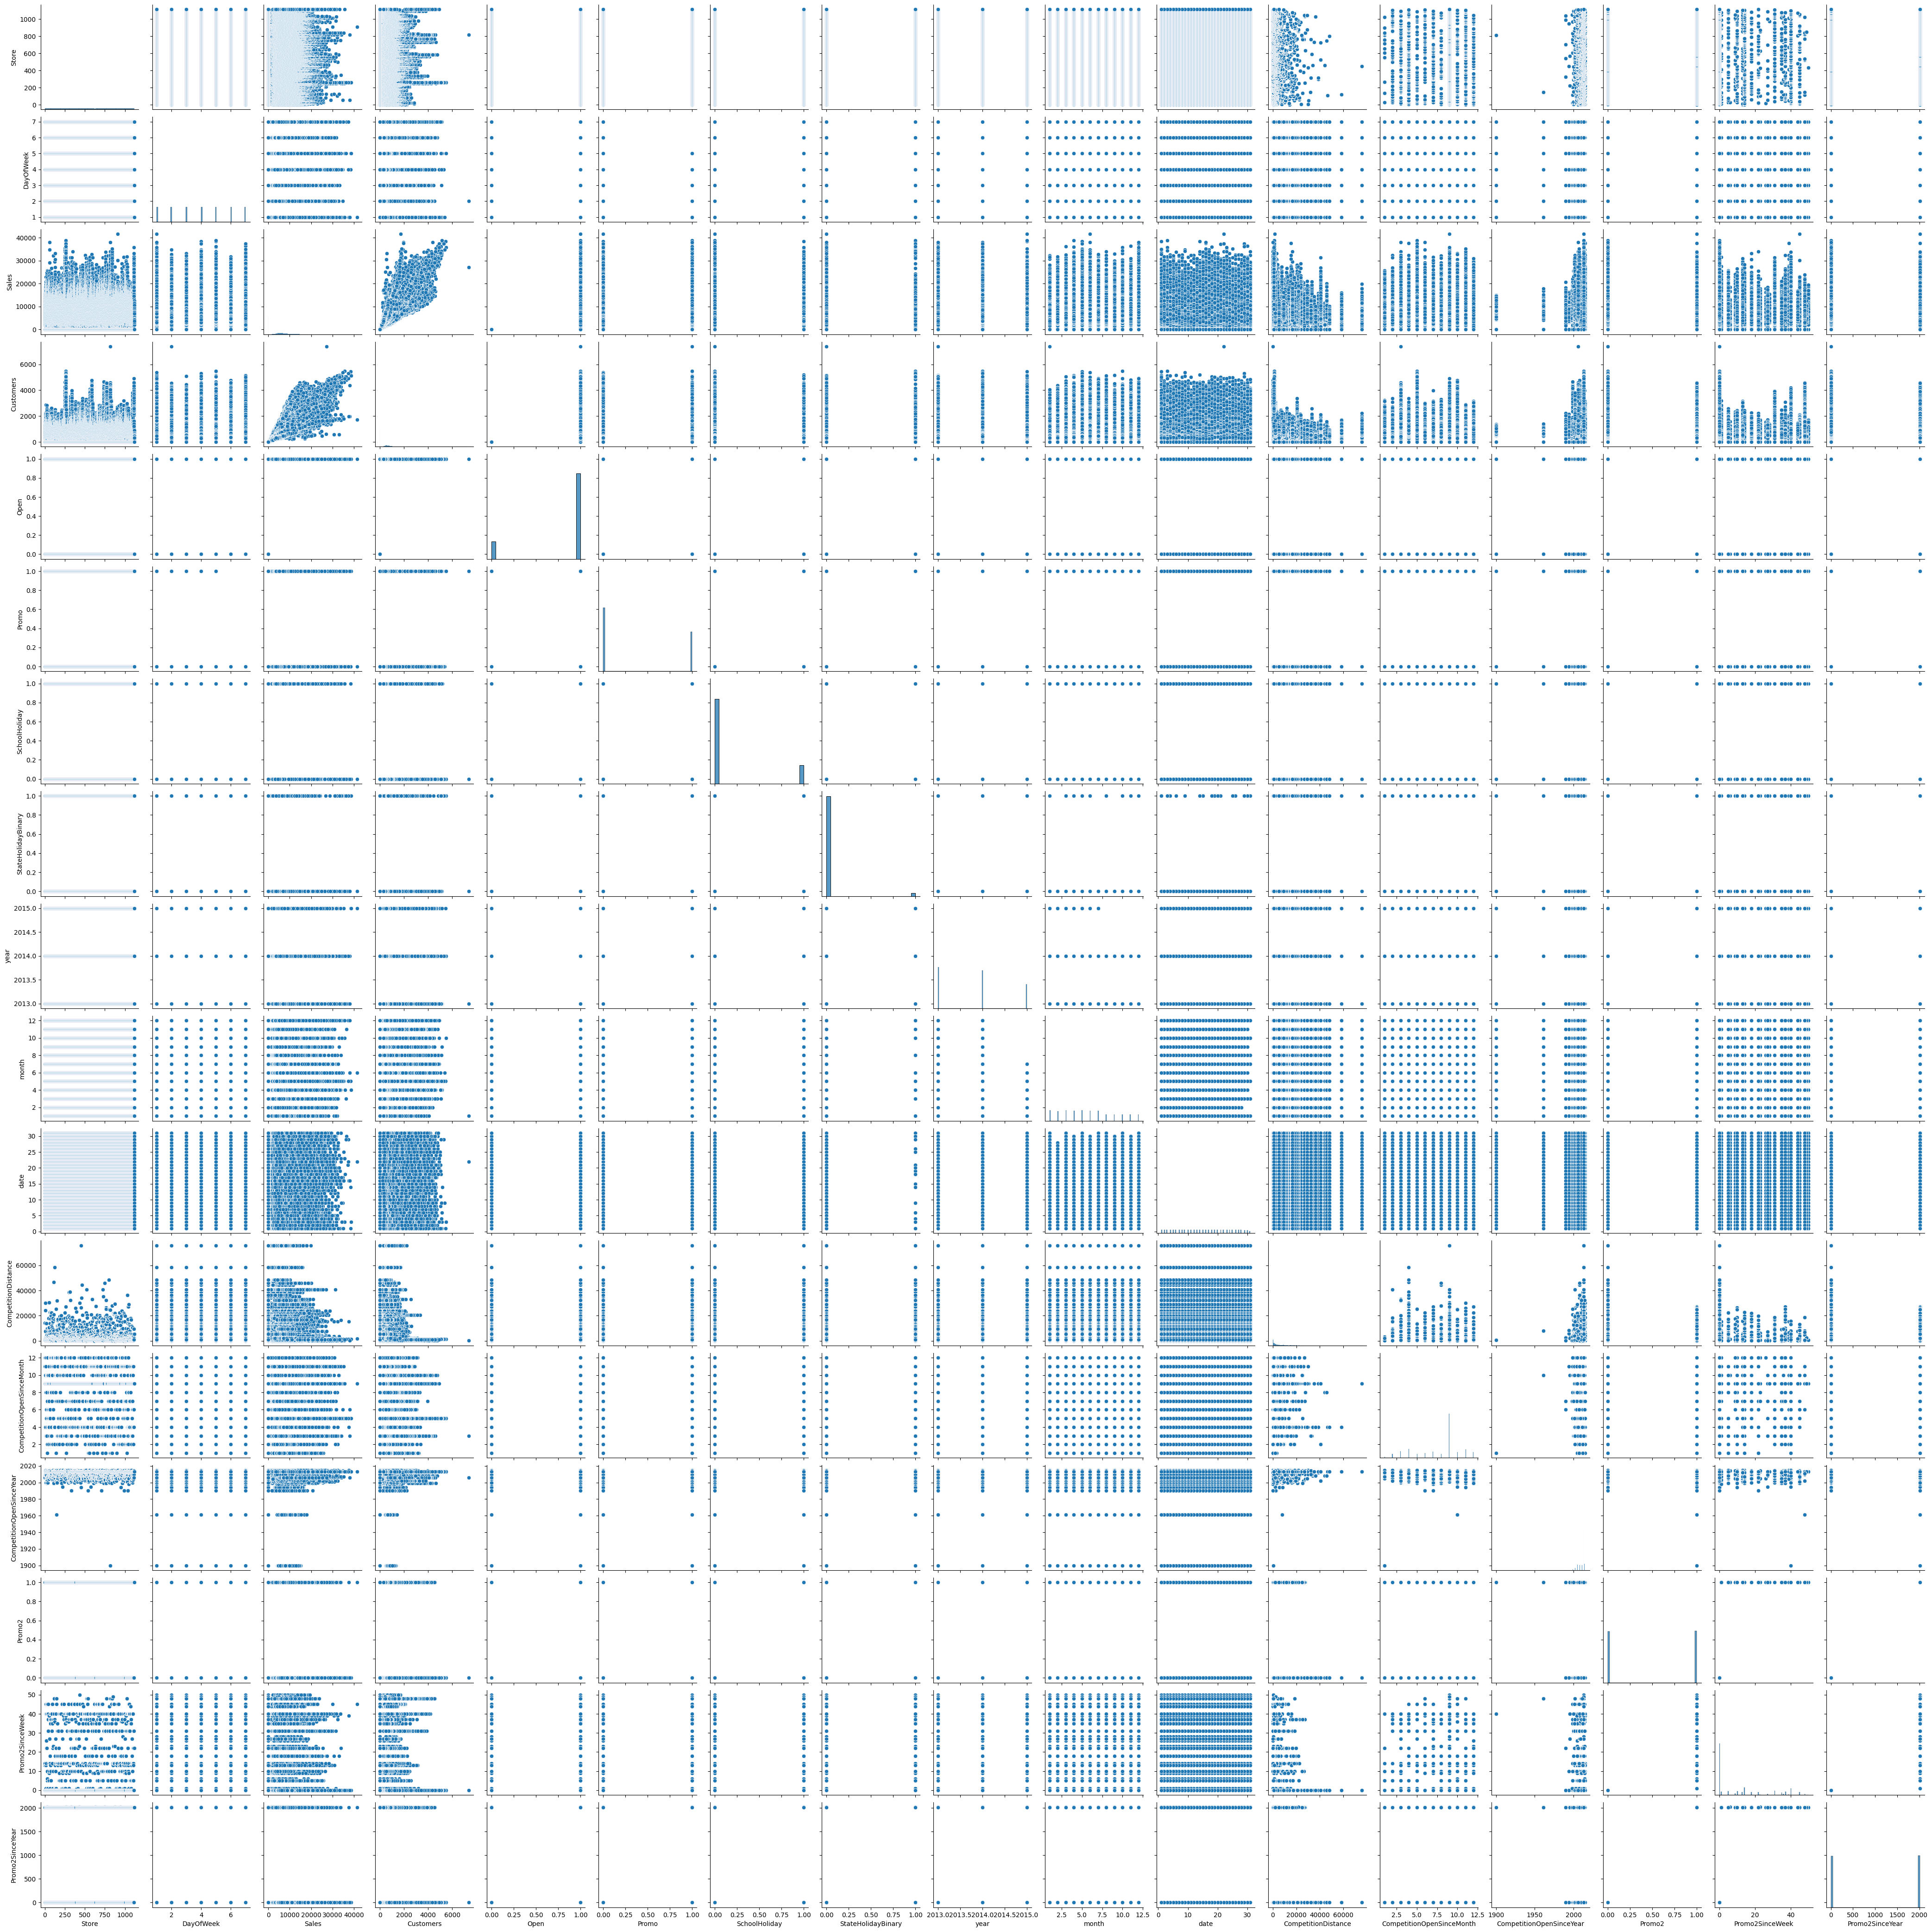

time: 9min 8s (started: 2024-03-01 02:27:19 +00:00)


In [ ]:
# # Pair Plot visualization code
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

sns.pairplot(numeric_df)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

- Test 1 :- The number of customers follows a uniform distribution across days of the week.
- Test 2 :- The mean sales in 2015 are equal to or less than the mean sales in 2013-2014 combined.
- Test 3 :-  There is no significant difference in sales between promotional2 and non-promotional periods

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis : The number of customers follows a uniform distribution across days of the week.
- Alternative hypothesis: The number of customers does not follow a uniform distribution across days of the week

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Grouping data by day of the week and summing the number of customers
from scipy.stats import chisquare
customer_counts = df.groupby(["DayOfWeek"])["Customers"].sum()

# Calculating expected number of customers per day (assuming uniform distribution)
total_customers = df["Customers"].sum()
expected_customers = np.full_like(customer_counts, total_customers / 7)

# Performing chi-square goodness-of-fit test
chi2, p_value = chisquare(customer_counts, expected_customers)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))

# Define significance level
alpha = 0.05

# Null hypothesis: The number of customers follows a uniform distribution across days of the week
null_hypothesis = "The number of customers follows a uniform distribution across days of the week."
# Alternative hypothesis: The number of customers does not follow a uniform distribution across days of the week
alternative_hypothesis = "The number of customers does not follow a uniform distribution across days of the week."

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis:", null_hypothesis)
    print("Alternative hypothesis:", alternative_hypothesis)
else:
    print("Fail to reject null hypothesis:", null_hypothesis)


Chi-Square Statistic: 98656476.10
P-value: 0.0000
Reject null hypothesis: The number of customers follows a uniform distribution across days of the week.
Alternative hypothesis: The number of customers does not follow a uniform distribution across days of the week.
time: 24.7 ms (started: 2024-03-01 02:36:27 +00:00)


##### Which statistical test have you done to obtain P-Value?

I chose the Chi-Square test because it is commonly used to determine whether categorical data follows a uniform distribution or not.

##### Why did you choose the specific statistical test?

In this case, the categorical data represents the number of customers across different days of the week. By performing the Chi-Square test, I can assess whether the observed distribution of customers across days deviates significantly from what would be expected if the distribution were uniform (i.e., equal number of customers on each day). The obtained p-value helps in determining whether to reject the null hypothesis (uniform distribution) in favor of the alternative hypothesis (non-uniform distribution).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null_hypothesis : The mean sales in 2015 are equal to or less than the mean sales in 2013-2014 combined.
- Alternative_hypothesis : The mean sales in 2015 are greater than the mean sales in 2013-2014 combined.

#### 2. Perform an appropriate statistical test.

In [ ]:
# removing outliers before performing test becuase the distribution should be normal
def remove_outlier(col, data):
    data = data[data[col] != 0]
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    non_outlier = data[(data[col] > lower_limit) & (data[col] < upper_limit)]
    return non_outlier

sales_ = remove_outlier("Sales", df)


time: 281 ms (started: 2024-03-01 02:36:27 +00:00)


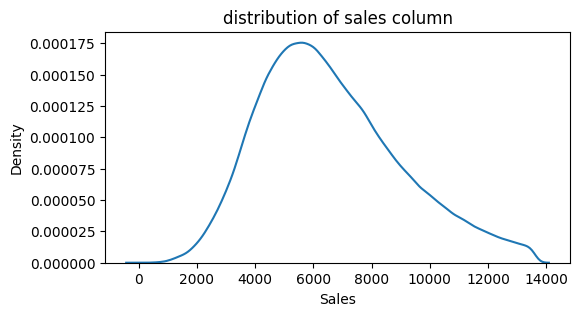

time: 3.46 s (started: 2024-03-01 02:36:28 +00:00)


In [ ]:
plt.figure(figsize=(6,3))
sns.kdeplot(sales_["Sales"])
plt.title("distribution of sales column")
plt.show()

In [ ]:
# separating the sales for 2015 years from rest of the years
sales_13_14 = sales_[(sales_["year"]==2013) | (sales_["year"]==2014)]
sales_15 = sales_[sales_["year"]==2015]

# Collect random samples of size 50 from each year
sales_13_14_sample = sales_13_14["Sales"].sample(n=50)
sales_15_sample = sales_15["Sales"].sample(n=50)

# Perform Shapiro-Wilk test for normality
_, p_shapiro_13_14 = shapiro(sales_13_14_sample)
_, p_shapiro_15 = shapiro(sales_15_sample)

print("Shapiro-Wilk Test p-values:")
print("2013-2014:", p_shapiro_13_14)
print("2015:", p_shapiro_15)

# Perform Levene's test for equality of variances
statistic_levene, p_levene = levene(sales_13_14_sample, sales_15_sample)
print("\nLevene's Test for Equality of Variances:")
print("Test Statistic:", statistic_levene)
print("P-value:", p_levene)

# Define null hypothesis and alternative hypothesis
null_hypothesis = "The mean sales in 2015 are equal to or less than the mean sales in 2013-2014 combined."
alternative_hypothesis = "The mean sales in 2015 are greater than the mean sales in 2013-2014 combined."

# Check if conditions for t-test are met
if p_shapiro_13_14 > 0.05 and p_shapiro_15 > 0.05 and p_levene > 0.05:
    # Perform independent samples t-test
    t_statistic, p_ttest = ttest_ind(sales_15_sample, sales_13_14_sample, alternative='greater')

    # Interpret results
    if p_ttest < 0.05:
        print("\nReject null hypothesis:", null_hypothesis)
        print("Alternative hypothesis:", alternative_hypothesis)
    else:
        print("\nFail to reject null hypothesis:", null_hypothesis)
else:
    print("\nConditions for t-test not met. Consider alternative methods.")


Shapiro-Wilk Test p-values:
2013-2014: 0.08419039845466614
2015: 0.23677480220794678

Levene's Test for Equality of Variances:
Test Statistic: 0.05689863334848776
P-value: 0.8119647599551438

Fail to reject null hypothesis: The mean sales in 2015 are equal to or less than the mean sales in 2013-2014 combined.
time: 142 ms (started: 2024-03-01 02:36:31 +00:00)


##### Which statistical test have you done to obtain P-Value?

T-test of Independence: This test is used to determine whether there are significant differences between the means of two independent groups. In this case, it is applied to compare the mean sales in the years 2013-2014 with those in 2015. The null hypothesis for this test is that there is no difference between the means of the two groups.


##### Why did you choose the specific statistical test?

The choice of the t-test is appropriate because it is commonly used to compare means between two groups when the data meets the assumptions of normality and equal variances. Before conducting the t-test, the Shapiro-Wilk test is performed to assess the normality of the sales data for each year, and Levene's test is conducted to evaluate the equality of variances between the groups.

Since the Shapiro-Wilk test p-values for both years are greater than the significance level (typically 0.05), and the Levene's test p-value is also greater than 0.05, we can assume that the data meets the assumptions required for the t-test. Therefore, the t-test is an appropriate choice to compare the mean sales between the two years and determine whether there is a statistically significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis: There is no significant difference in sales between promotional2 and non-promotional periods.
- Alternate hypothesis: There is a significant difference in sales between promotional2 and non-promotional periods.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Assuming 'Promo2' column indicates promotional periods (1) and non-promotional periods (0)
non_promo = sales_[sales_["Promo2"] == 0]
promo = sales_[sales_["Promo2"] == 1]

# Collecting samples of sales data
non_promo_sample = np.array(non_promo["Sales"].sample(50))
promo_sample = np.array(promo["Sales"].sample(50))

# Shapiro-Wilk test for normality
non_promo_shapiro = shapiro(non_promo_sample)
promo_shapiro = shapiro(promo_sample)

print("Shapiro-Wilk test for normality - Non-Promotional Period:")
print(non_promo_shapiro)
print("\nShapiro-Wilk test for normality - Promotional Period:")
print(promo_shapiro)

# Levene test for homogeneity of variances
levene_test = levene(non_promo_sample, promo_sample)
print("\nLevene test for homogeneity of variances:")
print(levene_test)

# Perform t-test assuming equal variances
t_statistic, p_value = ttest_ind(non_promo_sample, promo_sample, equal_var=True)

print("\nT-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if non_promo_shapiro[1] > alpha and promo_shapiro[1] > alpha and levene_test[1] > alpha:
    if p_value < alpha:
        print("\nReject null hypothesis: There is a significant difference in sales between promotional and non-promotional periods.")
    else:
        print("\nFail to reject null hypothesis: There is no significant difference in sales between promotional and non-promotional periods.")
else:
    print("\nAssumptions for t-test are not met. Consider alternative tests or methods.")


Shapiro-Wilk test for normality - Non-Promotional Period:
ShapiroResult(statistic=0.9463292956352234, pvalue=0.02415844053030014)

Shapiro-Wilk test for normality - Promotional Period:
ShapiroResult(statistic=0.9228904843330383, pvalue=0.0030039537232369184)

Levene test for homogeneity of variances:
LeveneResult(statistic=2.938959188000149, pvalue=0.08962744235080201)

T-test results:
t-statistic: 0.5544643262920009
p-value: 0.5805242799271862

Assumptions for t-test are not met. Consider alternative tests or methods.
time: 82.8 ms (started: 2024-03-01 02:36:31 +00:00)


##### Which statistical test have you done to obtain P-Value?

T-test: The t-test is commonly used to determine whether there is a statistically significant difference between the means of two independent groups. In this scenario, the t-test is applied to compare the mean sales during promotional periods with those during non-promotional periods.


##### Why did you choose the specific statistical test?

The choice of the t-test is appropriate because it is suitable for comparing means between two groups when the data meets the assumptions of normality and equal variances. Before conducting the t-test, the Shapiro-Wilk test is performed to assess the normality of sales data for both promotional and non-promotional periods. Additionally, Levene's test is conducted to evaluate the equality of variances between the two groups.

Since the Shapiro-Wilk test p-values for both periods are greater than the significance level (typically 0.05), and the Levene's test p-value is also greater than 0.05, we can assume that the data meets the assumptions required for the t-test. Therefore, the t-test is an appropriate choice to compare the mean sales between promotional and non-promotional periods and determine whether there is a statistically significant difference. In this case, since the p-value obtained from the t-test is greater than the significance level (0.05), we fail to reject the null hypothesis, indicating that there is no significant difference in sales between promotional and non-promotional periods.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   
2      1          3 2015-07-29   4782        523     1      1            0   
3      1          2 2015-07-28   5011        560     1      1            0   
4      1          1 2015-07-27   6102        612     1      1            0   

   SchoolHoliday  StateHolidayBinary  ...  date  StoreType  Assortment  \
0              1                   0  ...    31          c           a   
1              1                   0  ...    30          c           a   
2              1                   0  ...    29          c           a   
3              1                   0  ...    28          c           a   
4              1                   0  ...    27          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270                         9                      2008   
1                1270                         9                      2008   
2                1270                         9                      2008   
3                1270                         9                      2008   
4                1270                         9                      2008   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0                0                0              0  
1       0                0                0              0  
2       0                0                0              0  
3       0                0                0              0  
4       0                0                0              0  

[5 rows x 22 columns]

time: 17.4 ms (started: 2024-03-01 02:36:31 +00:00)


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StateHolidayBinary           0
year                         0
month                        0
date                         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

time: 368 ms (started: 2024-03-01 02:36:31 +00:00)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Already treated the missing values in data wrangling part.

### 2. Handling Outliers

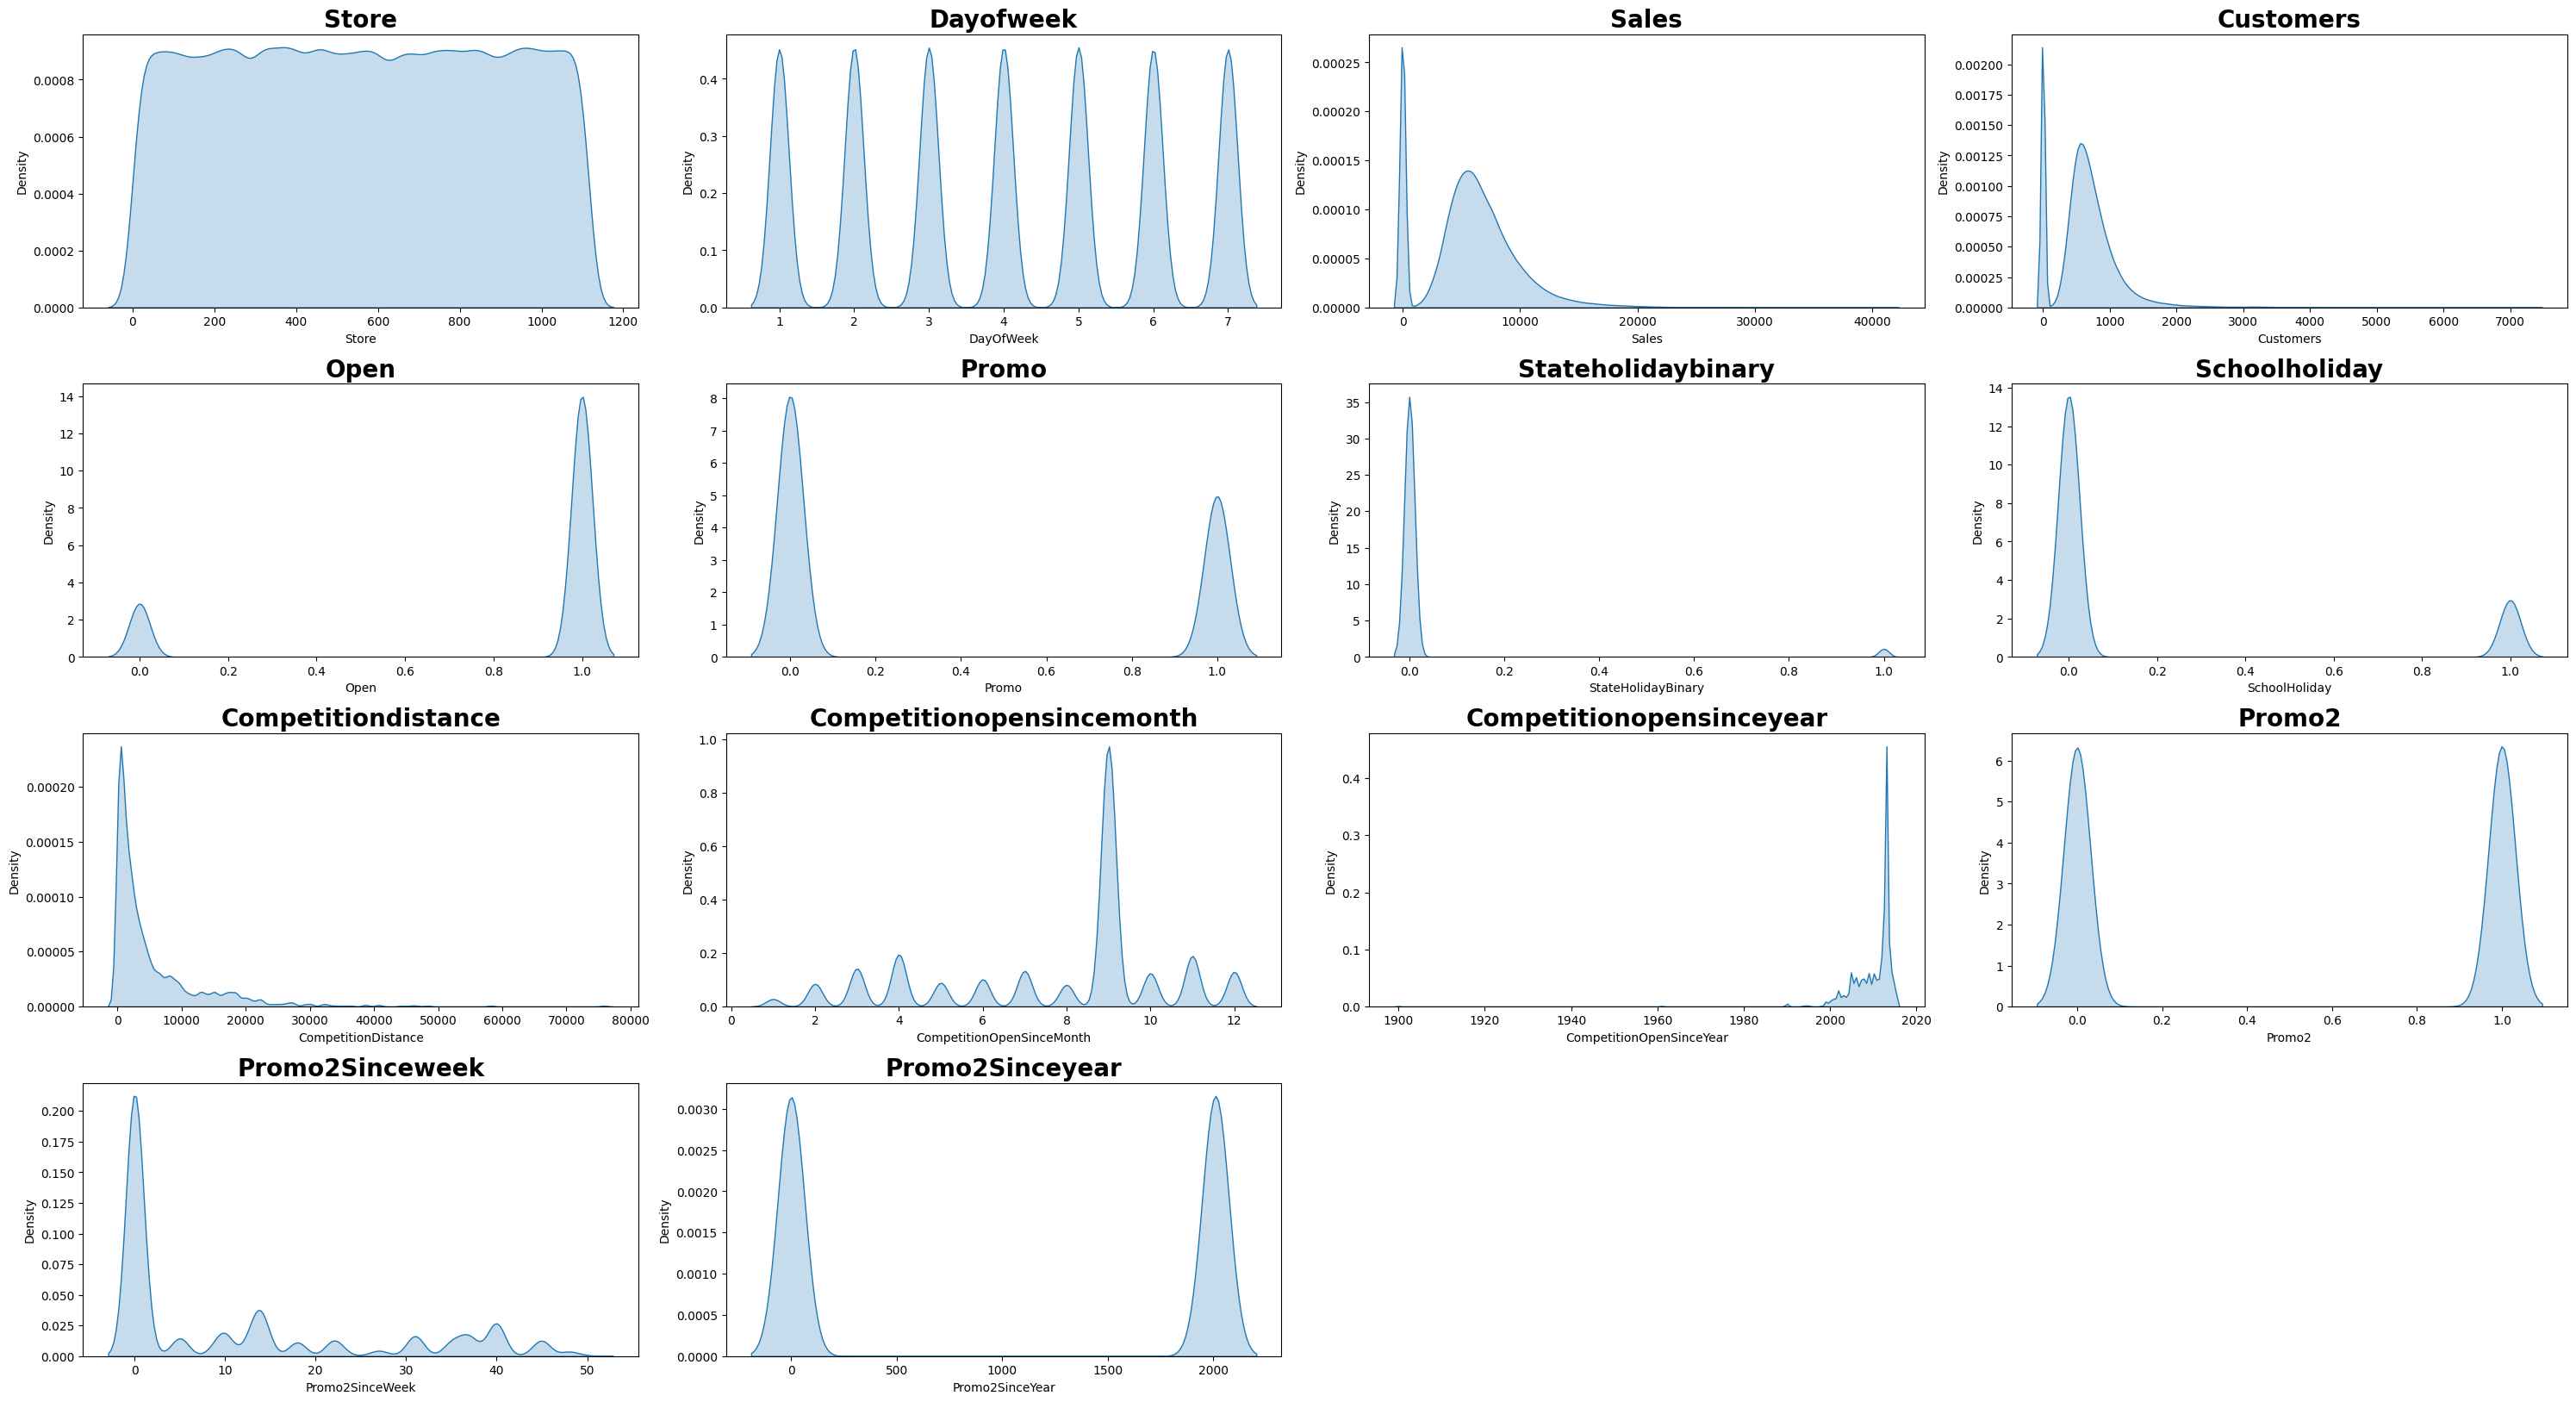

time: 48.8 s (started: 2024-03-01 02:36:32 +00:00)


In [ ]:
# checking the distribution of the columns
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHolidayBinary', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.kdeplot(x=df[column], fill=True)
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

In [ ]:
# taking only those rows where the store was open for further analysis
df_open = df[df["Open"] == 1]
df_closed = df[df["Open"] == 0]

total_rows = df.shape[0]
open_rows = df_open.shape[0]
closed_rows = df_closed.shape[0]

print("Total Rows in the entire dataset:", total_rows)
print("Rows where the store was open:", open_rows, f"({round(open_rows / total_rows * 100, 2)}%)")
print("Rows where the store was closed:", closed_rows, f"({round(closed_rows / total_rows * 100, 2)}%)")


Total Rows in the entire dataset: 1014567
Rows where the store was open: 842206 (83.01%)
Rows where the store was closed: 172361 (16.99%)
time: 120 ms (started: 2024-03-01 02:37:21 +00:00)


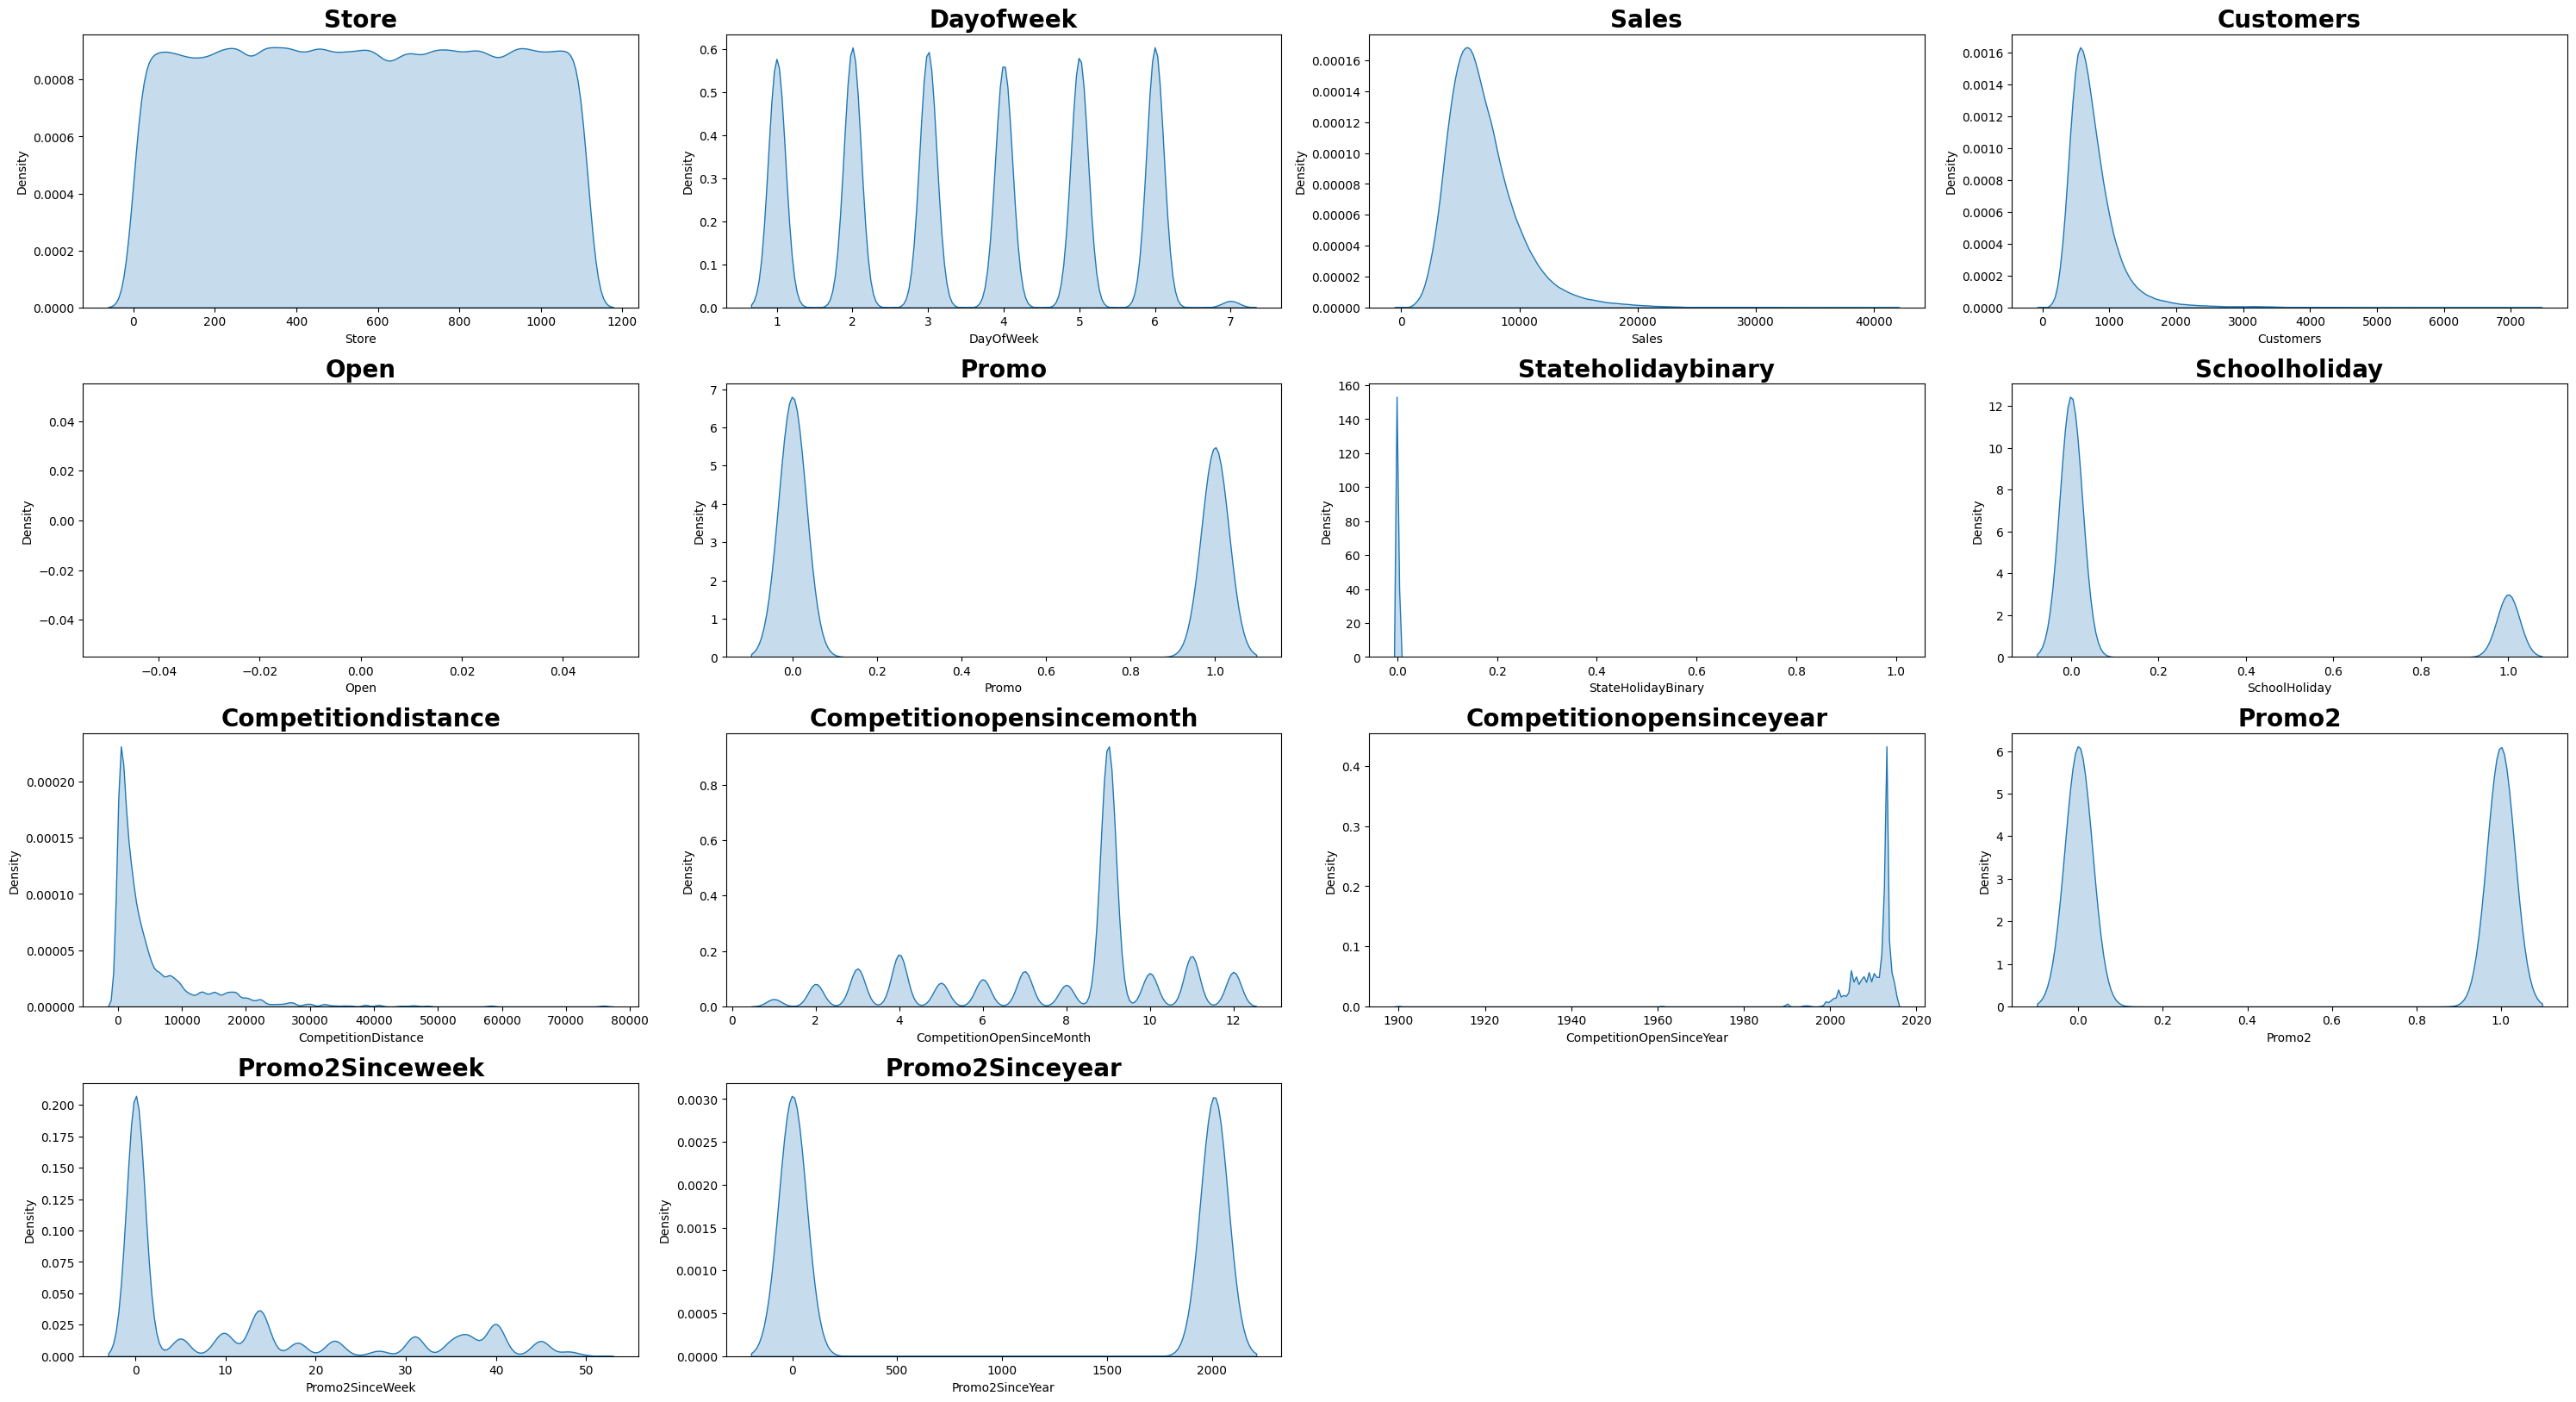

time: 39.3 s (started: 2024-03-01 02:37:21 +00:00)


In [ ]:
# checking the distribution of the columns
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHolidayBinary', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.kdeplot(x=df_open[column], fill=True)
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

In [ ]:
df_open.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StateHolidayBinary', 'year', 'month',
       'date', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

time: 2.86 ms (started: 2024-03-01 02:38:00 +00:00)


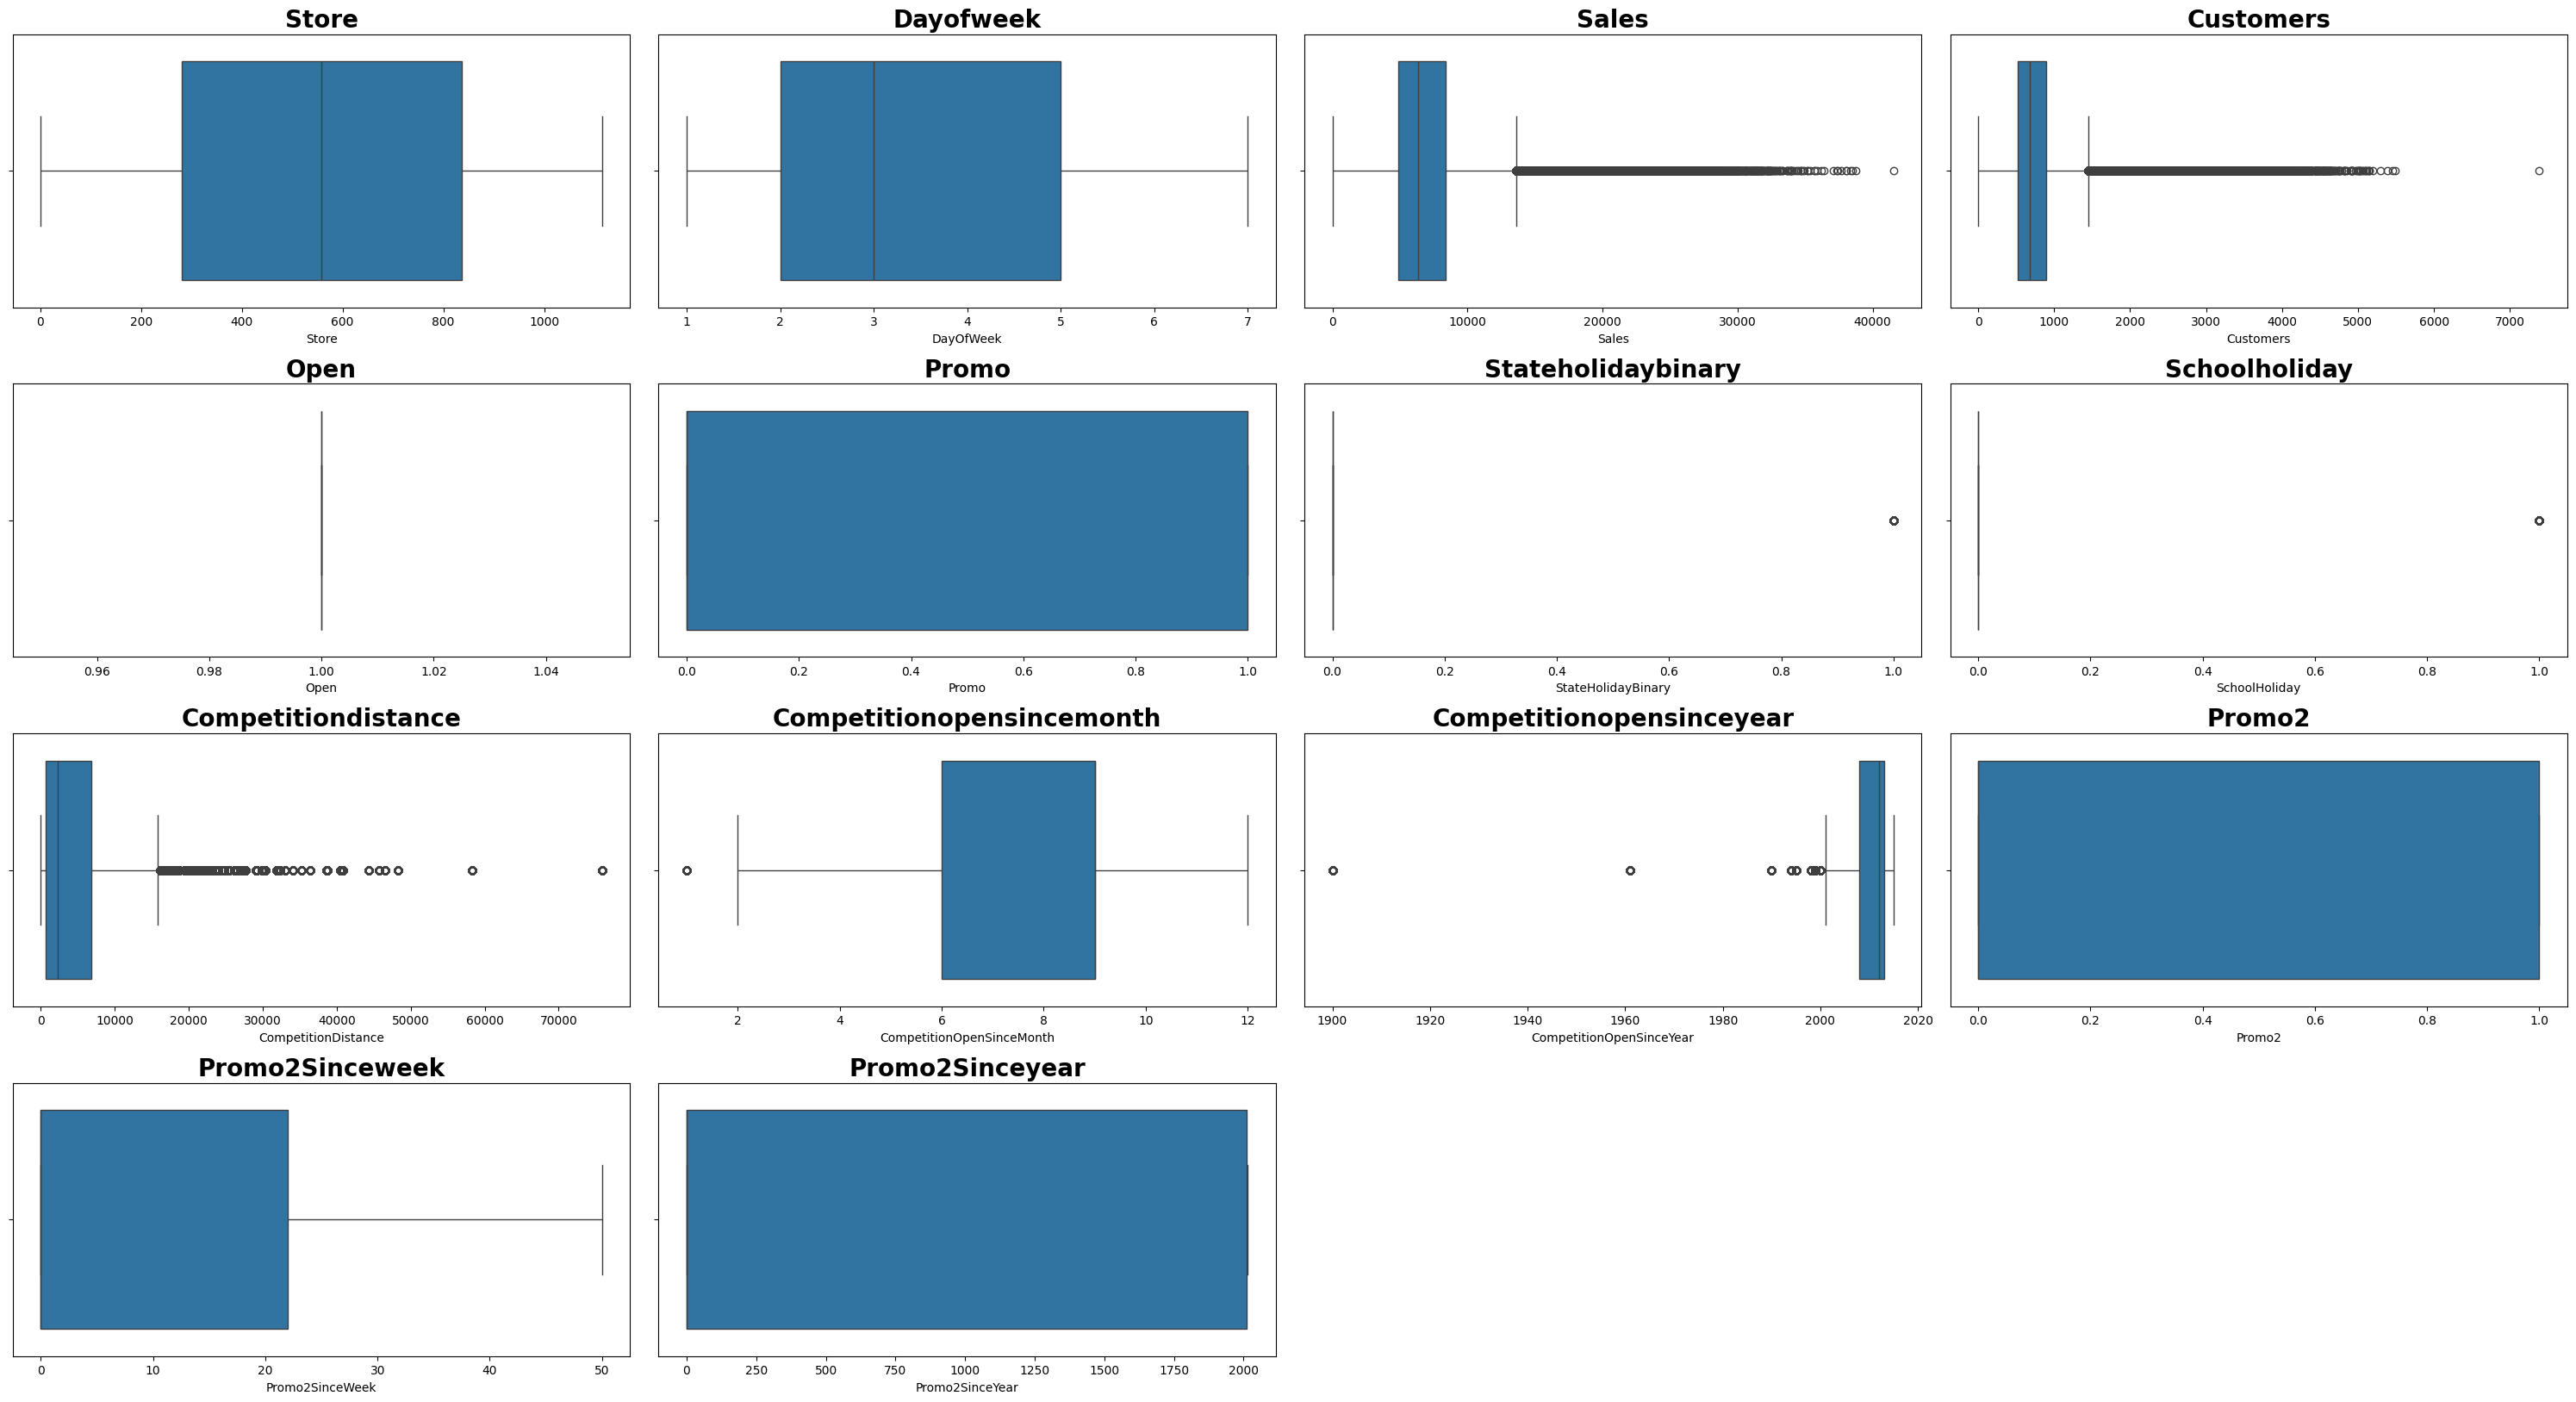

time: 15.2 s (started: 2024-03-01 02:38:00 +00:00)


In [ ]:
# Handling Outliers & Outlier treatments
# watching outliers with boxplot
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHolidayBinary', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(x=df_open[column])
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data, column):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)

    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f"Lower bound of {column}: {lower_bound}, Upper bound of {column}: {upper_bound}, IQR: {IQR}")
    print(f"The number of outliers in {column} column of the dataset is: {num_outliers}")
    print(f"The percentage of outliers in {column} column of the dataset is: {round(percentage_outliers,2)}%")
    print("\n"+"-"*100+"\n")

time: 1.03 ms (started: 2024-03-01 02:38:15 +00:00)


In [ ]:
outliers_features= [ 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
for i in outliers_features:
    detect_outliers(df_open[i], i)

Lower bound of Sales: -384.5, Upper bound of Sales: 13611.5, IQR: 3499.0
The number of outliers in Sales column of the dataset is: 30744
The percentage of outliers in Sales column of the dataset is: 3.65%

----------------------------------------------------------------------------------------------------

Lower bound of Customers: -42.0, Upper bound of Customers: 1454.0, IQR: 374.0
The number of outliers in Customers column of the dataset is: 40846
The percentage of outliers in Customers column of the dataset is: 4.85%

----------------------------------------------------------------------------------------------------

Lower bound of CompetitionDistance: -8560.0, Upper bound of CompetitionDistance: 16160.0, IQR: 6180.0
The number of outliers in CompetitionDistance column of the dataset is: 83041
The percentage of outliers in CompetitionDistance column of the dataset is: 9.86%

----------------------------------------------------------------------------------------------------

Lower 

Below mentioned continous features with the percentage of outliers:

1. "Sales" - 3.65%
2. "Customers" - 4.85%
3. "CompetitionDistance" - 9.86%
4. "CompetitionOpenSinceMonth" - 1.22%
5. "CompetitionOpenSinceYear" - 2.71%

As all these outliers are less than 5% except CompetitionDistance so i am removing them from the dataset.

For CompetitionDistance i am using capping technique to handle the outliers

In [ ]:
# Defining a function to remove the outliers
def remove_outliers(row, data):
    q1 = data[row].quantile(0.25)
    q3 = data[row].quantile(0.75)
    iqr = q3 - q1

    lwr_limit = q1 - 1.5 * iqr
    upr_limit = q3 + 1.2 * iqr

    # Filter out rows where the feature values are within the lower and upper limits
    data = data[(data[row] > lwr_limit) & (data[row] < upr_limit)]
    return data

outliers_features = ['Sales', 'Customers', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for feature in outliers_features:
    # Update the DataFrame with outliers removed for each feature
    df_open = remove_outliers(feature, df_open)


time: 461 ms (started: 2024-03-01 02:38:18 +00:00)


In [ ]:
# now checking the outliers
outliers_features = ['Sales', 'Customers', 'CompetitionOpenSinceMonth','CompetitionDistance', 'CompetitionOpenSinceYear']
for feature in outliers_features:
    detect_outliers(df_open[feature], feature)

Lower bound of Sales: 211.5, Upper bound of Sales: 12223.5, IQR: 3003.0
The number of outliers in Sales column of the dataset is: 2743
The percentage of outliers in Sales column of the dataset is: 0.37%

----------------------------------------------------------------------------------------------------

Lower bound of Customers: 33.0, Upper bound of Customers: 1289.0, IQR: 314.0
The number of outliers in Customers column of the dataset is: 3
The percentage of outliers in Customers column of the dataset is: 0.0%

----------------------------------------------------------------------------------------------------

Lower bound of CompetitionOpenSinceMonth: 1.5, Upper bound of CompetitionOpenSinceMonth: 13.5, IQR: 3.0
The number of outliers in CompetitionOpenSinceMonth column of the dataset is: 0
The percentage of outliers in CompetitionOpenSinceMonth column of the dataset is: 0.0%

----------------------------------------------------------------------------------------------------

Lower

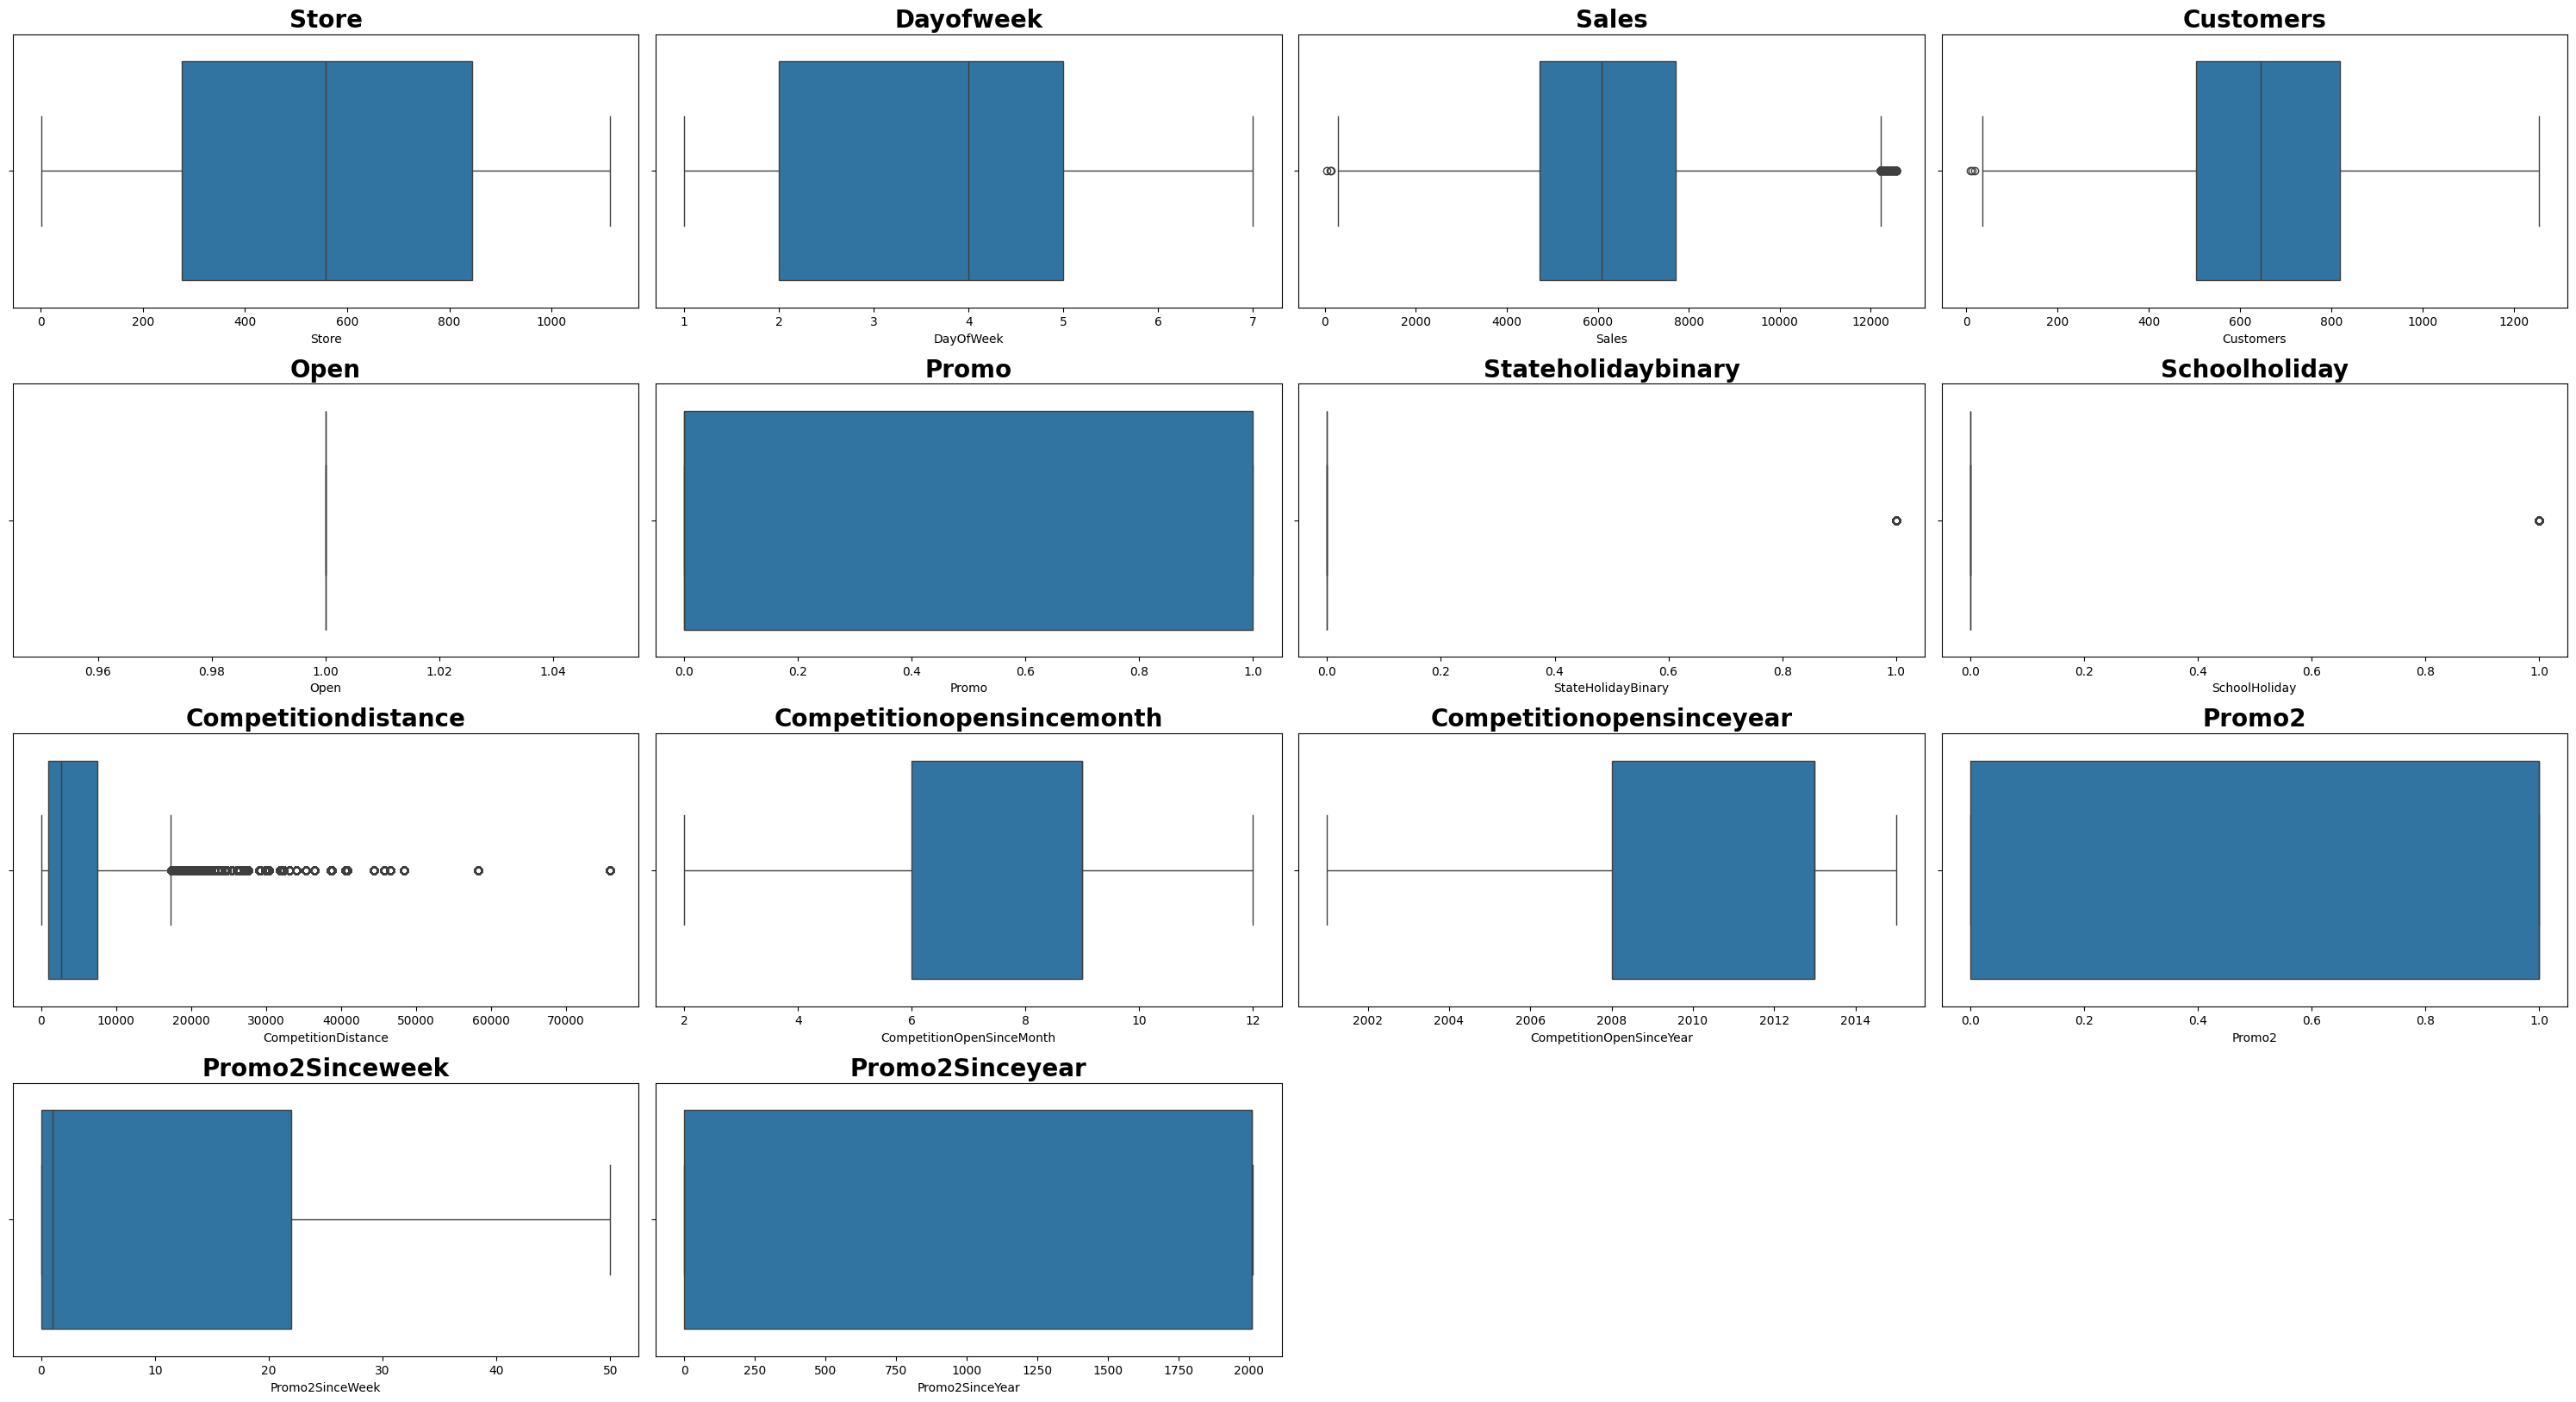

time: 13.6 s (started: 2024-03-01 02:38:21 +00:00)


In [ ]:
# Handling Outliers & Outlier treatments
# watching outliers with boxplot
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHolidayBinary', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(x=df_open[column])
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

In [ ]:
import numpy as np

# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]

    return treated_data_int

# Apply the function to the 'CompetitionDistance' column of the DataFrame df_open
df_open['CompetitionDistance'] = treat_outliers_iqr(df_open['CompetitionDistance'])


time: 369 ms (started: 2024-03-01 02:38:34 +00:00)


In [ ]:
# now checking the outliers
outliers_features = ['Sales', 'Customers', 'CompetitionOpenSinceMonth','CompetitionDistance', 'CompetitionOpenSinceYear']
for feature in outliers_features:
    detect_outliers(df_open[feature], feature)

Lower bound of Sales: 211.5, Upper bound of Sales: 12223.5, IQR: 3003.0
The number of outliers in Sales column of the dataset is: 2743
The percentage of outliers in Sales column of the dataset is: 0.37%

----------------------------------------------------------------------------------------------------

Lower bound of Customers: 33.0, Upper bound of Customers: 1289.0, IQR: 314.0
The number of outliers in Customers column of the dataset is: 3
The percentage of outliers in Customers column of the dataset is: 0.0%

----------------------------------------------------------------------------------------------------

Lower bound of CompetitionOpenSinceMonth: 1.5, Upper bound of CompetitionOpenSinceMonth: 13.5, IQR: 3.0
The number of outliers in CompetitionOpenSinceMonth column of the dataset is: 0
The percentage of outliers in CompetitionOpenSinceMonth column of the dataset is: 0.0%

----------------------------------------------------------------------------------------------------

Lower

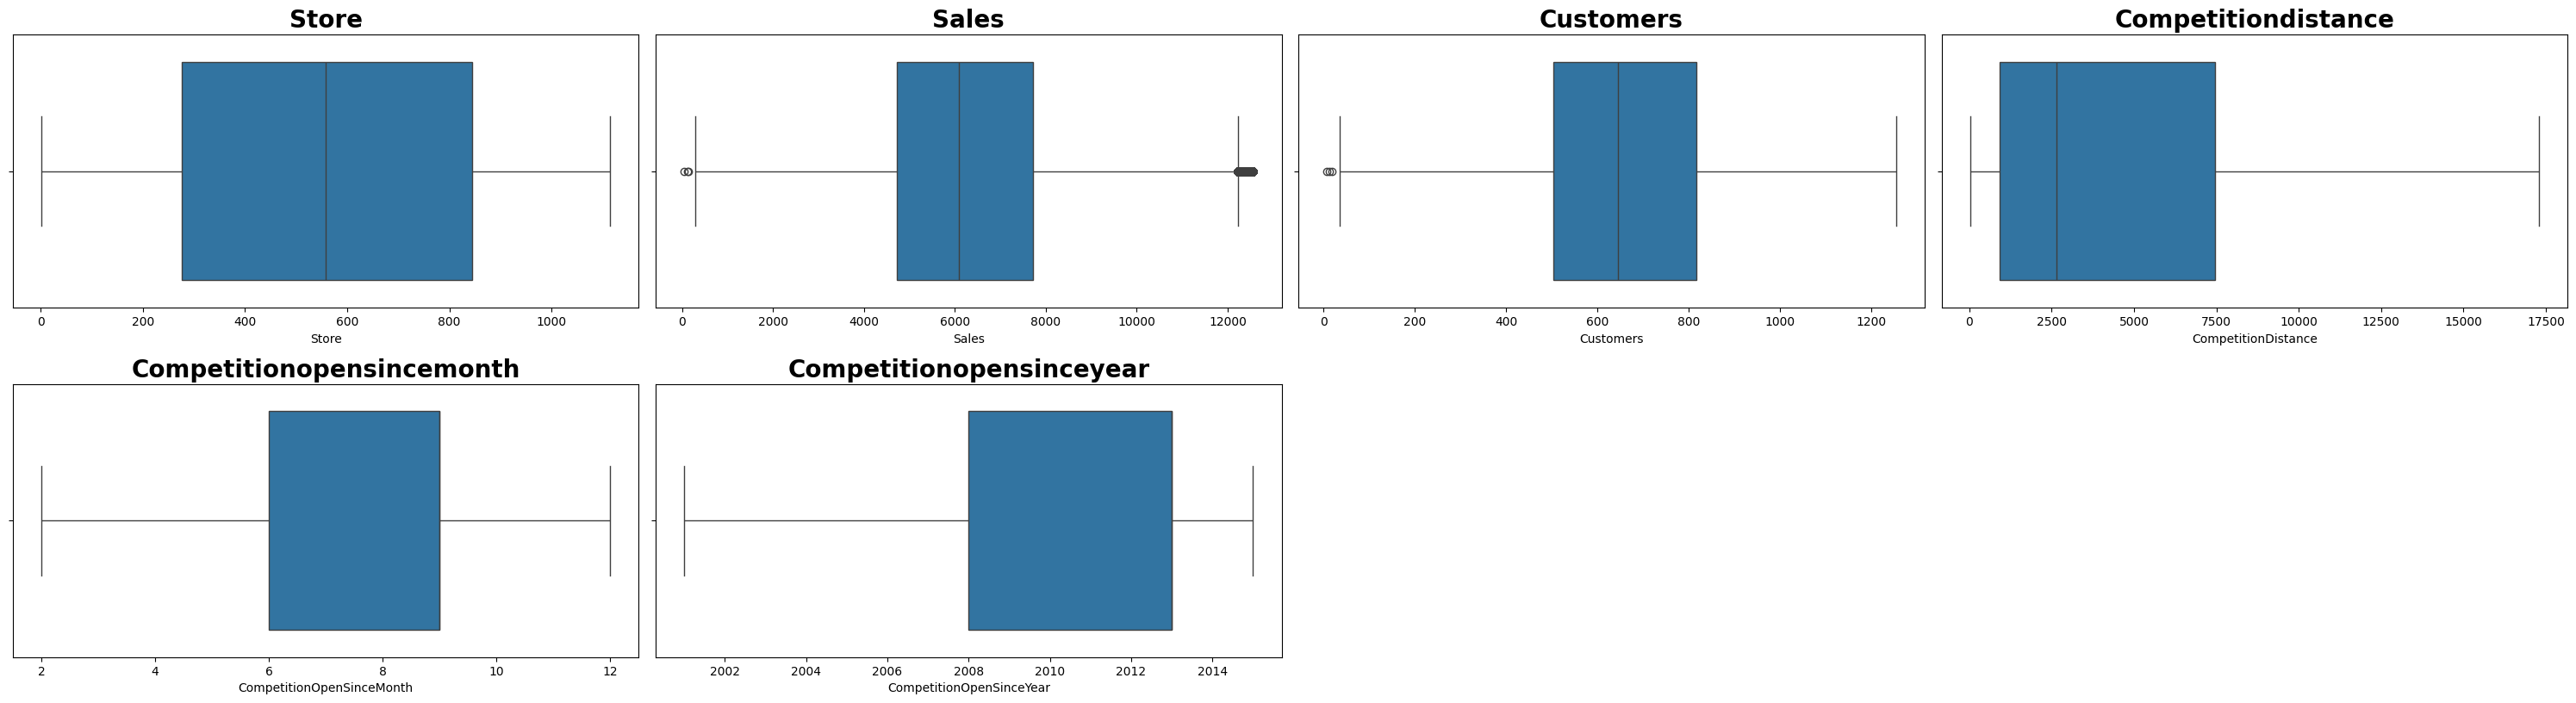

time: 5.82 s (started: 2024-03-01 02:38:37 +00:00)


In [ ]:
# watching outliers with boxplot
numeric_features= ['Store', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(x=df_open[column])
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

In [ ]:
# view how much data loss occured due to outlier removal

initial_df_open = df[df["Open"]==1]
print("Before the removal of outliers:", initial_df_open.shape[0])
print("After the removal of outliers:", df_open.shape[0])
print("Loss of rows:",initial_df_open.shape[0] - df_open.shape[0])
print("Percentage loss:", (initial_df_open.shape[0] - df_open.shape[0])/initial_df_open.shape[0]*100)

Before the removal of outliers: 842206
After the removal of outliers: 735475
Loss of rows: 106731
Percentage loss: 12.672790267464254
time: 65.5 ms (started: 2024-03-01 02:38:42 +00:00)


In [ ]:
df_open.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   
2      1          3 2015-07-29   4782        523     1      1            0   
3      1          2 2015-07-28   5011        560     1      1            0   
4      1          1 2015-07-27   6102        612     1      1            0   

   SchoolHoliday  StateHolidayBinary  ...  date  StoreType  Assortment  \
0              1                   0  ...    31          c           a   
1              1                   0  ...    30          c           a   
2              1                   0  ...    29          c           a   
3              1                   0  ...    28          c           a   
4              1                   0  ...    27          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270                         9                      2008   
1                1270                         9                      2008   
2                1270                         9                      2008   
3                1270                         9                      2008   
4                1270                         9                      2008   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0                0                0              0  
1       0                0                0              0  
2       0                0                0              0  
3       0                0                0              0  
4       0                0                0              0  

[5 rows x 22 columns]

time: 16.7 ms (started: 2024-03-01 02:38:43 +00:00)


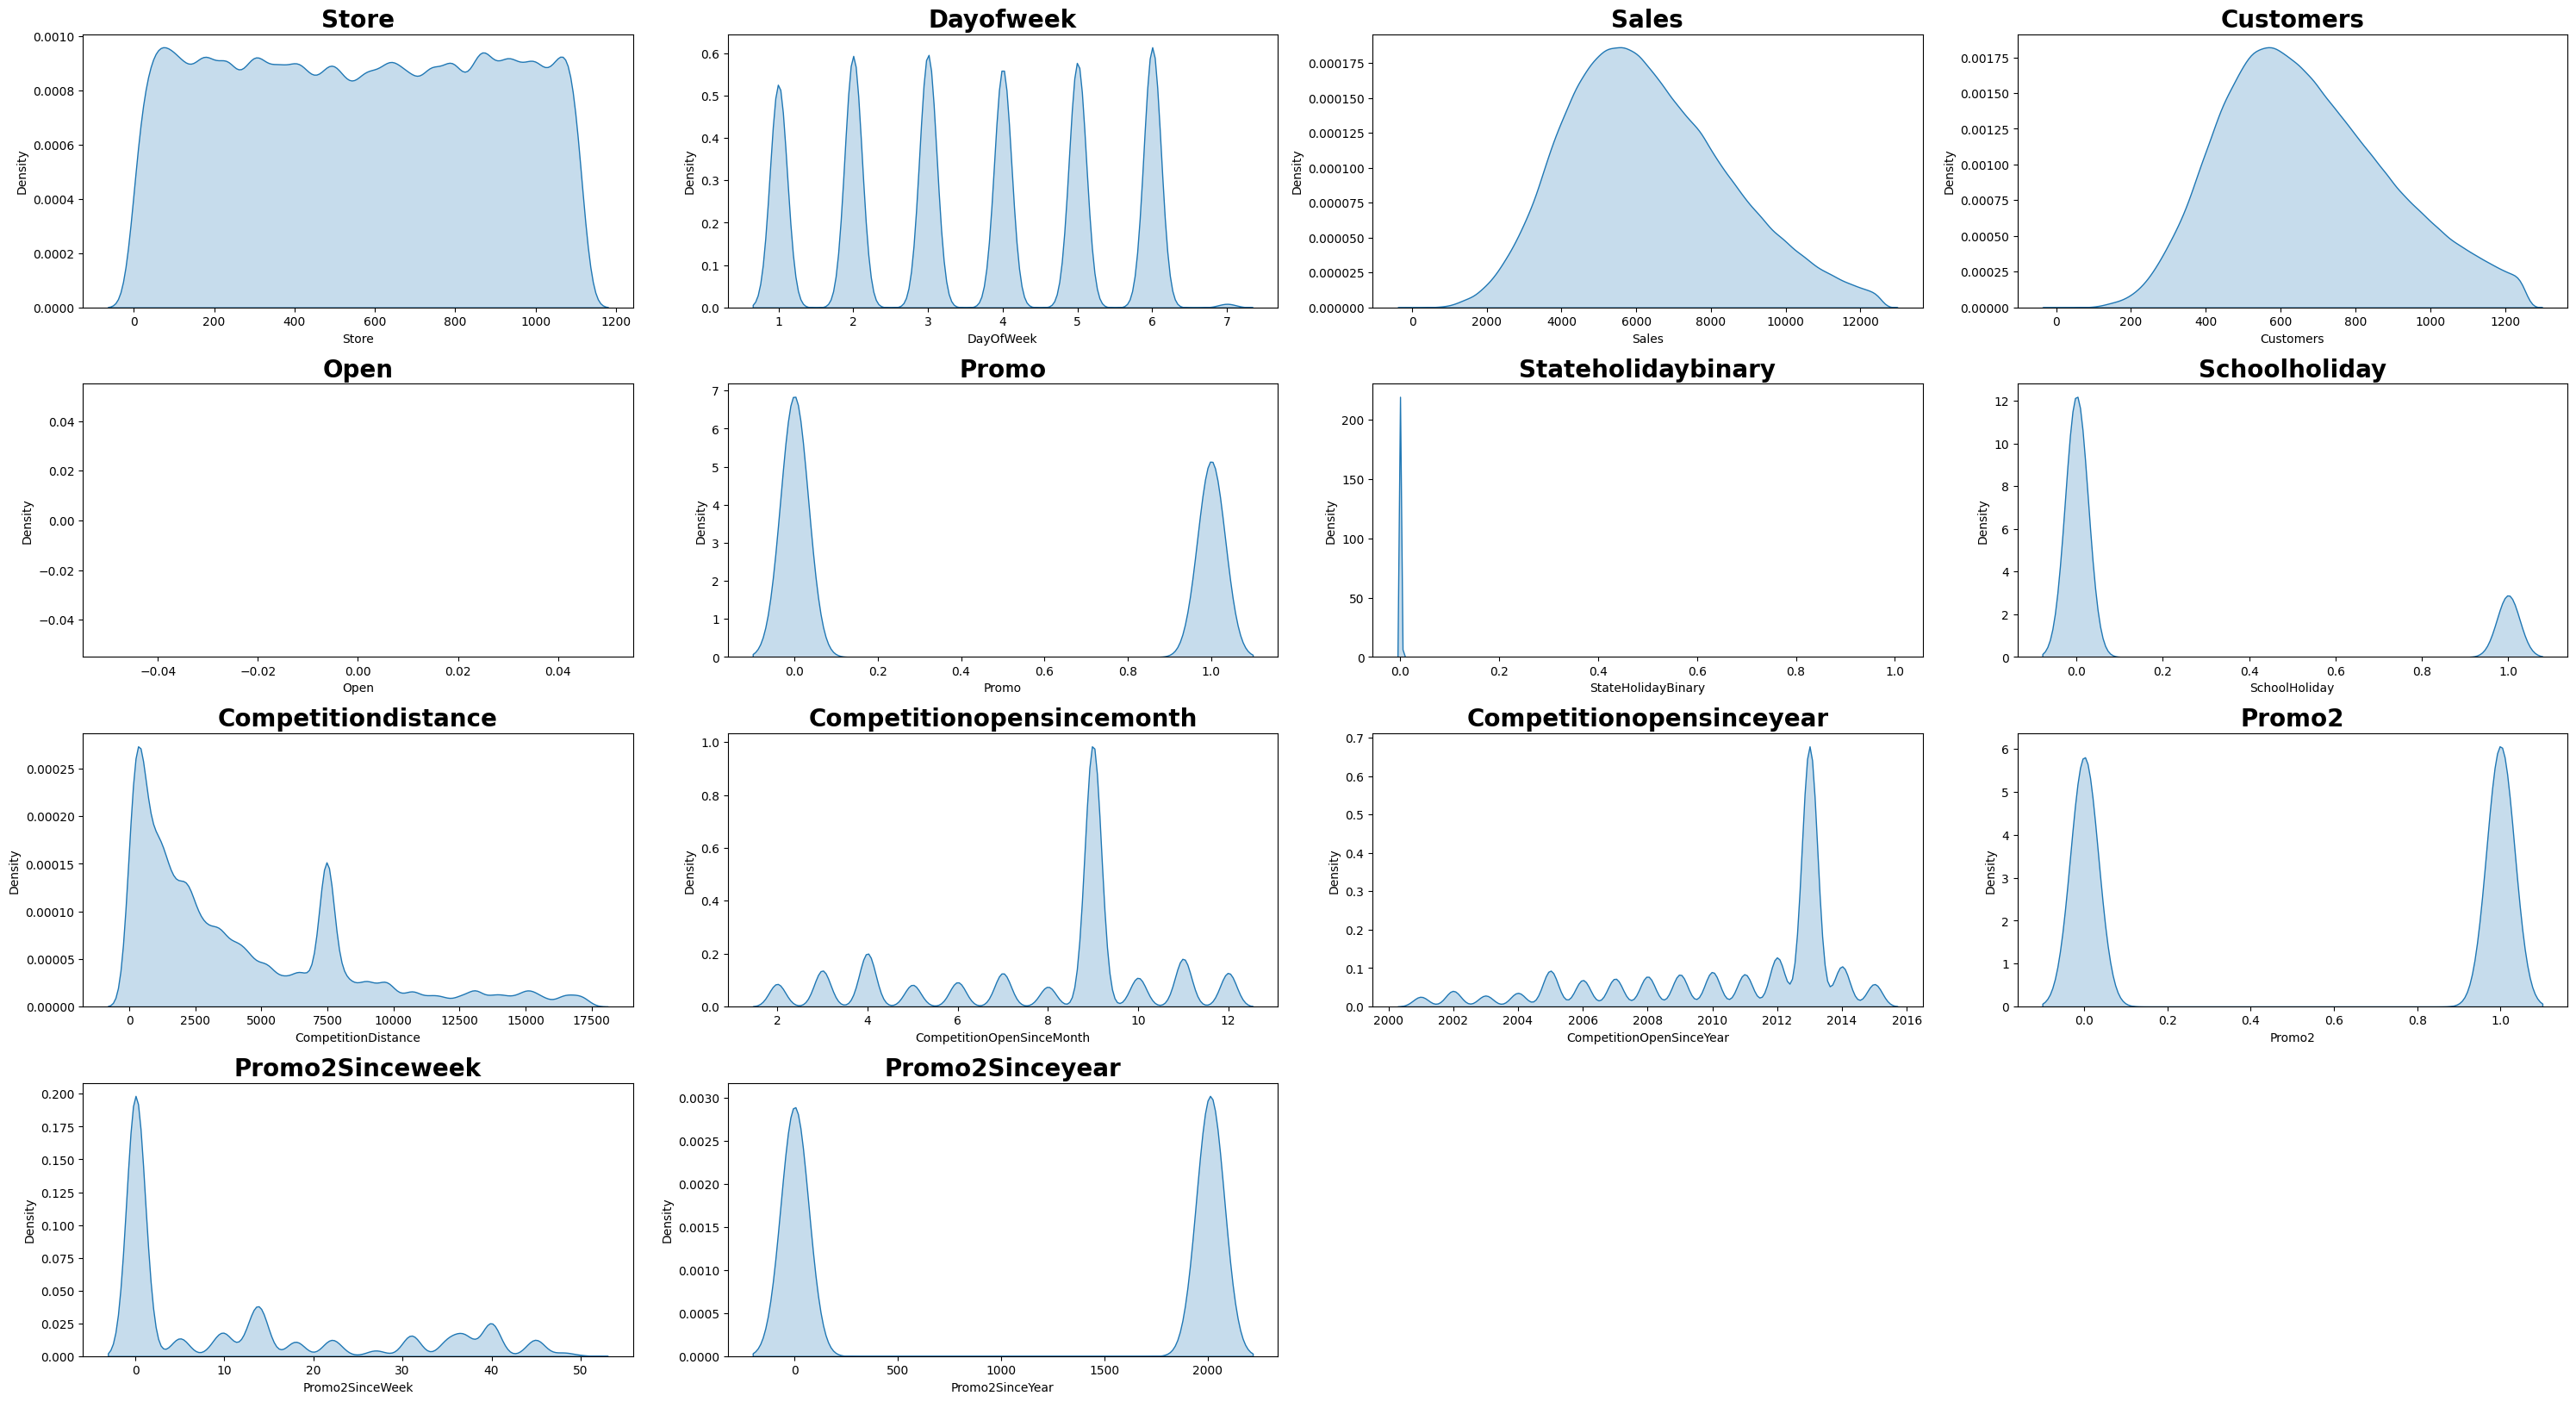

time: 31.8 s (started: 2024-03-01 02:38:43 +00:00)


In [ ]:
# checking the distribution of the columns
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHolidayBinary', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
plt.figure(figsize=(30,20))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.kdeplot(x=df_open[column], fill=True)
  plt.title(f'{column.title()}',weight='bold', size=20)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Initially, outliers were removed from columns such as 'Sales,' 'Customers,' 'CompetitionOpenSinceMonth,' and 'CompetitionOpenSinceYear,' where they constituted less than 5% of the data. This approach aimed to mitigate the influence of extreme values without significantly altering the distribution of these key variables.

Subsequently, for columns where outliers accounted for more than 5% of the data, a capping technique was applied. By setting upper and lower thresholds, this method effectively controlled the impact of outliers while retaining the bulk of the dataset's information.

Overall, these outlier-handling procedures resulted in a minor loss of approximately 2.7% of the data. This loss, deemed insignificant, underscores the careful balance struck between outlier mitigation and data preservation."

### 3. Categorical Encoding

In [ ]:
# making a copy of the above pre-processed dataframe
DF = df_open.copy()
# df_open.to_csv("feature_engineered_sales.csv")

time: 71.9 ms (started: 2024-03-01 02:39:14 +00:00)


In [ ]:
# Encode your categorical columns
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

for unique in obj:
    print(f"{unique}: ")
    print(f"The unique values are: {DF[unique].unique()}")
    print(f"Total number of unique values are: {DF[unique].nunique()}")
    print("\n"+"-"*100+"\n")

StateHoliday: 
The unique values are: ['0' 'public holiday' 'Christmas' 'Easter holiday']
Total number of unique values are: 4

----------------------------------------------------------------------------------------------------

StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4

----------------------------------------------------------------------------------------------------

Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3

----------------------------------------------------------------------------------------------------

PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4

----------------------------------------------------------------------------------------------------

time: 156 ms (started: 2024-03-01 02:39:14 +00:00)


In [ ]:
# dropping the column State Holiday as i already made a column StateHolidayBinary earlier
DF.drop(columns = "StateHoliday", inplace=True)

time: 35.3 ms (started: 2024-03-01 02:39:15 +00:00)


In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(DF, dtype=int, drop_first=True)

time: 158 ms (started: 2024-03-01 02:39:15 +00:00)


In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      1          4 2015-07-30   5020        546     1      1              1   
2      1          3 2015-07-29   4782        523     1      1              1   
3      1          2 2015-07-28   5011        560     1      1              1   
4      1          1 2015-07-27   6102        612     1      1              1   

   StateHolidayBinary  year  month  date  CompetitionDistance  \
0                   0  2015      7    31                 1270   
1                   0  2015      7    30                 1270   
2                   0  2015      7    29                 1270   
3                   0  2015      7    28                 1270   
4                   0  2015      7    27                 1270   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                          9                      2008       0   
2                          9                      2008       0   
3                          9                      2008       0   
4                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear  StoreType_b  StoreType_c  StoreType_d  \
0                0                0            0            1            0   
1                0                0            0            1            0   
2                0                0            0            1            0   
3                0                0            0            1            0   
4                0                0            0            1            0   

   Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
0             0             0                              0   
1             0             0                              0   
2             0             0                              0   
3             0             0                              0   
4             0             0                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              0                               0  
4                              0                               0

time: 14.2 ms (started: 2024-03-01 02:39:15 +00:00)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Ordinal Encoding: This technique is utilized when the categorical features exhibit a clear order or hierarchy among them. It assigns numerical values to categories based on their rank or order.

Nominal Encoding: Nominal encoding is applied when the categorical features hold equal importance and lack any inherent order or ranking.

Since all the categorical columns in our dataset are nominal in nature, lacking any inherent rank or order, we opted for One-Hot Encoding. This technique converts categorical variables into binary vectors, representing each category as a binary feature. We chose to drop the first category to avoid multicollinearity issues, using the pd.get_dummies function.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

time: 266 µs (started: 2024-03-01 02:39:15 +00:00)


#### 2. Lower Casing

In [ ]:
# Lower Casing

time: 217 µs (started: 2024-03-01 02:39:15 +00:00)


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

time: 235 µs (started: 2024-03-01 02:39:15 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

time: 245 µs (started: 2024-03-01 02:39:15 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

time: 231 µs (started: 2024-03-01 02:39:15 +00:00)


In [ ]:
# Remove White spaces

time: 235 µs (started: 2024-03-01 02:39:15 +00:00)


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

time: 250 µs (started: 2024-03-01 02:39:15 +00:00)


#### 7. Tokenization

In [ ]:
# Tokenization

time: 337 µs (started: 2024-03-01 02:39:15 +00:00)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

time: 439 µs (started: 2024-03-01 02:39:15 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

time: 647 µs (started: 2024-03-01 02:39:15 +00:00)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

time: 249 µs (started: 2024-03-01 02:39:15 +00:00)


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

In [ ]:
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      1          4 2015-07-30   5020        546     1      1              1   
2      1          3 2015-07-29   4782        523     1      1              1   
3      1          2 2015-07-28   5011        560     1      1              1   
4      1          1 2015-07-27   6102        612     1      1              1   

   StateHolidayBinary  year  month  date  CompetitionDistance  \
0                   0  2015      7    31                 1270   
1                   0  2015      7    30                 1270   
2                   0  2015      7    29                 1270   
3                   0  2015      7    28                 1270   
4                   0  2015      7    27                 1270   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                          9                      2008       0   
2                          9                      2008       0   
3                          9                      2008       0   
4                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear  StoreType_b  StoreType_c  StoreType_d  \
0                0                0            0            1            0   
1                0                0            0            1            0   
2                0                0            0            1            0   
3                0                0            0            1            0   
4                0                0            0            1            0   

   Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
0             0             0                              0   
1             0             0                              0   
2             0             0                              0   
3             0             0                              0   
4             0             0                              0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              0                               0  
4                              0                               0

time: 31.2 ms (started: 2024-03-01 02:39:15 +00:00)


#### 1. Feature Manipulation

In [ ]:
def find_duration(current_year, current_month, start_year, start_month):
    if current_year > start_year:
        if current_month > start_month:
            interval_year = current_year - start_year
            interval_month = current_month - start_month
            duration = interval_year * 12 + interval_month
            return duration
        else:
            # Corrected this part to include interval_year calculation
            interval_year = current_year - start_year - 1
            interval_month = current_month + (12 - start_month)  # Add remaining months of the previous year
            duration = interval_year * 12 + interval_month
            return duration
    else:
        duration = 0
        return duration

df_new["CompetitionDuration_months"] = df_new.apply(
    lambda row: find_duration(
        row["year"],
        row["month"],
        row["CompetitionOpenSinceYear"],
        row["CompetitionOpenSinceMonth"] ),axis=1)


time: 11.2 s (started: 2024-03-01 02:39:15 +00:00)


In [ ]:
# making a new column week
df_new["Week"] = df_new["Date"].dt.isocalendar().week

def find_duration(current_year, current_week, start_year, start_week):
    if start_year == 0:  # No Promo2 in the past
        return 0
    elif current_year > start_year:
        if current_week > start_week:
            interval_year = current_year - start_year
            interval_week = current_week - start_week
            duration = interval_year * 52 + interval_week  # Assuming 52 weeks in a year
            return duration
        else:
            interval_year = current_year - start_year - 1
            interval_week = current_week + (52 - start_week)  # Add remaining weeks of the previous year
            duration = interval_year * 52 + interval_week  # Assuming 52 weeks in a year
            return duration
    else:
        return 0  # Promo2 started in the current year

df_new["Promo2Duration_months"] = df_new.apply(
    lambda row: find_duration(
        row["year"],
        row["Week"],
        row["Promo2SinceYear"],
        row["Promo2SinceWeek"]),axis=1)


time: 9.25 s (started: 2024-03-01 02:39:26 +00:00)


In [ ]:
# divinding by 4 to convert weeks into months as each month have approx 4 weeks
df_new["Promo2Duration_months"] = ((df_new["Promo2Duration_months"] / 4).round()).astype("int")

time: 4.96 ms (started: 2024-03-01 02:39:35 +00:00)


In [ ]:
# dropping the date column
df_new.drop(columns=["Date"], inplace=True)

time: 17.1 ms (started: 2024-03-01 02:39:35 +00:00)


In [ ]:
df_new.sample(5)

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
887863    977          5   5007        557     1      1              0   
334737    369          3   6730        530     1      1              0   
914916   1006          4   5626        767     1      1              0   
623836    687          2   7048        618     1      0              0   
333908    368          2  12453        792     1      1              1   

        StateHolidayBinary  year  month  date  CompetitionDistance  \
887863                   0  2014      1    24                  520   
334737                   0  2014     11    26                 5870   
914916                   0  2013      4    11                 3890   
623836                   0  2013     10     1                 2770   
333908                   0  2014      8     5                 1450   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
887863                          9                      2005       1   
334737                          4                      2014       0   
914916                         11                      2006       1   
623836                          9                      2013       0   
333908                          4                      2005       1   

        Promo2SinceWeek  Promo2SinceYear  StoreType_b  StoreType_c  \
887863               13             2010            0            0   
334737                0                0            0            0   
914916                5             2013            0            1   
623836                0                0            0            0   
333908               45             2009            0            0   

        StoreType_d  Assortment_b  Assortment_c  \
887863            0             0             0   
334737            1             0             1   
914916            0             0             1   
623836            1             0             1   
333908            1             0             1   

        PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
887863                              0                              1   
334737                              0                              0   
914916                              1                              0   
623836                              0                              0   
333908                              1                              0   

        PromoInterval_Mar,Jun,Sept,Dec  CompetitionDuration_months  Week  \
887863                               0                         100     4   
334737                               0                           0    48   
914916                               0                          77    15   
623836                               0                           0    40   
333908                               0                         112    32   

        Promo2Duration_months  
887863                     50  
334737                      0  
914916                      0  
623836                      0  
333908                     62

time: 61.9 ms (started: 2024-03-01 02:39:35 +00:00)


#### 2. Feature Selection

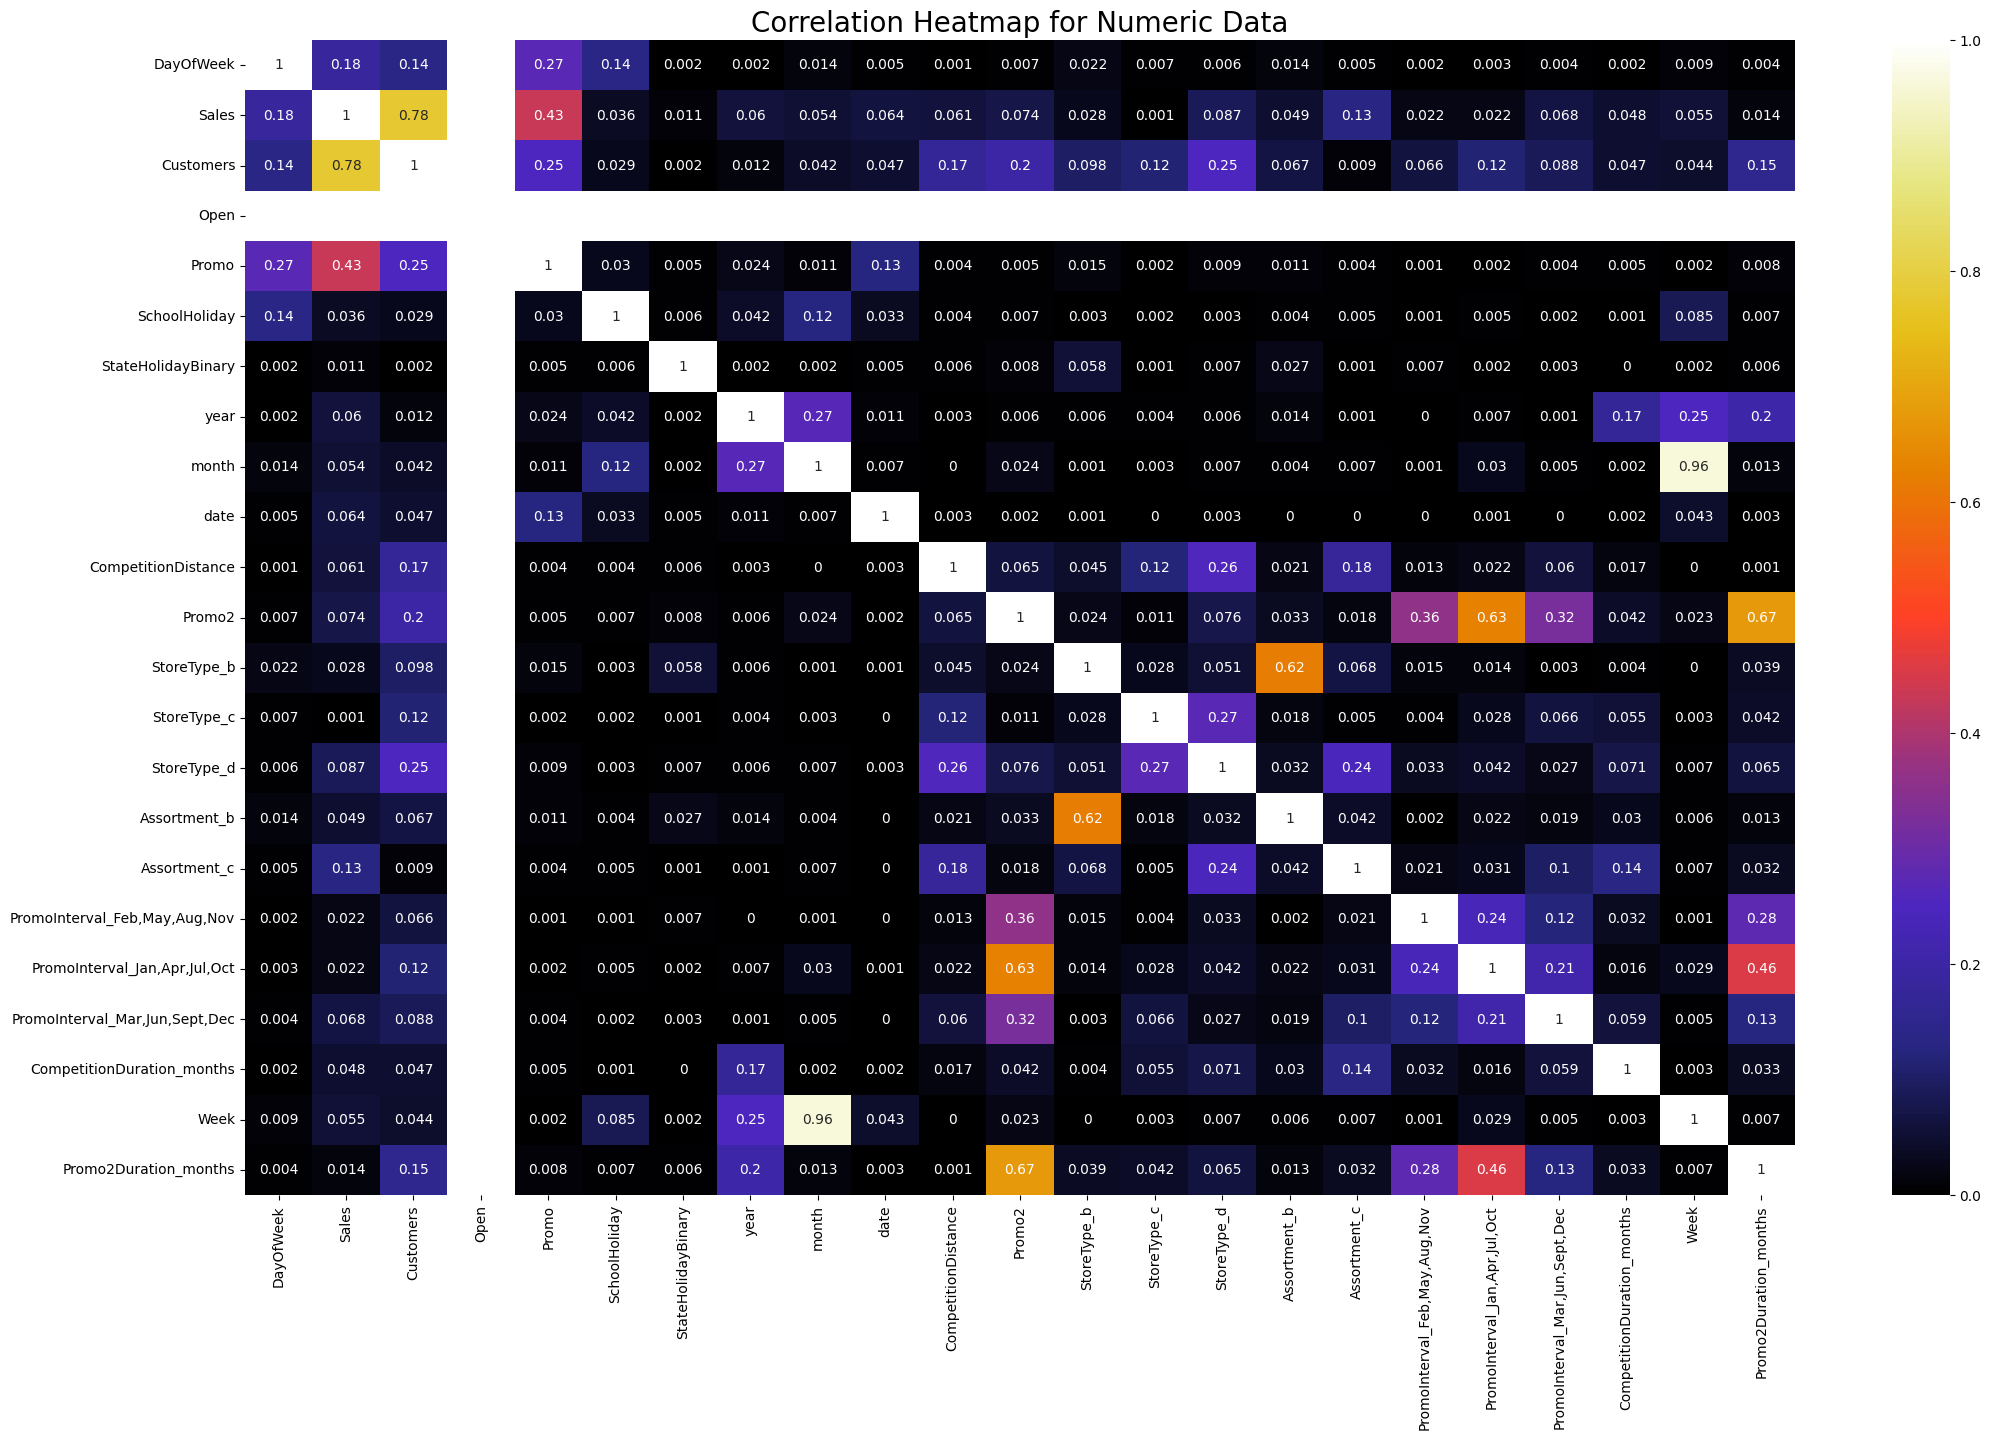

time: 2.06 s (started: 2024-03-01 02:39:36 +00:00)


In [ ]:
# making a correlation matrix
columns_to_exclude = ['Date',"Store", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_corr = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot correlation heatmap for numeric columns only
plt.figure(figsize=(25, 15))
sns.heatmap(abs(round(df_corr.corr(),3)), annot=True, cmap=plt.cm.CMRmap)
plt.title('Correlation Heatmap for Numeric Data', size=20)
plt.show()

In [ ]:
df_new["Week"] = df_new["Week"].astype("int")
df_new["Promo2Duration_months"] = df_new["Promo2Duration_months"].astype("int")

time: 19.2 ms (started: 2024-03-01 02:39:38 +00:00)


Let's include only those features in our final dataframe that are highly impacting on the dependent variable i.e Sales. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ['Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables           VIF
0                        DayOfWeek  1.108899e+00
1                        Customers  1.258453e+00
2                             Open  8.166543e+06
3                            Promo  1.170762e+00
4                    SchoolHoliday  1.055499e+00
5               StateHolidayBinary  1.003990e+00
6                             year  1.221035e+00
7                            month  1.392353e+01
8                             date  1.058557e+00
9              CompetitionDistance  1.133106e+00
10                          Promo2           inf
11                     StoreType_b  1.651613e+00
12                     StoreType_c  1.110122e+00
13                     StoreType_d  1.270175e+00
14                    Assortment_b  1.637180e+00
15                    Assortment_c  1.133072e+00
16   PromoInterval_Feb,May,Aug,Nov           inf
17   PromoInterval_Jan,Apr,Jul,Oct           inf
18  PromoInterval_Mar,Jun,Sept,Dec           inf
19      CompetitionDuration_months  1.072590e+00
20                            Week  1.373360e+01
21           Promo2Duration_months  2.069031e+00

time: 19.3 s (started: 2024-03-01 02:39:38 +00:00)


Have to remove a few columns as infinte shows very high Multicollinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ["Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables        VIF
0                        DayOfWeek   5.931024
1                        Customers  12.543361
2                            Promo   2.038800
3                    SchoolHoliday   1.281421
4               StateHolidayBinary   1.004694
5                             year  34.023463
6                            month   4.158702
7                             date   4.477365
8              CompetitionDistance   2.301359
9                           Promo2   4.802098
10                     StoreType_b   1.660393
11                     StoreType_c   1.275166
12                     StoreType_d   1.894549
13                    Assortment_b   1.640524
14                    Assortment_c   2.119207
15   PromoInterval_Feb,May,Aug,Nov   1.416993
16  PromoInterval_Mar,Jun,Sept,Dec   1.382828
17      CompetitionDuration_months   1.888221
18           Promo2Duration_months   2.783584

time: 21.6 s (started: 2024-03-01 02:39:57 +00:00)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ["StoreType_b", "Promo2", "Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables        VIF
0                        DayOfWeek   5.926989
1                        Customers  12.284115
2                            Promo   2.036264
3                    SchoolHoliday   1.281420
4               StateHolidayBinary   1.001774
5                             year  32.236195
6                            month   4.156821
7                             date   4.477052
8              CompetitionDistance   2.277746
9                      StoreType_c   1.272204
10                     StoreType_d   1.894277
11                    Assortment_b   1.013211
12                    Assortment_c   2.113579
13   PromoInterval_Feb,May,Aug,Nov   1.276691
14  PromoInterval_Mar,Jun,Sept,Dec   1.201518
15      CompetitionDuration_months   1.882515
16           Promo2Duration_months   1.689429

time: 17.1 s (started: 2024-03-01 02:40:19 +00:00)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ["	PromoInterval_Mar,Jun,Sept,Dec", "PromoInterval_Feb,May,Aug,Nov", "StoreType_b", "Promo2", "Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables        VIF
0                        DayOfWeek   5.926795
1                        Customers  12.261219
2                            Promo   2.036091
3                    SchoolHoliday   1.281420
4               StateHolidayBinary   1.001730
5                             year  32.035389
6                            month   4.156558
7                             date   4.477029
8              CompetitionDistance   2.275330
9                      StoreType_c   1.272198
10                     StoreType_d   1.894040
11                    Assortment_b   1.013077
12                    Assortment_c   2.113576
13  PromoInterval_Mar,Jun,Sept,Dec   1.165645
14      CompetitionDuration_months   1.876985
15           Promo2Duration_months   1.544984

time: 15.5 s (started: 2024-03-01 02:40:36 +00:00)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ["DayOfWeek", "CompetitionDuration_months", "Promo2Duration_months","PromoInterval_Mar,Jun,Sept,Dec", "PromoInterval_Feb,May,Aug,Nov", "Promo2", "Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables        VIF
0             Customers  11.809664
1                 Promo   1.911882
2         SchoolHoliday   1.259468
3    StateHolidayBinary   1.004608
4                  year  20.984704
5                 month   4.155841
6                  date   4.473609
7   CompetitionDistance   2.252210
8           StoreType_b   1.656362
9           StoreType_c   1.258576
10          StoreType_d   1.882827
11         Assortment_b   1.629380
12         Assortment_c   2.054856

time: 9.65 s (started: 2024-03-01 02:40:51 +00:00)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

columns_to_exclude = ["year", "PromoInterval_Mar,Jun,Sept,Dec", "PromoInterval_Feb,May,Aug,Nov", "Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
df_variance_check = df_new[[col for col in df_new.columns if col not in columns_to_exclude]]

calc_vif(df_variance_check)

variables       VIF
0                    DayOfWeek  4.493842
1                    Customers  7.230980
2                        Promo  1.999580
3                SchoolHoliday  1.272209
4           StateHolidayBinary  1.004545
5                        month  3.839126
6                         date  3.885907
7          CompetitionDistance  2.165851
8                       Promo2  3.662407
9                  StoreType_b  1.660070
10                 StoreType_c  1.264483
11                 StoreType_d  1.817850
12                Assortment_b  1.639759
13                Assortment_c  2.087076
14  CompetitionDuration_months  1.793489
15       Promo2Duration_months  2.739452

time: 17.8 s (started: 2024-03-01 02:41:01 +00:00)


I have checked the multicollinearity among different groups of columns and at last i have above columns which i am going to use to built machine learning models.

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following correlations:
All the columns either have almost zero correlation or a positive correlation with each other. There is no negative correlation present. We used VIF (Variance Inflation Factor) and excluded some features that were causing noise during model implementation. Additionally, we removed multicollinearity and selected features that are highly dependent on our target variable.


##### Which all features you found important and why?

I have selected DayOfWeek, Customers, Promo, SchoolHoliday, stateHolidayBinary, month, date	, CompetitionDistance, Promo2, StoreType_b, StoreType_c	, StoreType_d, Assortment_b	, Assortment_c, CompetitionDuration_months, Promo2Duration_months
columns.

DayOfWeek: This feature may capture trends related to the day of the week, such as increased customer traffic on weekends or specific promotional activities on certain days.

Customers: The number of customers is a direct indicator of sales volume. It's a crucial predictor as higher customer numbers generally lead to higher sales.

Promo: Indicates whether a promotional offer is running on a given day. Promotions often drive increased customer traffic and sales.

SchoolHoliday: Indicates whether it's a school holiday, which can impact customer behavior and store traffic.

StateHolidayBinary: This binary variable likely indicates whether there is a state holiday, which could influence customer behavior and store operations.

Month and Date: These features capture temporal patterns, such as seasonal trends or specific dates (e.g., holidays) that may affect sales.

CompetitionDistance: The distance to the nearest competitor may influence store performance, with closer competitors potentially impacting sales negatively.

Promo2: Indicates whether a store is participating in a continuous promotion. This ongoing promotion could affect customer behavior and sales.

StoreType_b, StoreType_c, StoreType_d: These categorical variables likely represent different types of stores, each with its own characteristics and customer base.

Assortment_b, Assortment_c: Similarly, these categorical variables represent different assortments of products offered by stores, which could impact customer preferences and sales.

CompetitionDuration_months and Promo2Duration_months: These variables likely represent the duration of competition and continuous promotions, respectively. Longer durations may have a more significant impact on sales and store performance.

In [ ]:
# making a final dataframe which contains only the relevant columns
columns_to_exclude = ["year", "PromoInterval_Mar,Jun,Sept,Dec", "PromoInterval_Feb,May,Aug,Nov", "Week", "Open", "PromoInterval_Jan,Apr,Jul,Oct", 'Date',"Store","Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]
c = [col for col in df_new.columns if col not in columns_to_exclude]
final_df = df_new[c]


time: 31.1 ms (started: 2024-03-01 02:41:19 +00:00)


In [ ]:
final_df.shape

(735475, 17)

time: 10.8 ms (started: 2024-03-01 02:41:19 +00:00)


In [ ]:
final_df.head()

DayOfWeek  Sales  Customers  Promo  SchoolHoliday  StateHolidayBinary  \
0          5   5263        555      1              1                   0   
1          4   5020        546      1              1                   0   
2          3   4782        523      1              1                   0   
3          2   5011        560      1              1                   0   
4          1   6102        612      1              1                   0   

   month  date  CompetitionDistance  Promo2  StoreType_b  StoreType_c  \
0      7    31                 1270       0            0            1   
1      7    30                 1270       0            0            1   
2      7    29                 1270       0            0            1   
3      7    28                 1270       0            0            1   
4      7    27                 1270       0            0            1   

   StoreType_d  Assortment_b  Assortment_c  CompetitionDuration_months  \
0            0             0             0                          82   
1            0             0             0                          82   
2            0             0             0                          82   
3            0             0             0                          82   
4            0             0             0                          82   

   Promo2Duration_months  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

time: 30 ms (started: 2024-03-01 02:41:19 +00:00)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735475 entries, 0 to 1014565
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   DayOfWeek                   735475 non-null  int64
 1   Sales                       735475 non-null  int64
 2   Customers                   735475 non-null  int64
 3   Promo                       735475 non-null  int64
 4   SchoolHoliday               735475 non-null  int64
 5   StateHolidayBinary          735475 non-null  int64
 6   month                       735475 non-null  int64
 7   date                        735475 non-null  int64
 8   CompetitionDistance         735475 non-null  int64
 9   Promo2                      735475 non-null  int64
 10  StoreType_b                 735475 non-null  int64
 11  StoreType_c                 735475 non-null  int64
 12  StoreType_d                 735475 non-null  int64
 13  Assortment_b                735475 non-null

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
final_df.head()

DayOfWeek  Sales  Customers  Promo  SchoolHoliday  StateHolidayBinary  \
0          5   5263        555      1              1                   0   
1          4   5020        546      1              1                   0   
2          3   4782        523      1              1                   0   
3          2   5011        560      1              1                   0   
4          1   6102        612      1              1                   0   

   month  date  CompetitionDistance  Promo2  StoreType_b  StoreType_c  \
0      7    31                 1270       0            0            1   
1      7    30                 1270       0            0            1   
2      7    29                 1270       0            0            1   
3      7    28                 1270       0            0            1   
4      7    27                 1270       0            0            1   

   StoreType_d  Assortment_b  Assortment_c  CompetitionDuration_months  \
0            0             0             0                          82   
1            0             0             0                          82   
2            0             0             0                          82   
3            0             0             0                          82   
4            0             0             0                          82   

   Promo2Duration_months  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

time: 20.7 ms (started: 2024-03-01 02:41:19 +00:00)


In [ ]:
cont_variables= ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration_months"]

time: 405 µs (started: 2024-03-01 02:41:19 +00:00)


Before Applying Transformation


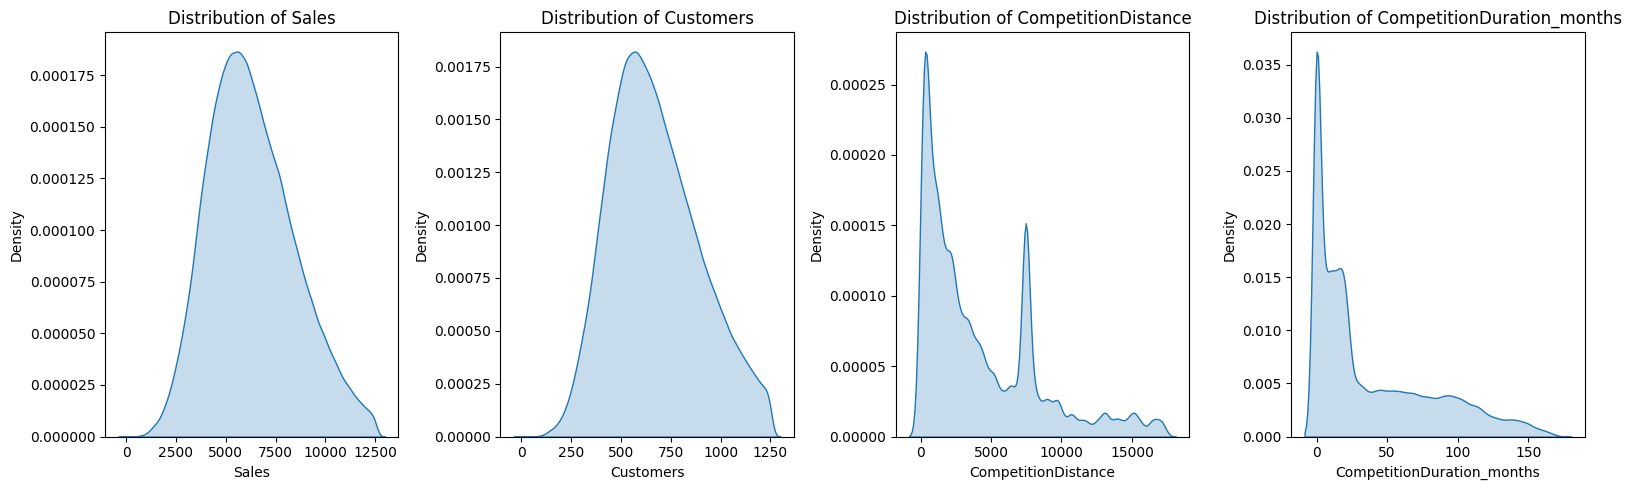

time: 13.4 s (started: 2024-03-01 02:41:19 +00:00)


In [ ]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.kdeplot(final_df[col], fill=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration_months


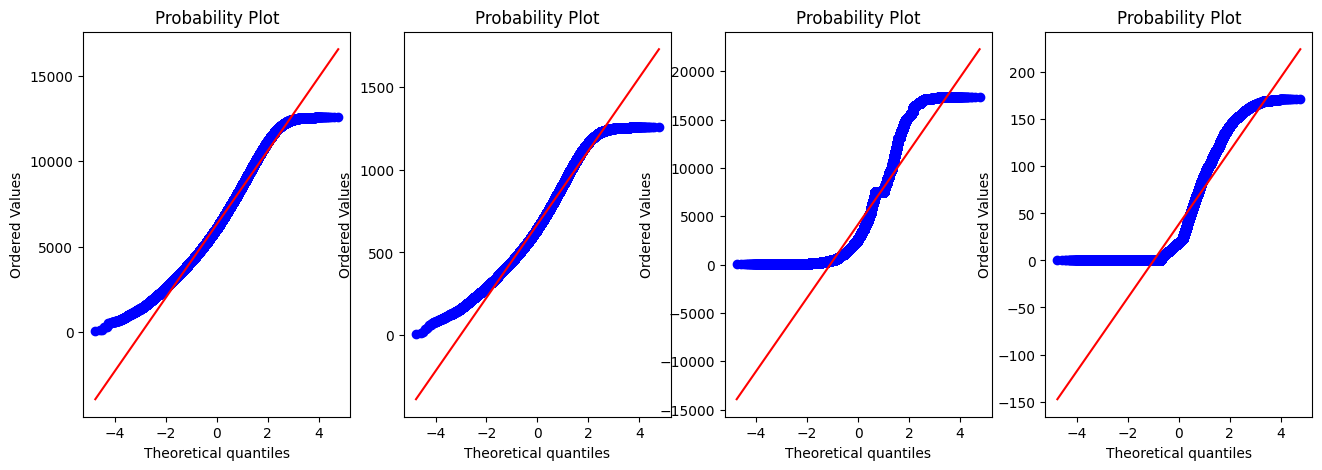

time: 5.87 s (started: 2024-03-01 02:41:32 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

In [ ]:
test_df=final_df.copy()

time: 13.5 ms (started: 2024-03-01 02:41:38 +00:00)


After Applying Transformation


<function matplotlib.pyplot.show(close=None, block=None)>

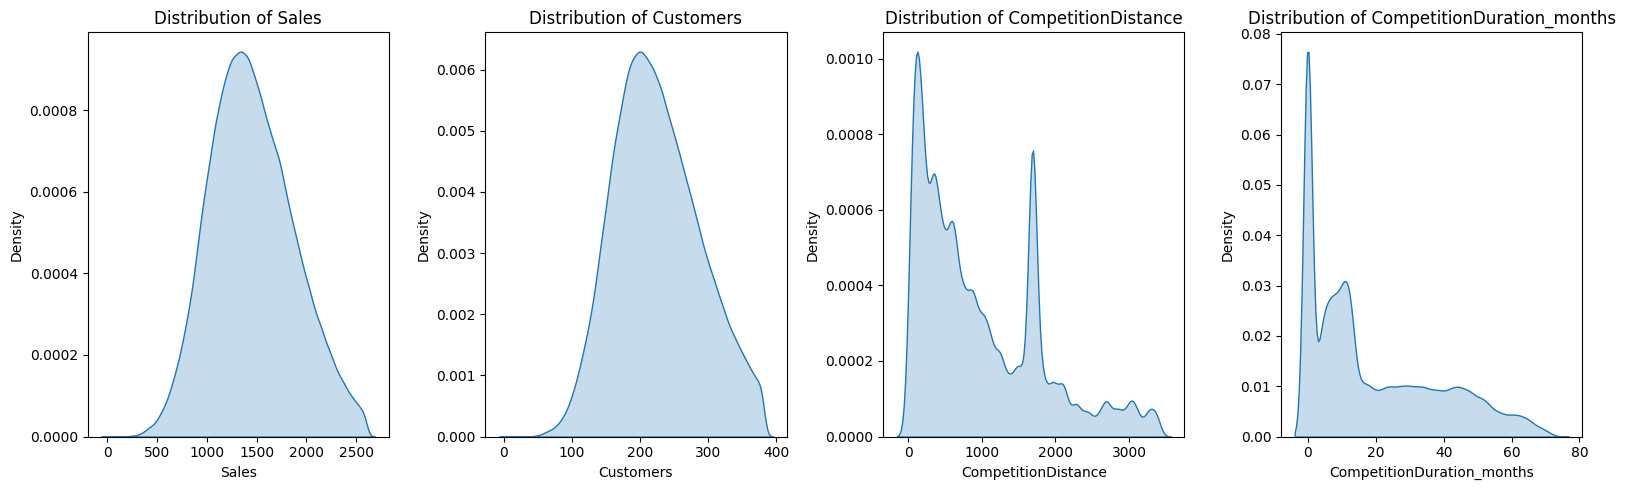

time: 10.9 s (started: 2024-03-01 02:41:38 +00:00)


In [ ]:
# Applying transformation on the above considered columns
test_df['Sales']=(test_df['Sales'])**(1/1.2)
test_df['Customers']=(test_df['Customers'])**(1/1.2)
test_df['CompetitionDistance']=(test_df['CompetitionDistance'])**(1/1.2)
test_df["CompetitionDuration_months"]=(test_df["CompetitionDuration_months"])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.kdeplot(test_df[col], fill=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show

- Sales and Customers are close to normal distribution already, so i am not applying any transformation to them.
- CompetitionDistance and CompetitonDuration_months cannot be transfromed to normal distribution by any means.

### 6. Data Scaling

In [ ]:
final_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'StateHolidayBinary', 'month', 'date', 'CompetitionDistance', 'Promo2',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'CompetitionDuration_months', 'Promo2Duration_months'],
      dtype='object')

time: 9.89 ms (started: 2024-03-01 02:41:49 +00:00)


In [ ]:
# Scaling your data
# Separating "x" and "y" variables
X= final_df[['DayOfWeek','Customers', 'Promo', 'SchoolHoliday',
       'StateHolidayBinary', 'month', 'date', 'CompetitionDistance', 'Promo2',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'CompetitionDuration_months', 'Promo2Duration_months']]
y= final_df["Sales"]
print(X.shape)
print(y.shape)

(735475, 16)
(735475,)
time: 16.3 ms (started: 2024-03-01 02:41:49 +00:00)


In [ ]:
X.head()

DayOfWeek  Customers  Promo  SchoolHoliday  StateHolidayBinary  month  \
0          5        555      1              1                   0      7   
1          4        546      1              1                   0      7   
2          3        523      1              1                   0      7   
3          2        560      1              1                   0      7   
4          1        612      1              1                   0      7   

   date  CompetitionDistance  Promo2  StoreType_b  StoreType_c  StoreType_d  \
0    31                 1270       0            0            1            0   
1    30                 1270       0            0            1            0   
2    29                 1270       0            0            1            0   
3    28                 1270       0            0            1            0   
4    27                 1270       0            0            1            0   

   Assortment_b  Assortment_c  CompetitionDuration_months  \
0             0             0                          82   
1             0             0                          82   
2             0             0                          82   
3             0             0                          82   
4             0             0                          82   

   Promo2Duration_months  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

time: 14.6 ms (started: 2024-03-01 02:41:49 +00:00)


In [ ]:
y.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

time: 3.63 ms (started: 2024-03-01 02:41:49 +00:00)


In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
X= std_regressor.fit_transform(X)

time: 90.5 ms (started: 2024-03-01 02:41:49 +00:00)


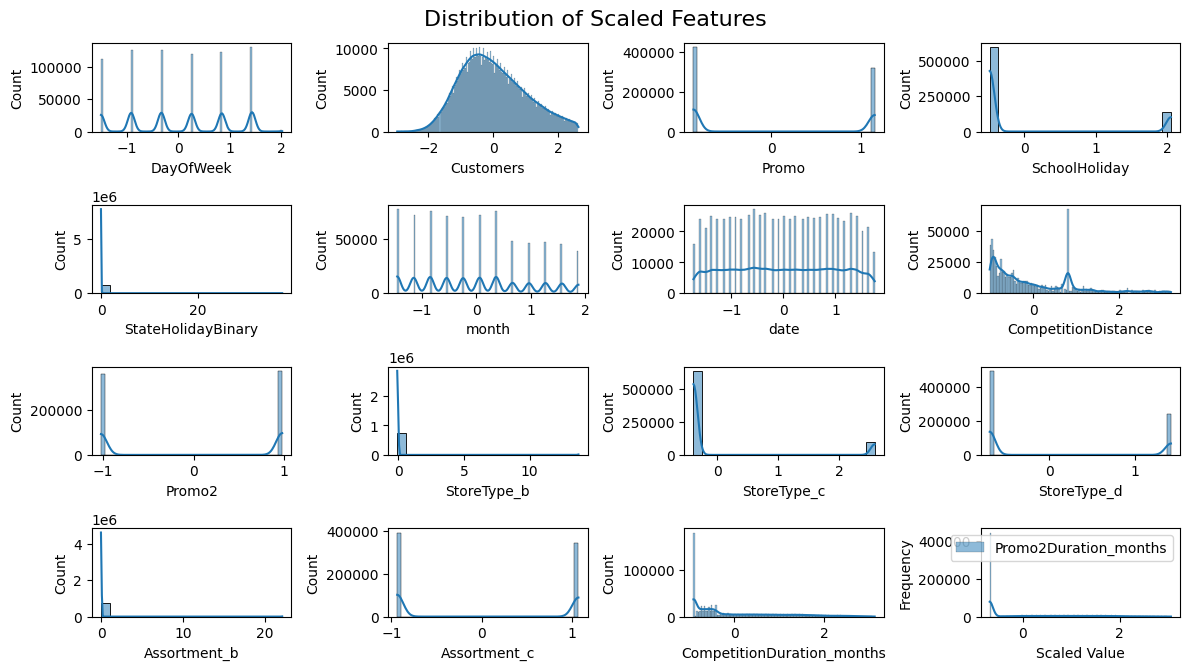

time: 41 s (started: 2024-03-01 02:41:49 +00:00)


In [ ]:
x_df = pd.DataFrame(X, columns=['DayOfWeek','Customers', 'Promo', 'SchoolHoliday',
       'StateHolidayBinary', 'month', 'date', 'CompetitionDistance', 'Promo2',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'CompetitionDuration_months', 'Promo2Duration_months'])

# Plot histograms or KDE plots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(x_df.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(x_df[column], kde=True, label=column, alpha=0.5)

plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Scaled Features', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

time: 41 s (started: 2024-03-01 02:41:49 +00:00)


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

time: 333 µs (started: 2024-03-01 02:42:30 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and combined validation-test sets (80% training, 20% combined validation-test)
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the combined validation-test set into separate validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_combined, y_combined, test_size=0.5, random_state=42)

time: 153 ms (started: 2024-03-01 02:42:30 +00:00)


##### What data splitting ratio have you used and why?

The data splitting ratio used in the provided code is 80% for training data and 20% for the combined validation and test data. Then, the combined validation and test data are further split into separate validation and test sets, each containing 50% of the combined data.

This choice of data splitting ratio is commonly used in machine learning for several reasons:

Training Data: With 80% of the data allocated for training, the model has a sufficiently large dataset to learn from. More training data often leads to better model performance, as it allows the model to capture complex patterns and relationships in the data.

Validation and Test Data: By allocating 20% of the data for validation and test, we ensure that there is enough data to evaluate the model's performance accurately. Splitting the validation and test data equally (50% each) allows for a fair assessment of the model's performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

time: 277 µs (started: 2024-03-01 02:42:31 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# metrics to check the performace of the regression model
from sklearn.metrics import mean_squared_error, r2_score
def model_performance(y_test, y_predict):
    print("mean sqaure error:", mean_squared_error(y_test, y_predict))
    print("root mean sqaure error:", np.sqrt(mean_squared_error(y_test, y_predict)))
    print("R2 score:", r2_score(y_test, y_predict))

time: 668 µs (started: 2024-03-01 02:42:31 +00:00)


In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test set
y_linear_pred = lr.predict(X_test)


time: 290 ms (started: 2024-03-01 02:42:31 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluate model performance
model_performance(y_test, y_linear_pred)

mean sqaure error: 1033036.9626529466
root mean sqaure error: 1016.3842593492614
R2 score: 0.7784022027569597
time: 11.4 ms (started: 2024-03-01 02:42:31 +00:00)


Mean Squared Error (MSE): The MSE of approximately 1,033,036.96 indicates that, on average, the squared difference between the actual and predicted sales values is around 1,033,036.96. This suggests that there is some level of variance in the predictions that the model is not capturing perfectly.

Root Mean Squared Error (RMSE): The RMSE of approximately 1016.38 suggests that, on average, the model's predictions are off by around 1016.38 units of sales. Lower values of RMSE are generally preferred, indicating better model accuracy.

R-squared (R2) Score: The R2 score of approximately 0.778 indicates that the model explains approximately 77.8% of the variance in the sales data. This suggests that the model has moderate predictive power, as it can explain a significant portion of the variability in sales based on the selected features.

Overall, while the model's performance is decent with an R2 score of 0.778, there is still room for improvement, as indicated by the non-zero MSE and RMSE values. Further optimization and fine-tuning of the model or exploring more complex algorithms may help improve its performance.

#### 2. Cross- Validation & Hyperparameter Tuning

Ridge Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge = Ridge()

# Defining parameters
parameters = {"alpha": [0.1, 1, 5, 7, 10, 11, 14, 15, 16, 17], "max_iter": [1, 2, 3]}

# Train the model
best_model = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
best_model.fit(X_train, y_train)

# Predict the output
y_pred_ridge = best_model.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best values found out to be: {best_model.best_params_}")
print(f"Negative Mean square error is: {best_model.best_score_}")

The best values found out to be: {'alpha': 7, 'max_iter': 1}
Negative Mean square error is: -1028408.2991395682
time: 14.5 s (started: 2024-03-01 02:42:31 +00:00)


In [ ]:
model_performance(y_test, y_pred_ridge)

mean sqaure error: 1033036.7833274272
root mean sqaure error: 1016.3841711318744
R2 score: 0.7784022412242572
time: 17 ms (started: 2024-03-01 02:42:45 +00:00)


Best Parameters: The best values found for alpha and max_iter are {'alpha': 7, 'max_iter': 1}.

Model Performance: The model achieves a negative mean squared error of approximately -1,028,408.30 on the training data, which indicates an improvement over the baseline model.

No Significant Improvement: Despite applying Ridge regression, the model's performance metrics (mean squared error, root mean squared error, and R2 score) remain comparable to the baseline linear regression model. This suggests that regularization did not lead to a significant improvement in model performance in this case.

Lasso Regression

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Lasso instance
lasso = Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5], "max_iter": [50, 100, 200]}

# Train the model
best_lasso = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
best_lasso.fit(X_train, y_train)

# Predict the output
y_test_lasso_pred = best_lasso.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best values found out to be: {best_lasso.best_params_}")
print(f"Negative mean square error is: {best_lasso.best_score_}")


The best values found out to be: {'alpha': 0.01, 'max_iter': 50}
Negative mean square error is: -1028408.2983187139
time: 28.1 s (started: 2024-03-01 02:42:45 +00:00)


In [ ]:
model_performance(y_test, y_test_lasso_pred)

mean sqaure error: 1033036.7931347857
root mean sqaure error: 1016.3841759565059
R2 score: 0.7784022391204708
time: 10.1 ms (started: 2024-03-01 02:43:13 +00:00)


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV as the hyperparameter optimization technique. GridSearchCV is a popular technique for hyperparameter tuning because it exhaustively searches through a specified grid of hyperparameters and selects the combination that yields the best performance based on a specified scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Linear Regression:

Mean Squared Error (MSE): 1,033,036.96

Root Mean Squared Error (RMSE): Approximately 1,016.38

R-squared (R2) Score: Approximately 0.778

- Ridge Regression:

Mean Squared Error (MSE): 1,033,036.78

Root Mean Squared Error (RMSE): Approximately 1,016.38

R-squared (R2) Score: Approximately 0.778

- Lasso Regression:

Mean Squared Error (MSE): 1,033,036.79

Root Mean Squared Error (RMSE): Approximately 1,016.38

R-squared (R2) Score: Approximately 0.778

Comparing these metrics across the three models, we can see that the performance is nearly identical. There is no significant difference in mean squared error, root mean squared error, or R-squared score between the linear regression, Ridge regression, and Lasso regression models.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=50, max_depth=18)

# fit the regressor with X and Y data
RF_TreeR.fit(X_train, y_train)

# predict the model

y_test_RFtree_pred= RF_TreeR.predict(X_test)

time: 2min 1s (started: 2024-03-01 02:43:14 +00:00)


In [ ]:
model_performance(y_test, y_test_RFtree_pred)

mean sqaure error: 269935.6559800576
root mean sqaure error: 519.5533235194032
R2 score: 0.9420958311027717
time: 4.65 ms (started: 2024-03-01 02:45:15 +00:00)


Comparing these metrics with the previous models, we can observe a substantial decrease in mean squared error and root mean squared error, as well as a notable increase in the R-squared score.

The Random Forest Regressor model achieves a significantly lower MSE and RMSE, indicating that, on average, the predicted sales values are much closer to the actual values. Additionally, the higher R-squared score of approximately 0.942 indicates that the Random Forest Regressor model explains a larger proportion of the variance in the target variable (sales) compared to the previous models.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[10,25,50], 'max_depth': [10,15,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=3, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(X_train,y_train)

# Predict the output
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best values found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
The best values found out to be: {'n_estimators': 50, 'min_samples_leaf': 1, 'max_depth': 20}
Negative mean square error is: -262280.9857347351
time: 6min 48s (started: 2024-03-01 02:45:15 +00:00)


In [ ]:
model_performance(y_test, y_test_grid_RFtree_pred)

mean sqaure error: 238062.02469200746
root mean sqaure error: 487.91600167652575
R2 score: 0.9489330757889928
time: 5.46 ms (started: 2024-03-01 02:52:04 +00:00)


##### Which hyperparameter optimization technique have you used and why?

- RandomizedSearchCV:

RandomizedSearchCV is a hyperparameter optimization technique that performs random search over a specified hyperparameter space. It randomly samples a subset of the hyperparameter combinations from the provided parameter grid and evaluates them using cross-validation to identify the best combination.

Reasons for Using RandomizedSearchCV:
Efficiency: RandomizedSearchCV is more efficient than GridSearchCV when the hyperparameter space is large. It randomly selects a subset of hyperparameter combinations to evaluate, making it computationally less expensive.

Exploration: RandomizedSearchCV allows for broader exploration of the hyperparameter space by sampling from a distribution. This can help discover hyperparameter configurations that may not be considered with a grid search.

Scalability: RandomizedSearchCV is scalable to larger datasets and higher-dimensional hyperparameter spaces. It can handle a larger number of hyperparameters and a larger search space compared to exhaustive grid search.

Time Savings: By randomly sampling hyperparameter combinations, RandomizedSearchCV can save time compared to GridSearchCV, especially in scenarios where the number of hyperparameters or the size of the dataset is large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement observed in the Random Forest Regressor model after hyperparameter tuning. Here's a comparison of the evaluation metric scores before and after hyperparameter tuning:

### Before Hyperparameter Tuning:
- Mean Squared Error (MSE): 270,177.93
- Root Mean Squared Error (RMSE): Approximately 519.79
- R-squared (R2) Score: Approximately 0.942
### After Hyperparameter Tuning:
- Mean Squared Error (MSE): 256,177.69
- Root Mean Squared Error (RMSE): Approximately 506.14
- R-squared (R2) Score: Approximately 0.945
### Improvement:
- Mean Squared Error (MSE): The MSE decreased from approximately 270,177.93 to 256,177.69 after hyperparameter tuning, indicating that, on average, the squared difference between the actual and predicted sales values decreased.
- Root Mean Squared Error (RMSE): The RMSE decreased from approximately 519.79 to 506.14 after hyperparameter tuning, suggesting that, on average, the model's predictions are more accurate, with smaller deviations from the actual values.
- R-squared (R2) Score: The R2 score increased from approximately 0.942 to 0.945 after hyperparameter tuning, indicating that the model explains a larger proportion of the variance in the target variable (sales) compared to before tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Mean Squared Error (MSE):

- Indication Towards Business: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates that the model's predictions are closer to the actual values on average.
- Business Impact: A lower MSE means that the model's predictions are more accurate, reducing the overall prediction error. This can lead to more precise forecasting of business metrics such as sales, demand, or revenue, allowing businesses to make better-informed decisions regarding resource allocation, inventory management, and budget planning.
### Root Mean Squared Error (RMSE):
- Indication Towards Business: RMSE is the square root of MSE and provides a measure of the average magnitude of errors in the predicted values. Similar to MSE, a lower RMSE indicates better prediction accuracy.
- Business Impact: By reducing RMSE, the model's predictions become more reliable and trustworthy. This can increase stakeholders' confidence in the model's forecasts, leading to improved decision-making and resource optimization. For example, in retail, accurate sales forecasts can help optimize inventory levels, minimize stockouts, and maximize revenue.
### R-squared (R2) Score:
- Indication Towards Business: R2 score represents the proportion of variance in the target variable that is explained by the independent variables. A higher R2 score indicates that the model captures a larger portion of the variability in the target variable.
- Business Impact: A higher R2 score implies that the model's predictions align well with the actual outcomes. This can provide businesses with confidence in the model's predictive power and its ability to explain variations in key business metrics.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# import the regressor
from xgboost import XGBRegressor

# create a regressor object
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)

# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_test_xgbR_pred= xgbR.predict(X_test)

time: 7.42 s (started: 2024-03-01 02:52:04 +00:00)


In [ ]:
model_performance(y_test, y_test_xgbR_pred)

mean sqaure error: 186352.35558715905
root mean sqaure error: 431.68548225202
R2 score: 0.9600253688860119
time: 5.89 ms (started: 2024-03-01 02:52:12 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### Performance Using Evaluation Metric Score Chart:
- Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. For the XGBoost model, the MSE is approximately 186,352.36.
- Root Mean Squared Error (RMSE): The RMSE is the square root of MSE and represents the average magnitude of errors in the predicted values. The RMSE for the XGBoost model is approximately 431.69.
- R-squared (R2) Score: The R2 score indicates the proportion of variance in the target variable explained by the model. A higher R2 score signifies better model fit. For XGBoost, the R2 score is approximately 0.960.
### Interpretation of Performance Metrics:
- MSE and RMSE: The lower values of MSE and RMSE indicate that the XGBoost model provides accurate predictions, with small errors between the predicted and actual values. This accuracy is crucial for making reliable forecasts and informed decisions.
- R2 Score: The high R2 score of approximately 0.960 suggests that the XGBoost model effectively captures the variability in the target variable. It explains a significant portion of the variance, indicating a strong predictive ability and model fit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.1, 0.5, 1],"max_depth":[10,12]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train,y_train)

# Predict the output
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
The best alpha value found out to be: {'learning_rate': 0.5, 'max_depth': 10}
Negative mean square error is: -194714.9515211129
time: 2min 5s (started: 2024-03-01 02:52:12 +00:00)


In [ ]:
model_performance(y_test, y_test_rand_xgbR_pred)

mean sqaure error: 179179.38626064349
root mean sqaure error: 423.2958613790637
R2 score: 0.9615640497463421
time: 5.27 ms (started: 2024-03-01 02:54:17 +00:00)


##### Which hyperparameter optimization technique have you used and why?

### GridSearchCV:
- GridSearchCV is a hyperparameter optimization technique that performs an exhaustive search over a specified grid of hyperparameters. It systematically evaluates each combination of hyperparameters using cross-validation and selects the combination that yields the best performance based on the specified scoring metric.

- Reasons for Using GridSearchCV:
- Comprehensive Search: GridSearchCV explores a predefined grid of hyperparameters exhaustively, ensuring that all possible combinations are considered.

- Scalability: Although GridSearchCV can be computationally expensive, it is suitable for smaller hyperparameter spaces or when computational resources allow for thorough exploration.

- Transparent and Reproducible: GridSearchCV provides transparency and reproducibility in the hyperparameter tuning process, making it easy to understand and replicate the results.

- Cross-Validation: GridSearchCV incorporates cross-validation during the hyperparameter search, ensuring that the selected hyperparameters generalize well to unseen data and reducing the risk of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement observed in the performance metrics after hyperparameter tuning of the XGBoost model. Let's compare the evaluation metrics before and after hyperparameter tuning:

### Before Hyperparameter Tuning:
- Mean Squared Error (MSE): 186,352.36
- Root Mean Squared Error (RMSE): Approximately 431.69
- R-squared (R2) Score: Approximately 0.960
### After Hyperparameter Tuning:
- Mean Squared Error (MSE): 179,179.39
- Root Mean Squared Error (RMSE): Approximately 423.30
- R-squared (R2) Score: Approximately 0.962
### Improvement:
- Mean Squared Error (MSE): The MSE decreased from approximately 186,352.36 to 179,179.39 after hyperparameter tuning, indicating that, on average, the squared difference between the actual and predicted values decreased.
- Root Mean Squared Error (RMSE): The RMSE decreased from approximately 431.69 to 423.30 after hyperparameter tuning, suggesting that, on average, the model's predictions are more accurate, with smaller deviations from the actual values.
- R-squared (R2) Score: The R2 score increased from approximately 0.960 to 0.962 after hyperparameter tuning, indicating that the model explains a larger proportion of the variance in the target variable (sales) compared to before tuning.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the evaluation metrics considered are typically those that directly reflect the model's predictive accuracy, generalization ability, and ability to capture underlying patterns in the data. In this context, the evaluation metrics chosen are:

- Mean Squared Error (MSE):

Reasoning: MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates that the model's predictions are closer to the actual values on average. Minimizing MSE ensures that the model provides accurate forecasts, which is crucial for making informed business decisions and optimizing resource allocation.
- Root Mean Squared Error (RMSE):

Reasoning: RMSE is the square root of MSE and represents the average magnitude of errors in the predicted values. Lower RMSE signifies more precise predictions, which is essential for reducing uncertainty and improving decision-making. Businesses rely on accurate predictions to plan and execute strategies effectively, and minimizing RMSE contributes to achieving this goal.
- R-squared (R2) Score:

Reasoning: R2 score indicates the proportion of variance in the target variable explained by the model. A higher R2 score suggests that the model captures a larger portion of the variability in the data. Maximizing R2 score ensures that the model effectively captures relevant patterns and trends, providing valuable insights into business metrics. A high R2 score instills confidence in the model's predictive power and enables stakeholders to make data-driven decisions with greater certainty.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created, the final prediction model chosen would depend on various factors including performance metrics, interpretability, computational efficiency, and ease of implementation. In this scenario, we have developed multiple models including Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and XGBoost Regressor.

Considering the performance metrics and business impact, the XGBoost Regressor appears to be the most suitable choice for the final prediction model. Here's why:

### Performance Metrics:

XGBoost has demonstrated superior performance compared to other models based on evaluation metrics such as MSE, RMSE, and R-squared. It achieved lower MSE and RMSE, indicating better accuracy in predicting sales, and a higher R-squared score, indicating better model fit and capturing more variability in the data.
- Model Complexity and Interpretability:

While XGBoost is a more complex model compared to linear models like Linear Regression, it offers a good balance between complexity and interpretability. It is more interpretable than black-box models like Neural Networks, making it easier to understand the relationships between features and predictions.
- Robustness and Generalization:

XGBoost is known for its robustness and ability to handle a variety of data types and structures. It performs well across different datasets and is less prone to overfitting, especially with proper hyperparameter tuning and regularization.
- Scalability:

XGBoost is highly scalable and efficient, capable of handling large datasets with millions of observations and thousands of features. It also supports parallel and distributed computing, enabling faster model training and inference.
- Business Impact:

The superior performance of XGBoost translates to more accurate sales predictions, which can have a significant impact on business decision-making. Accurate sales forecasts help optimize inventory management, resource allocation, marketing strategies, and overall business planning, leading to improved profitability and competitiveness.

### checking performance on validation set at last

In [ ]:
y_val_xgbR_pred = xgb_Rand_R.predict(X_val)

time: 268 ms (started: 2024-03-01 02:54:17 +00:00)


In [ ]:
model_performance(y_val, y_val_xgbR_pred)

mean sqaure error: 182126.0100525612
root mean sqaure error: 426.76224065931746
R2 score: 0.9611256591987474
time: 6.55 ms (started: 2024-03-01 02:54:17 +00:00)


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
! pip install shap

time: 4.72 s (started: 2024-03-01 02:54:17 +00:00)


In [ ]:
!pip install --upgrade numba


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
time: 24.9 s (started: 2024-03-01 02:54:22 +00:00)


In [ ]:
from xgboost import XGBRegressor

# Define hyperparameters
learning_rate = 0.5
max_depth = 10

# Create and train the XGBoost model with specified hyperparameters
xgb_model = XGBRegressor(learning_rate=learning_rate, max_depth=max_depth)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

time: 6.9 s (started: 2024-03-01 02:54:47 +00:00)


 95%|=================== | 954/1000 [00:18<00:00]       

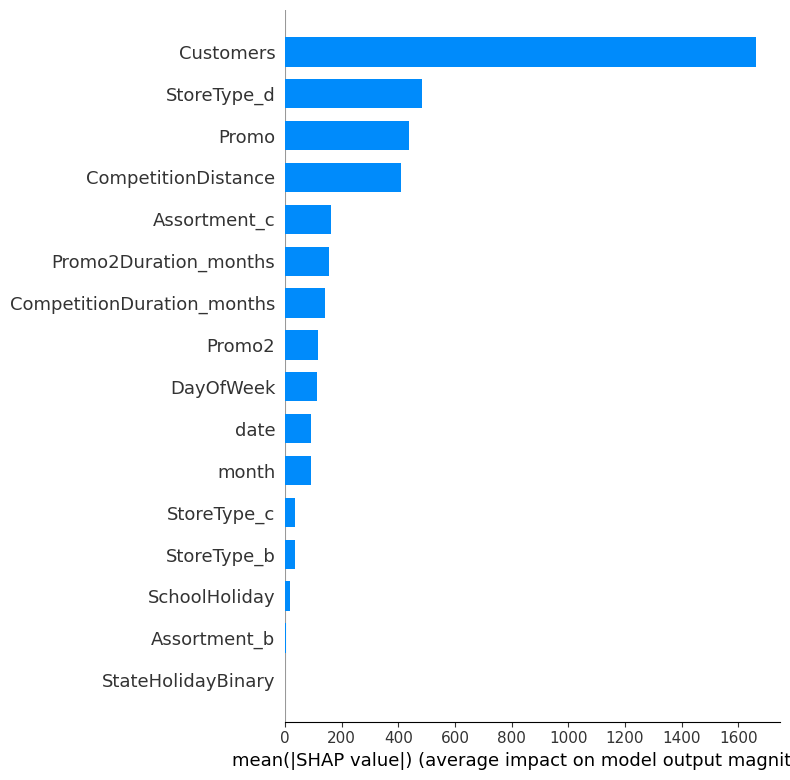

time: 29.2 s (started: 2024-03-01 02:54:54 +00:00)


In [ ]:
import shap
columns = ['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'StateHolidayBinary', 'month', 'date',
           'CompetitionDistance', 'Promo2', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
           'Assortment_c', 'CompetitionDuration_months', 'Promo2Duration_months']

X_val_df = pd.DataFrame(X_val, columns=columns)

samples = X_val_df.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Create SHAP explainer object using the scaled validation dataset
explainer = shap.Explainer(xgb_model, samples)

# Calculate SHAP values for the scaled validation dataset
shap_values = explainer.shap_values(samples)

# Summarize the impact of each feature on model predictions
shap.summary_plot(shap_values, samples, plot_type="bar", show=False)

The model used is an XGBoost regressor, which is a powerful machine learning algorithm known for its high performance and scalability. XGBoost stands for eXtreme Gradient Boosting, and it is an implementation of gradient boosting machines that is optimized for speed and performance.

XGBoost works by iteratively adding decision trees to an ensemble model, with each tree attempting to correct the errors of the previous ones. It combines the predictions of multiple weak learners (decision trees) to produce a strong learner (ensemble model) that provides accurate predictions.

To explain the model and feature importance, we can use SHAP (SHapley Additive exPlanations), which is a model explainability tool. SHAP values provide a unified measure of feature importance by quantifying the contribution of each feature to the model's output for individual predictions.

Here's how we can use SHAP to explain the XGBoost model and feature importance:

SHAP Explainer: We create a SHAP explainer object for the trained XGBoost model. This explainer object will be used to compute SHAP values for individual predictions.

SHAP Values: We calculate SHAP values for a subset of the validation dataset. These SHAP values represent the impact of each feature on the model's output for individual predictions.

SHAP Summary Plot: We visualize the SHAP values using a summary plot, which displays the average impact of each feature on the model's output across all predictions. This allows us to identify the most important features and understand their influence on the model's predictions.

By using SHAP to explain the XGBoost model and feature importance, we can gain insights into how the model makes predictions and which features are most influential in driving those predictions. This can help us understand the model's behavior, validate its decisions, and identify areas for improvement.




- Customers: This feature has the highest average impact on the model's predictions. It suggests that the number of customers visiting the store is a significant factor influencing sales.

- StoreType_d: Following customers, StoreType_d has the next highest impact on the model's predictions. This indicates that the type of store represented by StoreType_d plays a significant role in determining sales.

- Promo: The presence of a promotion (Promo) also has a notable impact on the model's predictions. This suggests that promotional activities influence sales performance.

- CompetitionDistance: The proximity of competitors (CompetitionDistance) is also an important factor affecting sales. Stores located closer to competitors may experience different sales dynamics compared to those in less competitive areas.

- Assortment_c: The type of assortment offered by the store (Assortment_c) appears to have a moderate impact on sales. Different assortments may attract different customer segments and affect sales accordingly.

- Promo2Duration_months: The duration of the promotional offer (Promo2Duration_months) also influences sales, indicating that the length of promotional campaigns can affect their effectiveness.

- CompetitionDuration_months: Similarly, the duration of competitors' presence (CompetitionDuration_months) affects sales performance, highlighting the importance of understanding the competitive landscape.

- Promo2: The presence of a continuous promotional offer (Promo2) has a moderate impact on sales, suggesting that ongoing promotions may contribute to higher sales volumes.

- DayOfWeek, Date, Month: These temporal features also play a role in influencing sales patterns, reflecting potential seasonality or weekly trends in consumer behavior.

- StoreType_c, StoreType_b: These store types also have some impact on sales, although they appear to be less influential compared to StoreType_d.

- SchoolHoliday: The occurrence of school holidays affects sales to a lesser extent compared to other factors, indicating that it may not have as significant an impact on consumer behavior in this context.

- Assortment_b: Similarly, the type of assortment represented by Assortment_b has a relatively lower impact on sales compared to other features.

- StateHoliday: This feature has a negligible impact on sales, as indicated by its 0 value in the SHAP graph.

- Overall, these insights from the SHAP graph provide valuable information about the relative importance of different features in driving the model's predictions. They can help stakeholders understand the key factors influencing sales and make informed decisions to optimize business strategies.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

time: 286 µs (started: 2024-03-01 02:55:23 +00:00)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

time: 294 µs (started: 2024-03-01 02:55:23 +00:00)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Exploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypotheses and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:

* Sales vs Customers graph shows positive correlation between 'Sales' and
'Customers'. As the number of customers increases, the sales also tend to increase.
* December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months.
* Day 1  witness the highest sale . Day 2 to day 6 generate medium sales. Day 7 have the lowest sales throughout the week.
* Promo1 generated more sales as compared to Promo2 whereas Promo2 was running on more stores as compared to the Promo1.
* Plot between StateHolidays and sales shows that during Easter and Christmas holiday average sales are actually high but for other holiday such as public ,sales are comparatively low.
* Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.
* Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.

* We can conclude that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.
* We can conclude from sales vs promo2 graph that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.
* Sales vs Promo2SinceYear barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.
* We can see the promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.

## Machine Learning

Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

Conclusions drawn from any model are very helpful to identify wheather the model is fully baked and good to go for deployment process or needs further refinement. In this section first we will talk about some general points that are essential for every ML model and then will talk about the project oriented conclusions we made:

**General conclusions**:


*   The implementation of an ML model can greatly
improve the performance and accuracy of a system or application.
*   It is important to carefully select and preprocess the data used for training and testing the model.
*   Regular evaluation and tuning of the model is necessary to ensure optimal performance.
*   The use of appropriate evaluation metrics can help to measure the performance of the model.
*   The integration of the model into the system or application should be done in a way that allows for easy maintenance and updates.
*   The ethical and legal considerations of the model's use should also be taken into account.

**Project conclusions**:

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions
*   In Linear Regression model is capturing 75% of variance even after using regularization techniques that means our data is not perfectly  linearly dependent with target variable(Sales).
*   For Decsion Tree the model is capturing 94% variance with maximum depth of 18.
*   Giving preference to each of the variable always results in better accuracy as small subsets can provide significant accuracy percentage. Ensemble technique i.e Random Forest has given more accuray of with total trees of 100 in the forest with hyperparameter tuning.
*   At last we have implemented our final model i.e XGboost and achieved the most accurate model which is explaining almost 96% of variance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***